# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [9]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial import distance

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [16]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
    # make a matrix with rows num = number of points
    # and cols num = number of centroids
    Cluster_Distance=np.zeros(shape=(Data_points.shape[0], Cluster_Centroids.shape[0]))
    for i in range(Data_points.shape[0]):
        Data_point=Data_points[i].reshape(1,Data_points[i].shape[0])
        if Distance_Type=="Ecluidian":         
            Cluster_Distance[i]=np.sqrt(np.sum(np.square(Cluster_Centroids-Data_point),axis=1))
        if Distance_Type == 'Pearson':
            Cluster_Distance[i]=np.sum(np.abs(Cluster_Centroids-Data_point),axis=1)
    return Cluster_Distance 


In [3]:
k=4
Centroids=np.array([[0,0,0],[1,1,1],[2,2,2],[3,3,3]])
points=np.zeros(shape=(15,3))+5
print(GUC_Distance(Centroids,points,"Ecluidian"))

[[8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]
 [8.66025404 6.92820323 5.19615242 3.46410162]]


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [3]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    # write code for intial cluster heads here
    # write your your loop
    Cluster_Centroids = Data_points[
        np.random.choice([i for i in range(Data_points.shape[0])], Number_of_Clusters, replace=False)]
    old_mean = 1
    new_mean = .1
    
    while new_mean / old_mean < 0.999 or new_mean / old_mean > 1:
        Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        clusters_min_num = np.argmin(Cluster_Distance, axis=1) # to return the index of the minimum value
        new_clusters = np.zeros((Number_of_Clusters, Data_points.shape[1])) # matrix for the new clusters
        npoints = np.zeros((Number_of_Clusters, 1))
        # The enumerate() function assigns an index to each item
        for index, p in enumerate(clusters_min_num):
            npoints[p] = npoints[p] + 1 # calculate number of points in each cluster
            new_clusters[p] = new_clusters[p] + Data_points[index] # sum all distances for each cluster
        # get the mean
        new_clusters = new_clusters / (npoints + pow(10, -11)) # get the new cluster centroids
        diff = 0
        for index, p in enumerate(clusters_min_num):
            diff = diff + np.sum(np.square(new_clusters[p] - Data_points[index])) # sum diff to find distortion function
        old_mean = new_mean # swap the means
        new_mean = np.sqrt(diff) / len(Data_points) # calculate the new mean
        Cluster_Centroids = new_clusters # assign the new cnetroids
        dist_func=diff/len(Data_points) # dist function
    output = {'cluster_centers_': Cluster_Centroids, 'labels_': clusters_min_num}
        

    return [Cluster_Centroids, output, dist_func]

In [5]:
k=4
Centroids=np.array([[0,0,0],[1,1,1],[2,2,2],[3,3,3]])
points=np.random.randn(10,3)
GUC_Kmean(points,k,"Ecluidian")

[array([[-0.77603217,  0.67051609,  1.10602228],
        [ 1.13966371,  0.88176385, -0.6102672 ],
        [ 0.81739051, -2.06969219, -0.65334202],
        [-0.50234821,  0.02320054, -0.43014318]]),
 {'cluster_centers_': array([[-0.77603217,  0.67051609,  1.10602228],
         [ 1.13966371,  0.88176385, -0.6102672 ],
         [ 0.81739051, -2.06969219, -0.65334202],
         [-0.50234821,  0.02320054, -0.43014318]]),
  'labels_': array([3, 0, 0, 1, 0, 1, 2, 3, 3, 2], dtype=int64)},
 13.01973495632134]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [6]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def My_display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmykbrgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km["labels_"]==i,0],X[km["labels_"]==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km["cluster_centers_"][i][0],km["cluster_centers_"][i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

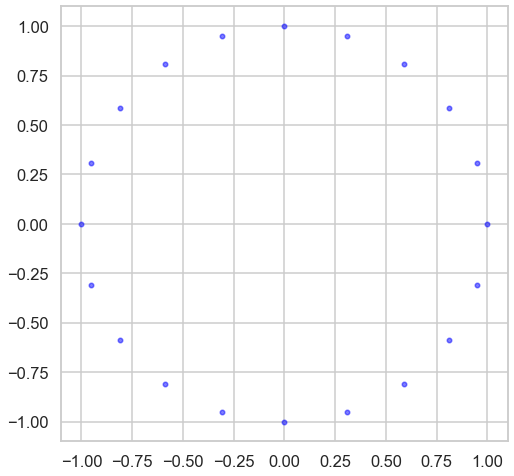

In [9]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
My_display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

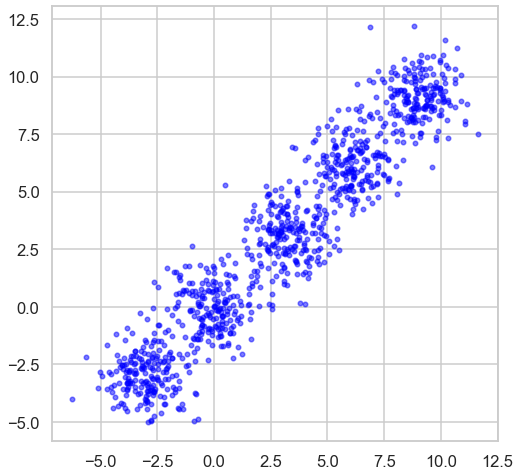

In [58]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

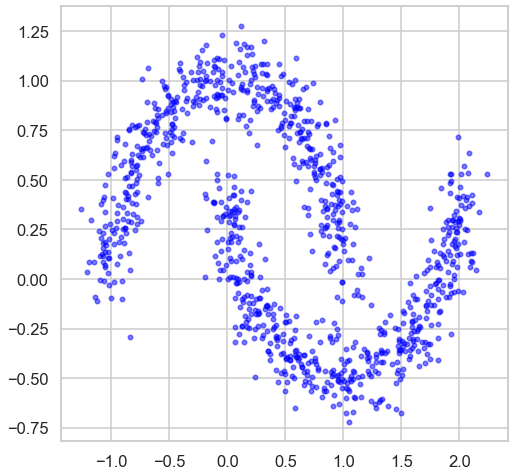

In [59]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [5]:
def Example1():
    # prepare the figure sise and background 
    # this part can be replaced by a number of subplots 
    plt.rcParams['figure.figsize'] = [8, 8]
    sns.set_style("whitegrid")
    sns.set_context("talk")
    # Produce a data set that represent the x and y o coordinates of a circle 
    # this part can be replaced by data that you import froma file 
    angle = np.linspace(0, 2 * np.pi, 20, endpoint=False)
    X = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
    return X

In [6]:
def Example2():
    n_samples = 1000
    n_bins = 4
    centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9, 9)]
    X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                      centers=centers, shuffle=False, random_state=42)
    return X

In [7]:
def Example3():
    n_samples = 1000
    X, y = noisy_moons = make_moons(n_samples=n_samples, noise=.1)
    return X

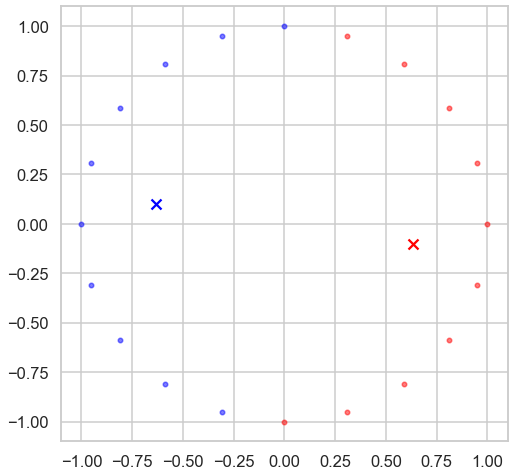

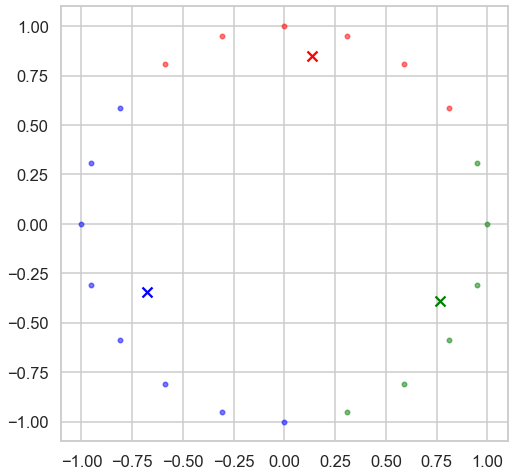

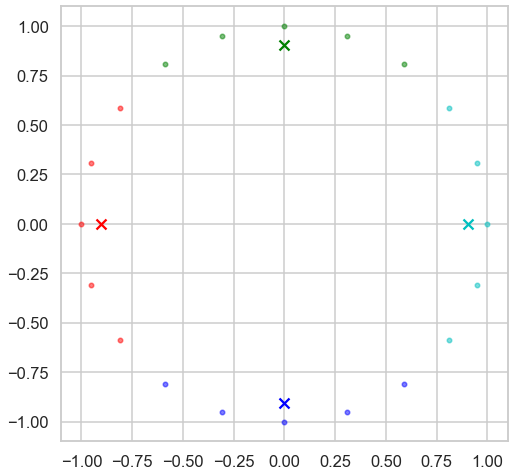

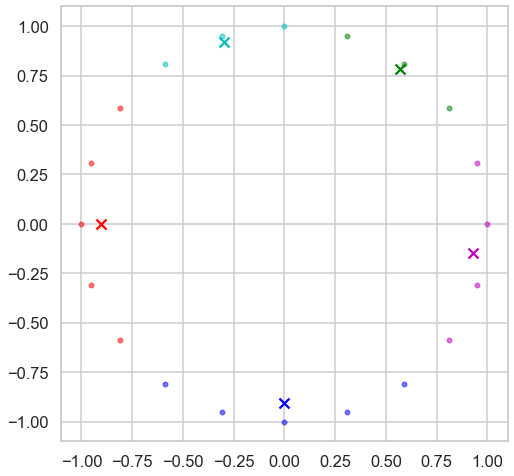

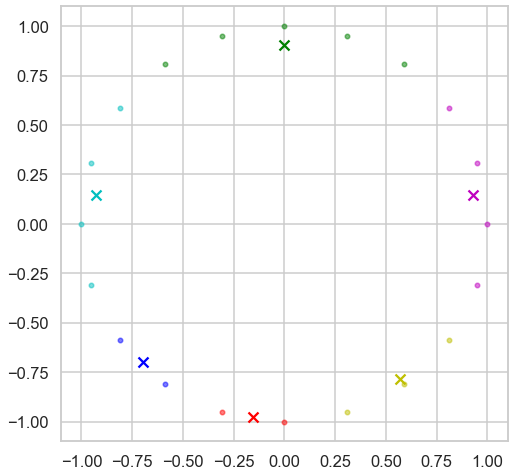

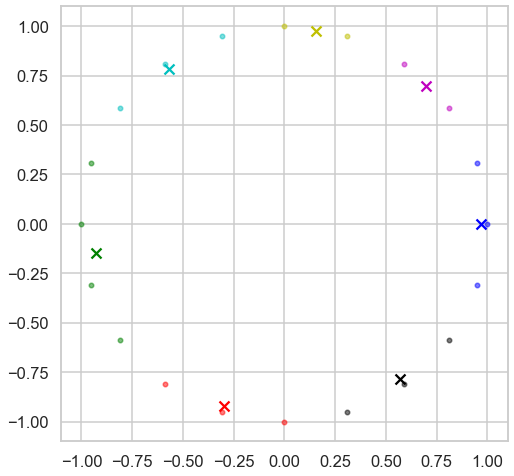

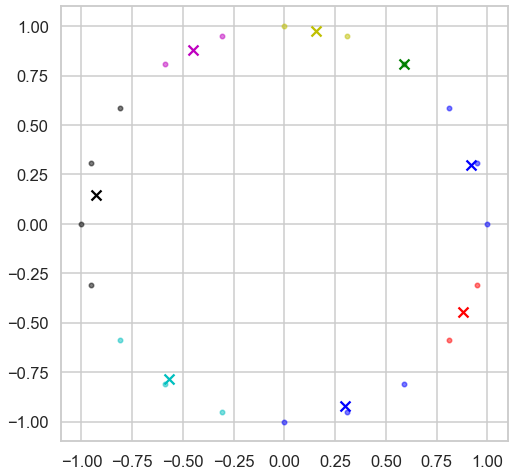

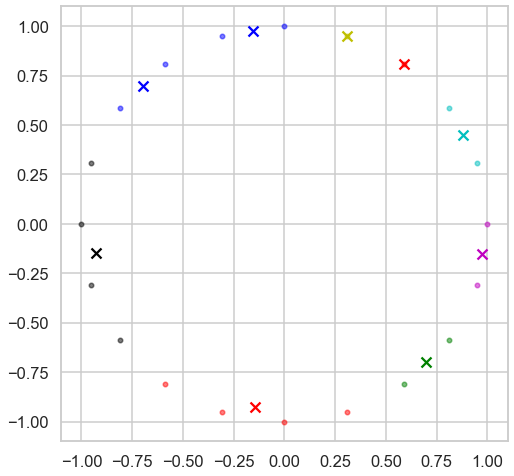

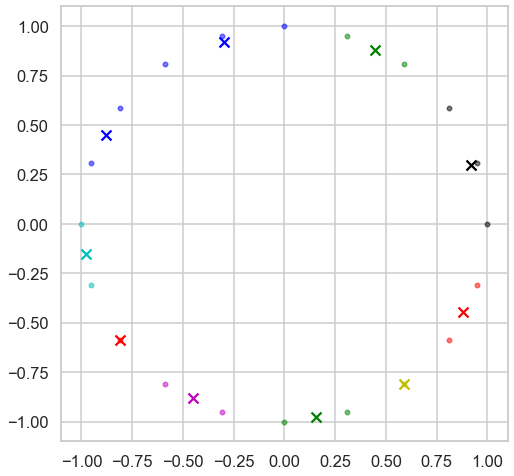

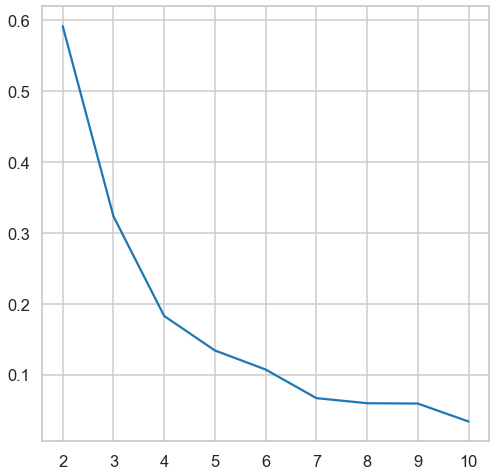

In [17]:
# Example 1
metric_list=[]
for num_clusters in range(2, 11):
    X=Example1()
    (Cluster_Centroids, output, dist_func) = GUC_Kmean(X, num_clusters, 'Pearson')
    metric_list.append(dist_func)
    plt.figure() 
    My_display_cluster(X, km=output, num_clusters=num_clusters)
plt.figure() 
plt.plot(range(2, 11),metric_list)

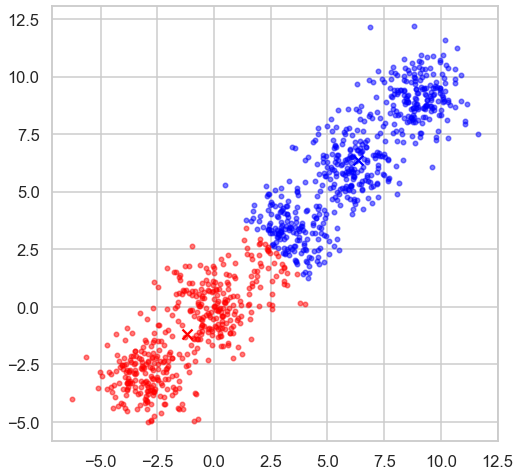

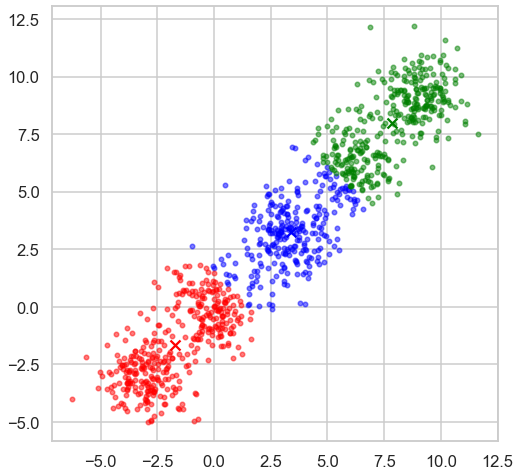

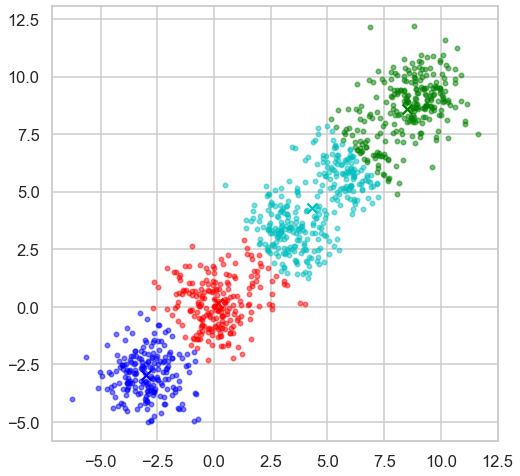

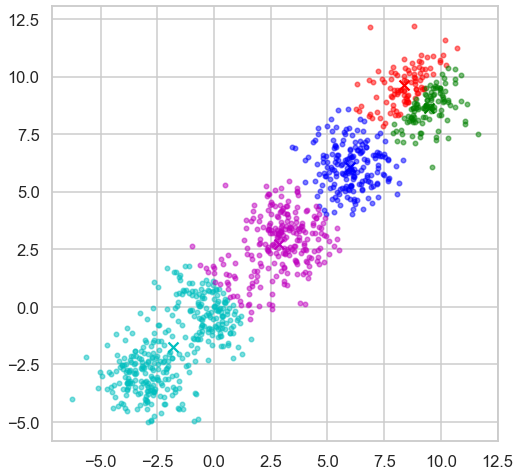

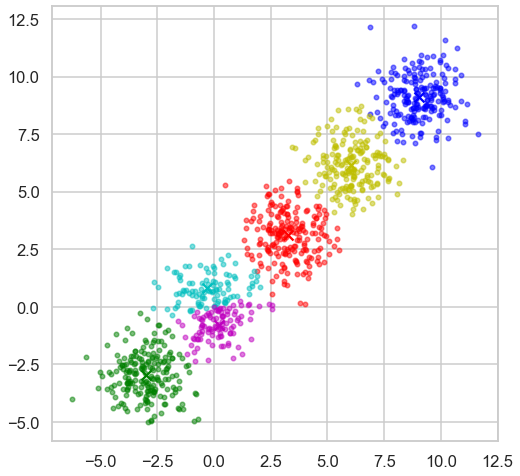

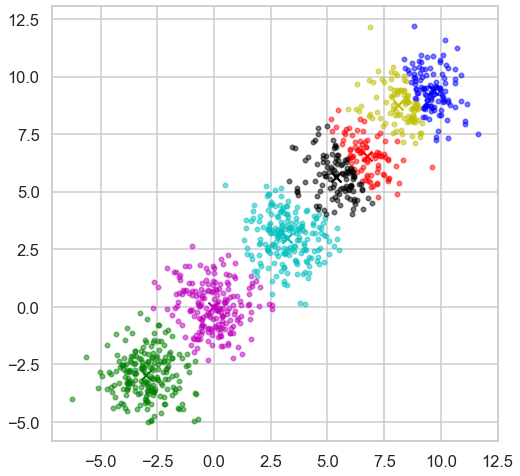

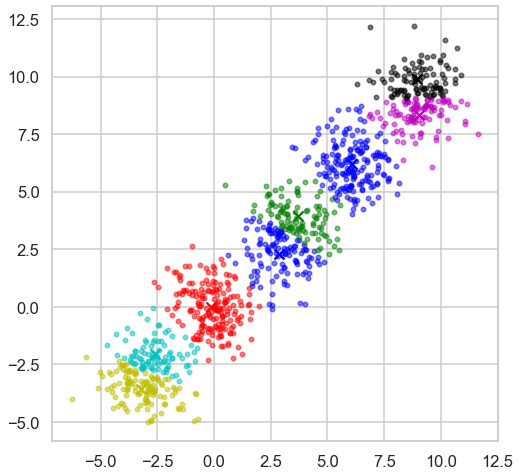

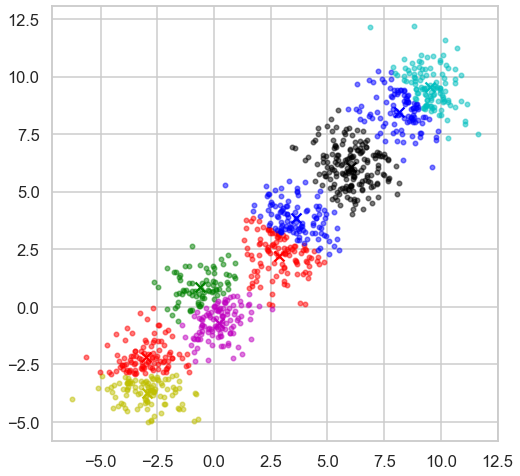

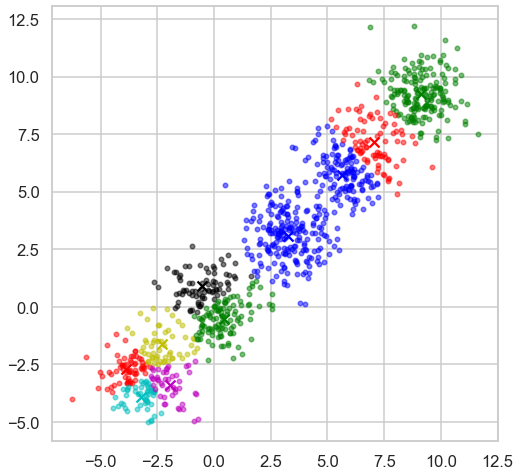

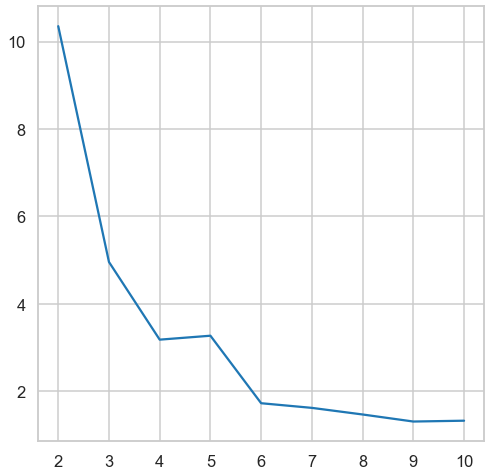

In [16]:
# Example 2
metric_list=[]
for num_clusters in range(2, 11):
    X=Example2()
    (Cluster_Centroids, output, dist_func) = GUC_Kmean(X, num_clusters, 'Ecluidian')
    metric_list.append(dist_func)
    plt.figure() 
    My_display_cluster(X, output, num_clusters)
plt.figure() 
plt.plot(range(2, 11),metric_list)

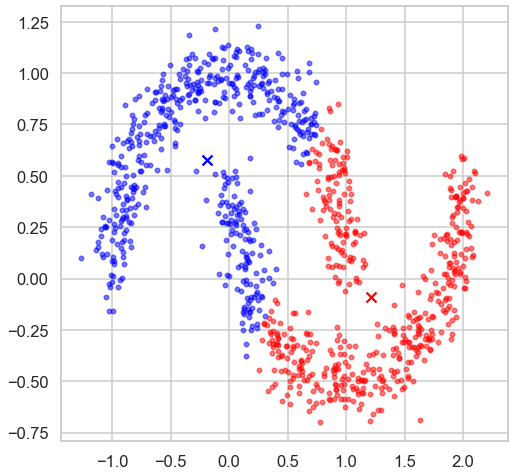

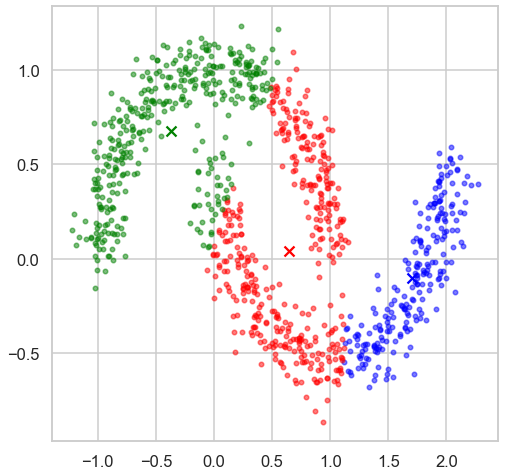

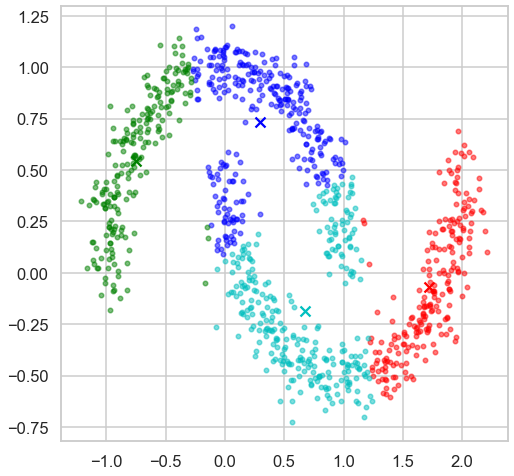

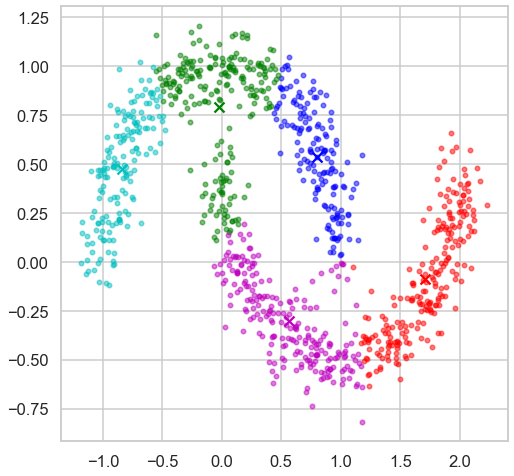

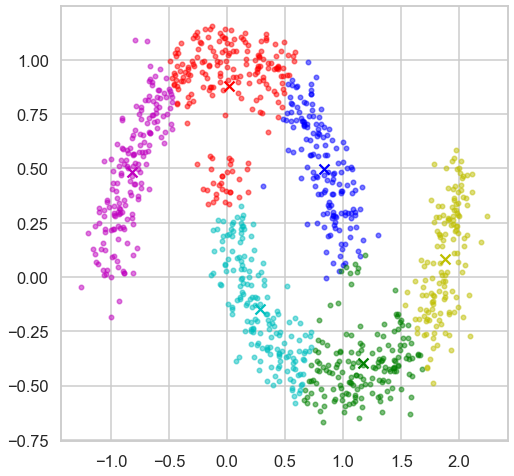

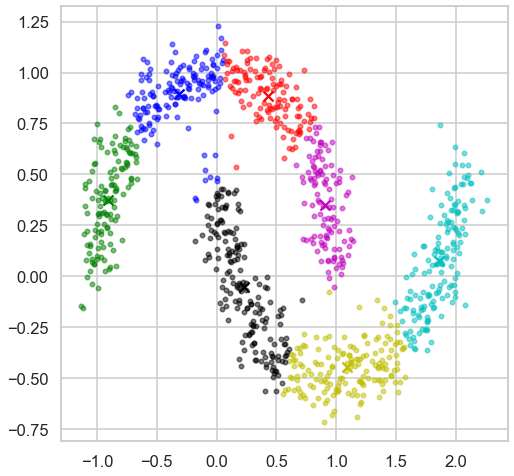

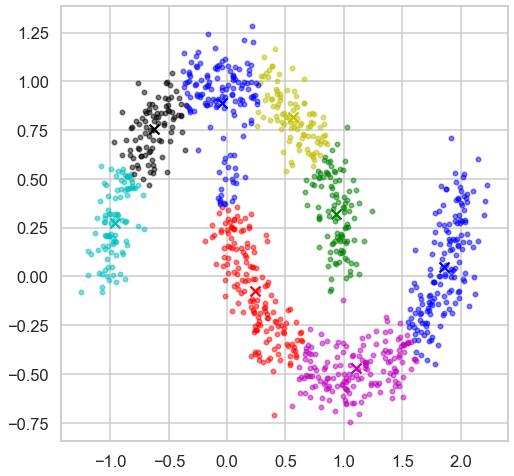

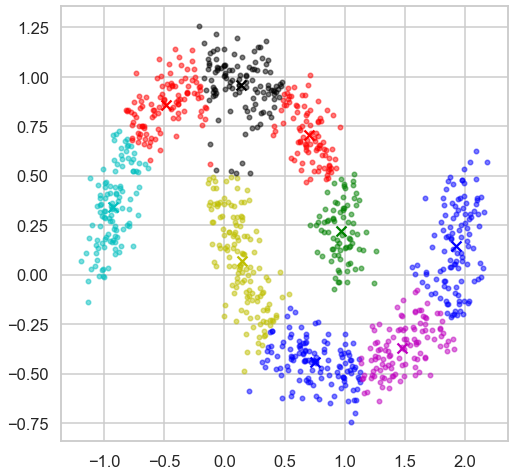

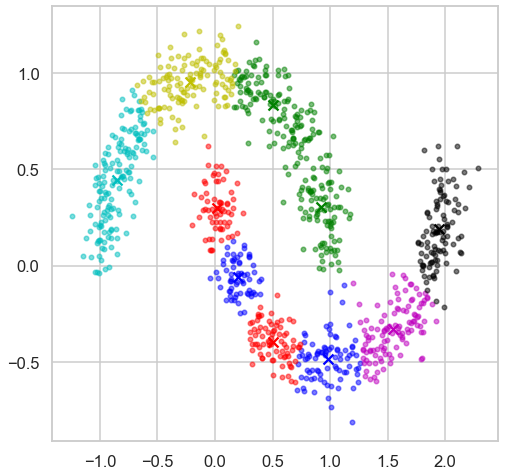

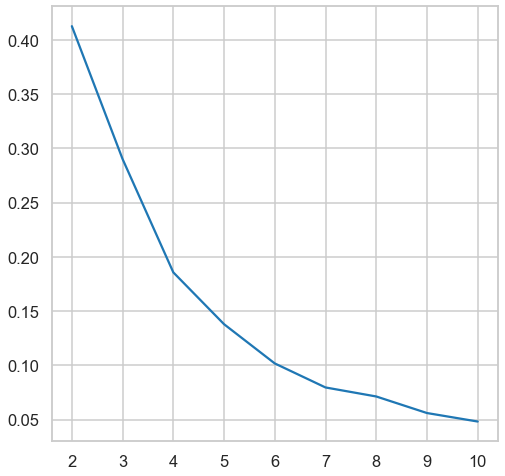

In [17]:
# Example 3
metric_list=[]
for num_clusters in range(2, 11):
    X=Example3()
    (Cluster_Centroids, output, dist_func) = GUC_Kmean(X, num_clusters, 'Ecluidian')
    metric_list.append(dist_func)
    plt.figure() 
    My_display_cluster(X, output, num_clusters)
plt.figure() 
plt.plot(range(2, 11),metric_list)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [18]:
from sklearn.decomposition import PCA
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.spatial import distance

In [19]:
data=pd.read_csv("Customer data.csv")
data.head()


ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [20]:
# PCA is an unspuervised technique for multivariables
# used for set identification (Andrew ng ML course)
# compression of vars to specific number 
# here we compress into 2 as 2D
pca = PCA(2)
data = pca.fit_transform(data)
data

array([[  3720.13852186,    982.40128779],
       [ 29822.85339131,    861.45599927],
       [-31739.49790755,   1143.37368014],
       ...,
       [-34558.63873175,   -838.68341481],
       [-22990.76629242,   -892.84478844],
       [-52542.45852616,   -758.03073432]])

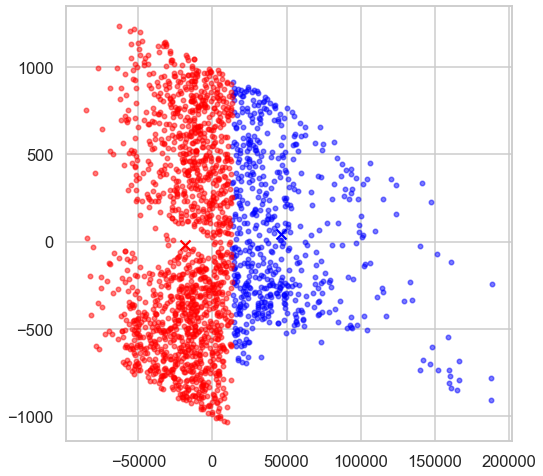

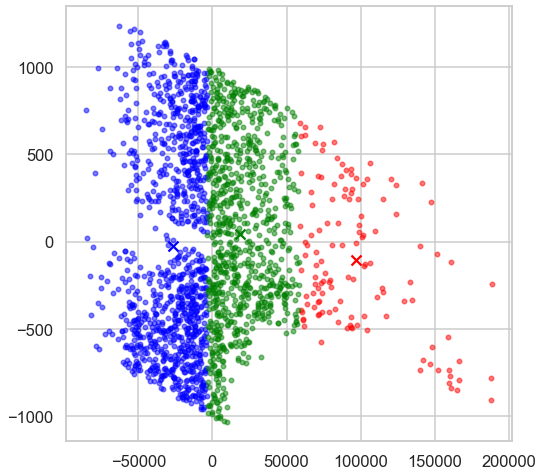

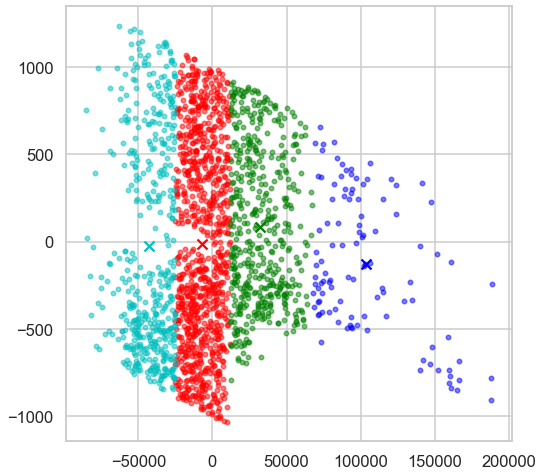

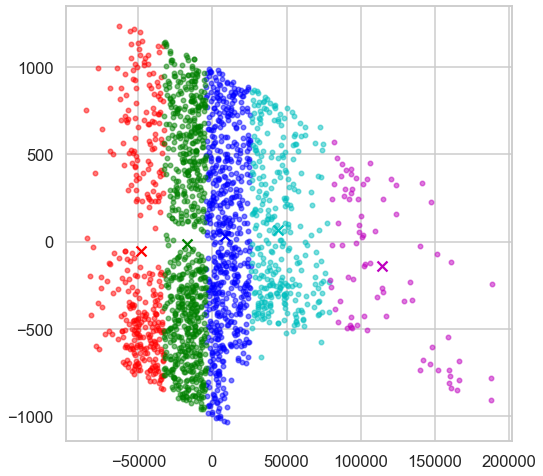

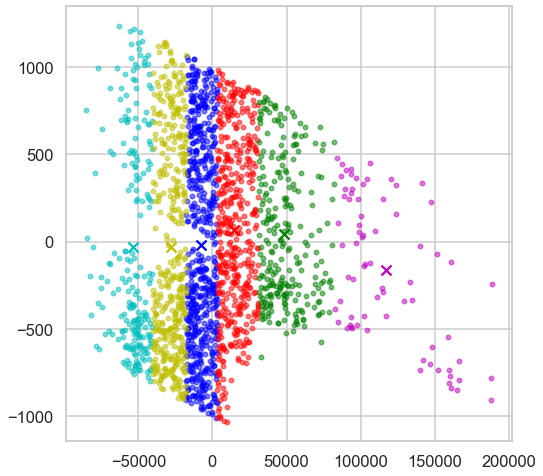

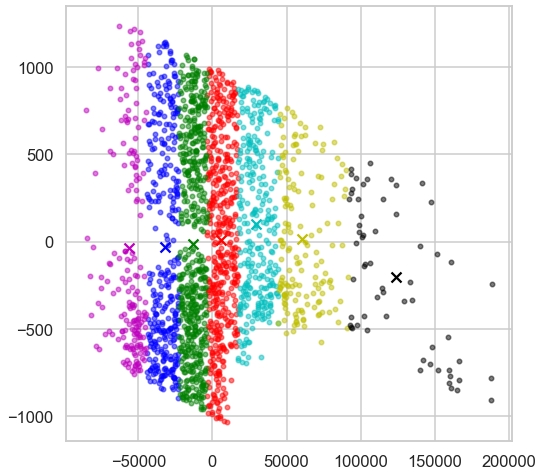

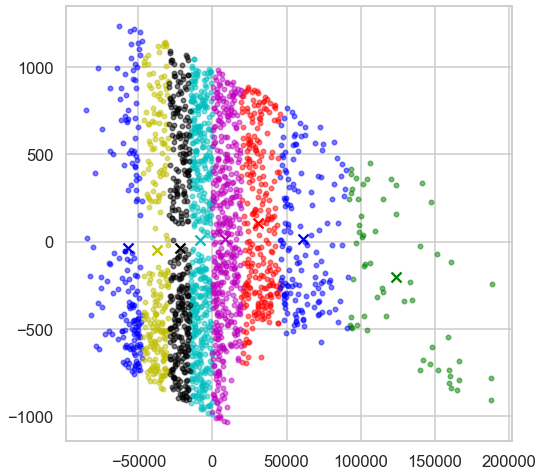

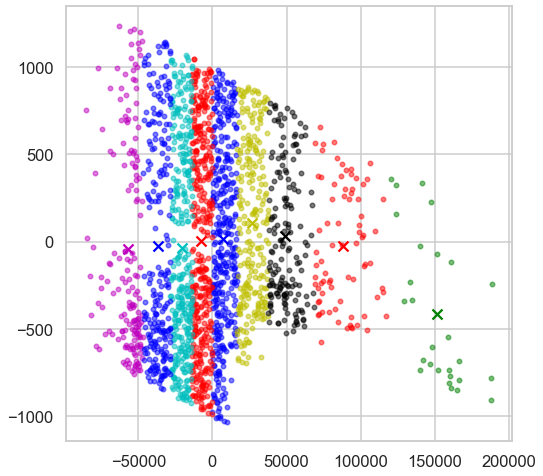

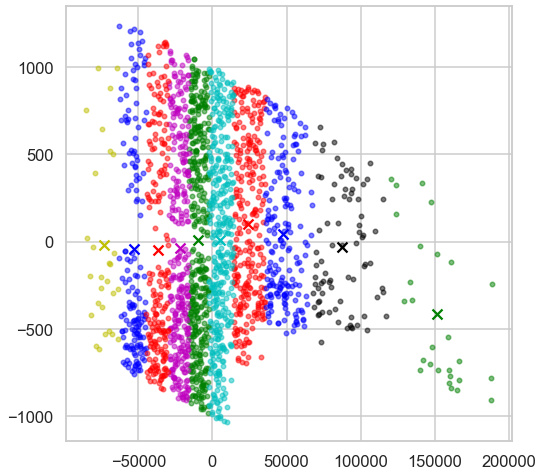

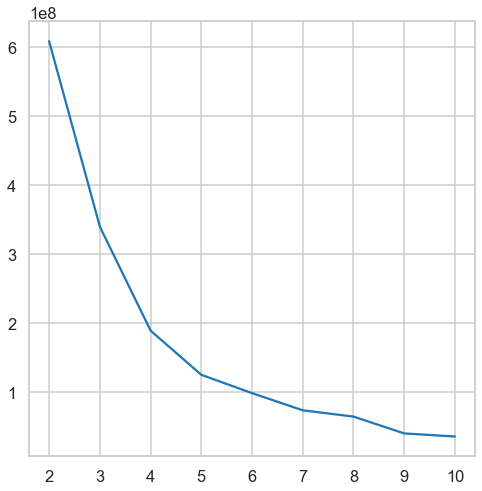

In [21]:
# Customer data
metric_list=[]
for num_clusters in range(2, 11):
    (Cluster_Centroids, output, dist_func) = GUC_Kmean(data, num_clusters, 'Ecluidian')
    metric_list.append(dist_func)
    plt.figure() 
    My_display_cluster(data, output, num_clusters)
plt.figure() 
plt.plot(range(2, 11),metric_list)

### =====> without pca <=====

In [19]:
data=pd.read_csv("Customer data.csv")
data.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [20]:
from itertools import combinations

data = pd.read_csv("Customer data.csv")  # load data from csv
print(data.head())  # print head to check
data.drop(columns='ID', inplace=True)  # drop the ID col
print(data.head())  # print head to check
print(data.shape)  # print shape to check
columns = data.columns  # get the cols names
print(columns)  # print head to check
d2 = data[['Sex', 'Age']]  # an example for taking two cols
print(d2.head())  # print head to check
#-----------------------------------------------------
# now we need to make a unique combination of all cols
list_combinations = list() # create an empty list
sample_set = set(columns) # make a set of cols
help(combinations) # check what is the usage of combination class
list_combinations += list(combinations(sample_set, 2)) # make unique combination
print(list_combinations[0][1])# print tuple to check
print(list_combinations)# print list to check
print(len(list_combinations)) # print length of the list
# the length equals to 21 which the same value of 7c2
#----------------------------------------------------------

# the scaler - for robust scaling of Normalization
from sklearn.preprocessing import RobustScaler

# set up the scaler
scaler = RobustScaler()
f = pd.DataFrame(data['Income'])
# fit the scaler to the train set, it will learn the parameters
scaler.fit(f)
# transform train and test sets
data_scaled = scaler.transform(f)
# let's transform the returned NumPy arrays to dataframes
data_scaled = pd.DataFrame(data_scaled, columns=f.columns)
data['Income']=data_scaled
# data['Income']

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
   Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031         

<ipython-input-34-7a8d80877720>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


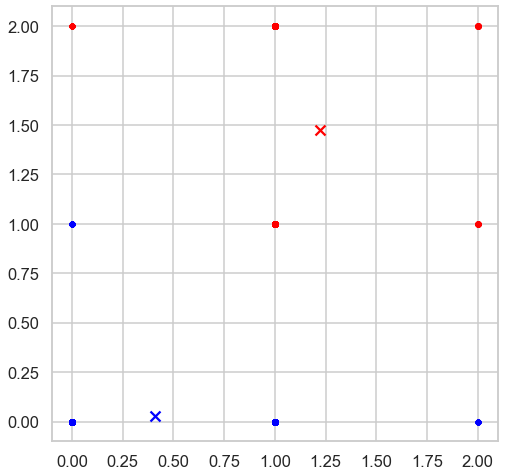

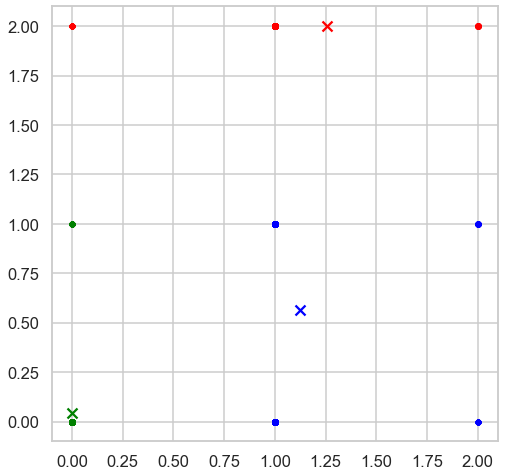

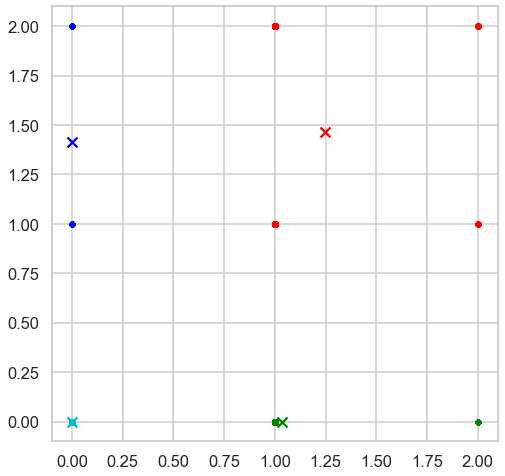

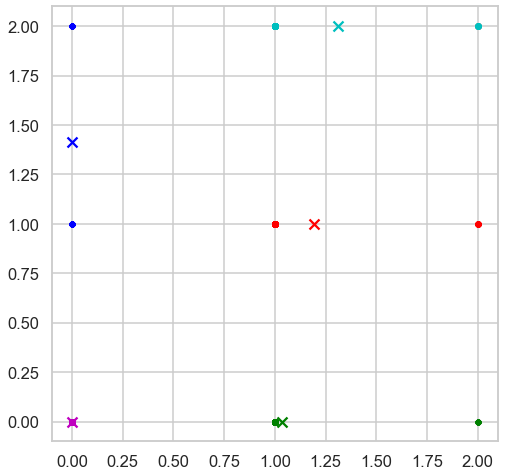

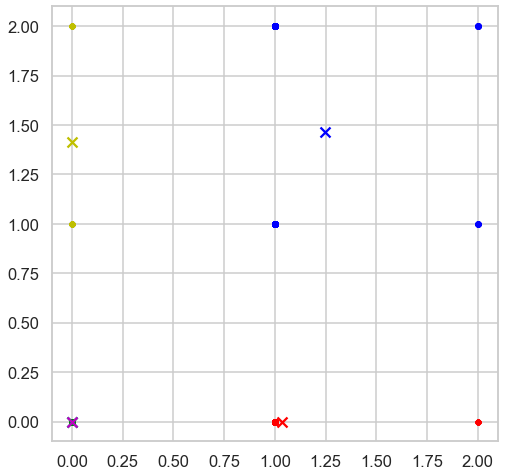

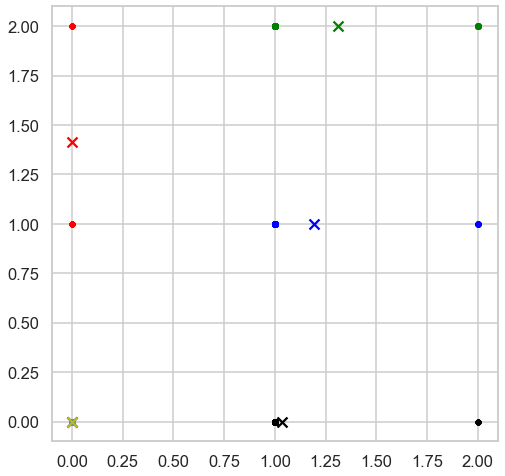

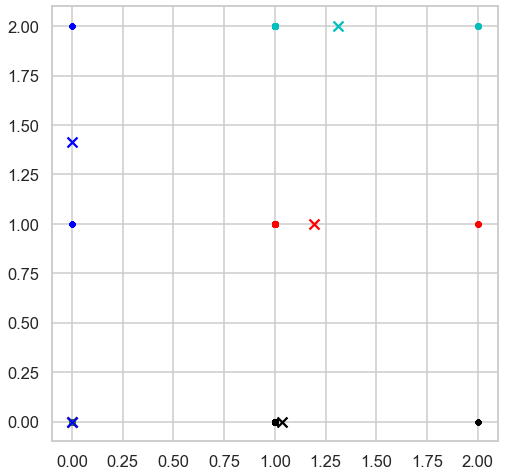

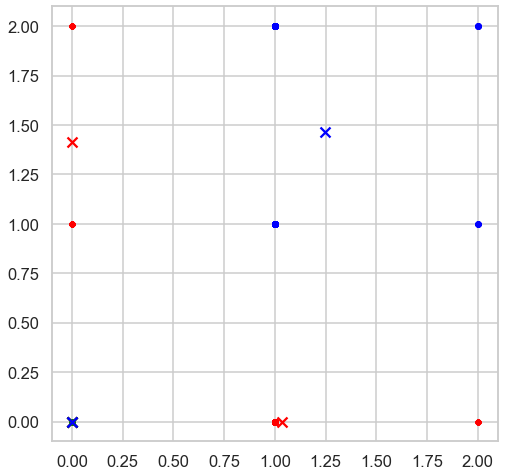

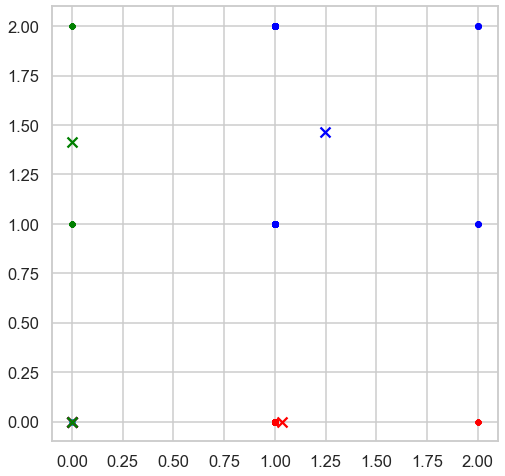

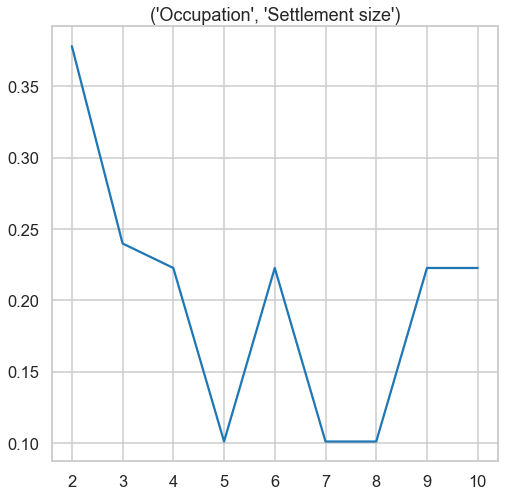

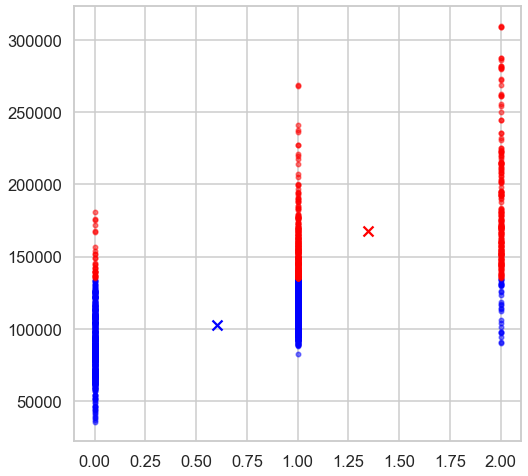

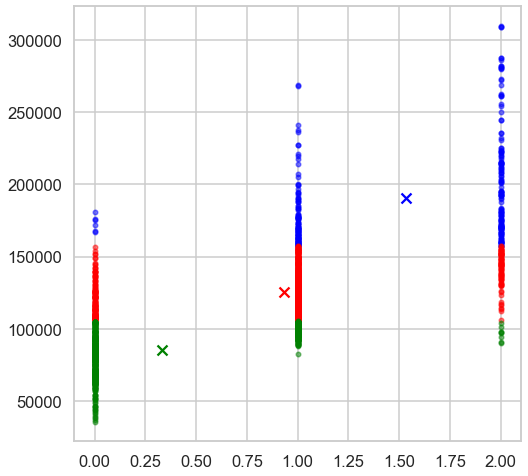

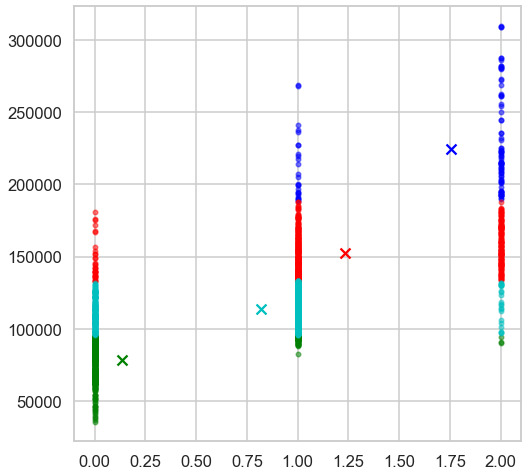

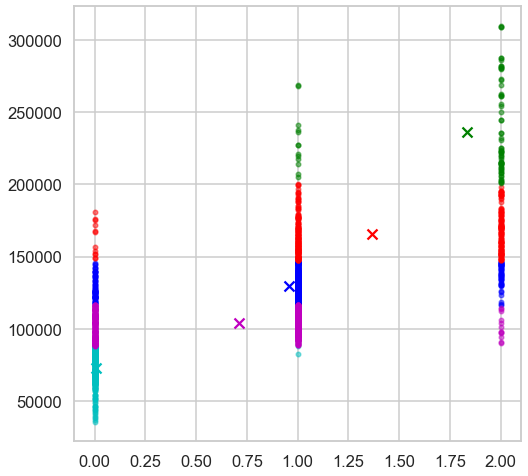

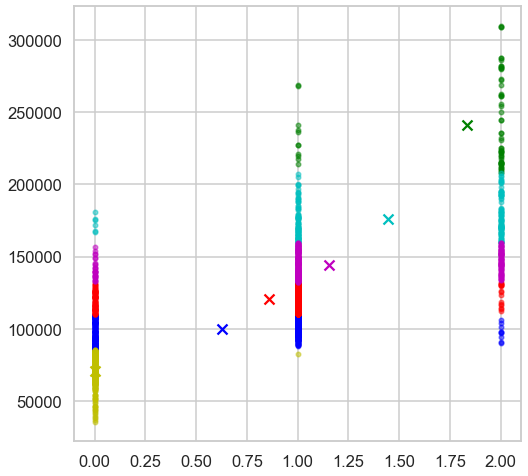

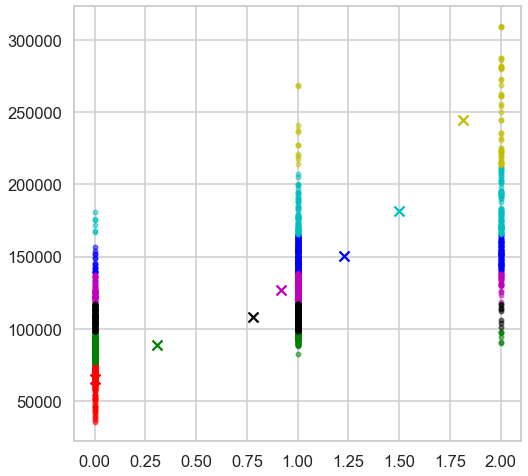

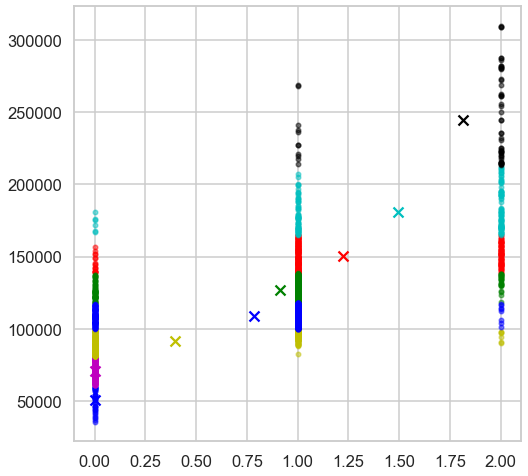

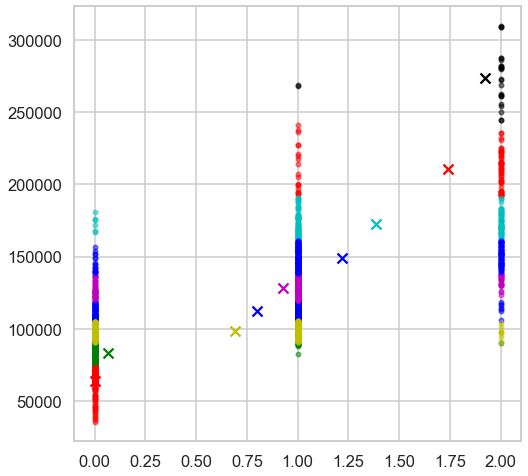

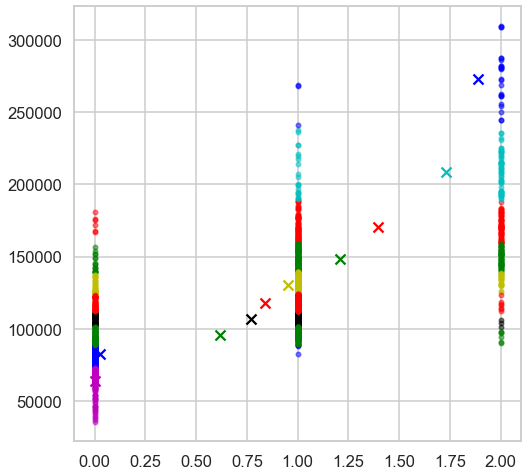

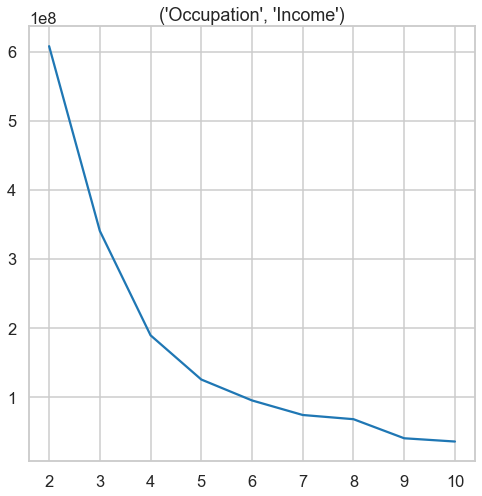

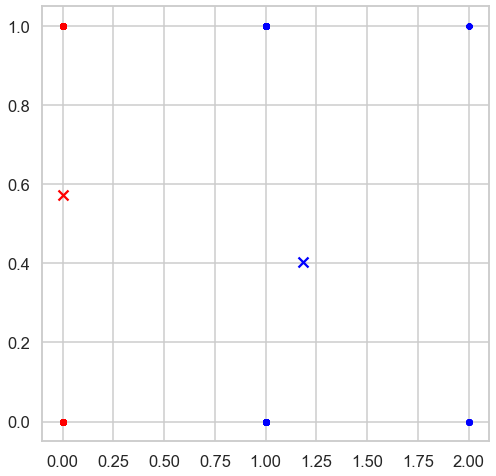

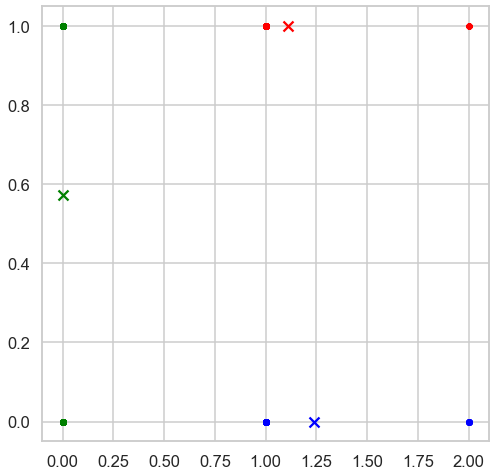

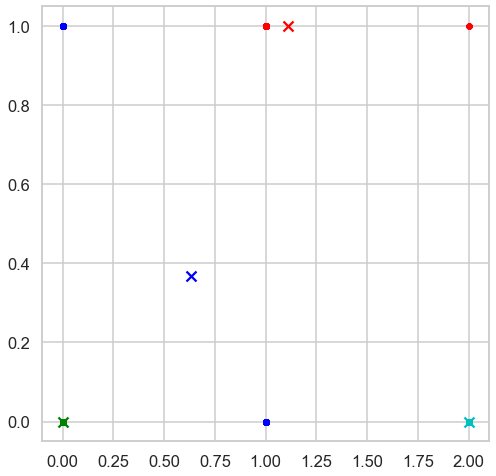

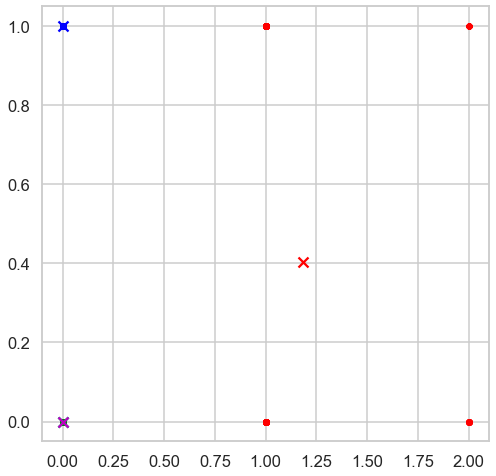

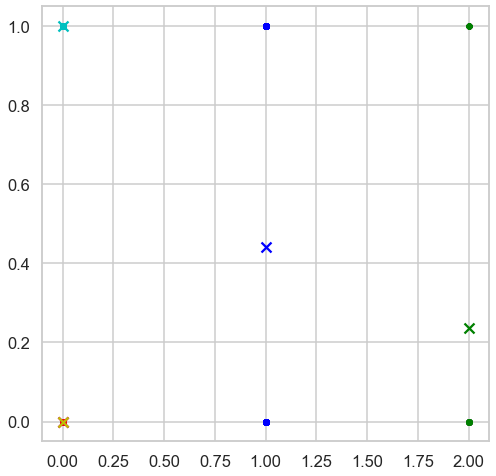

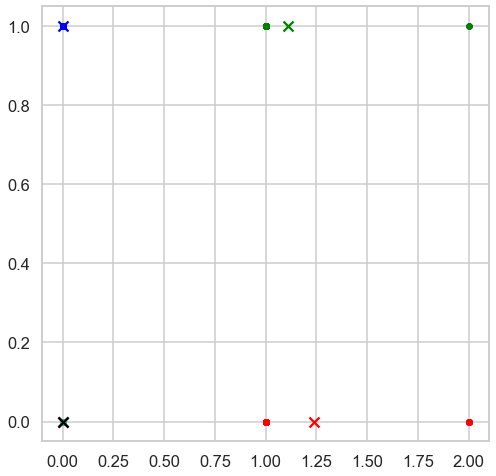

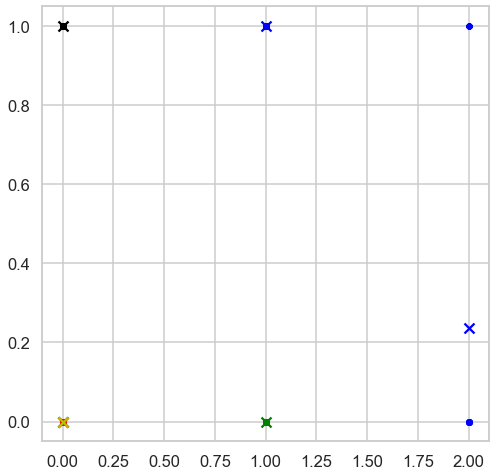

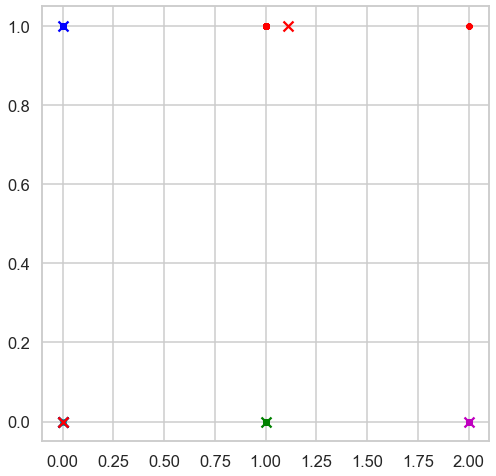

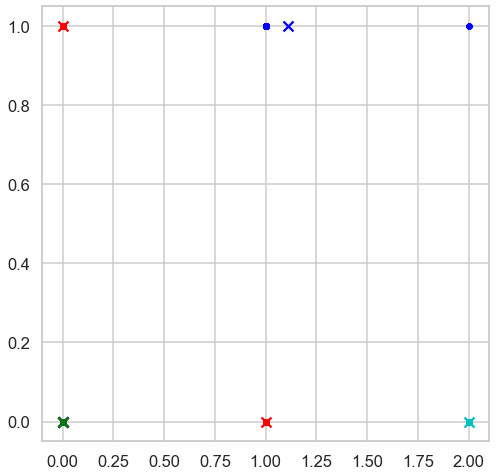

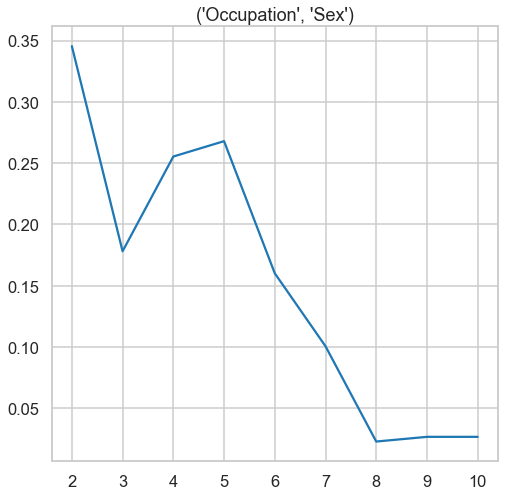

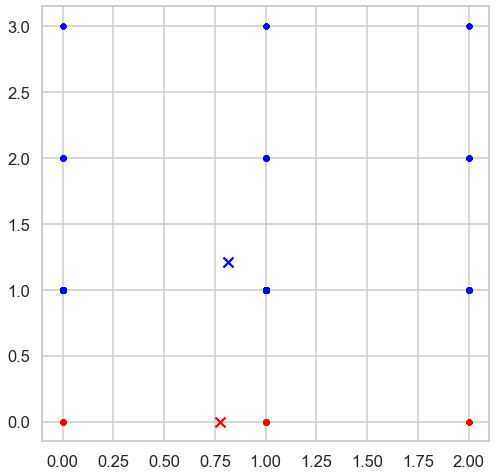

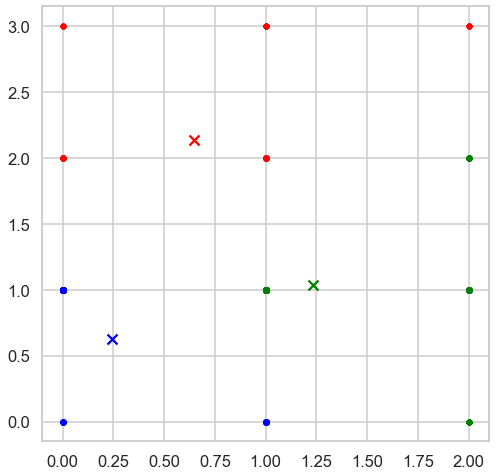

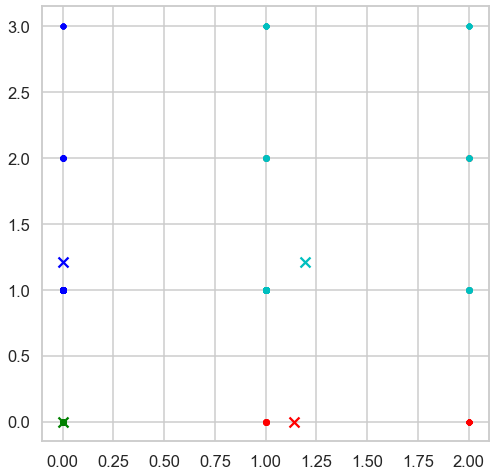

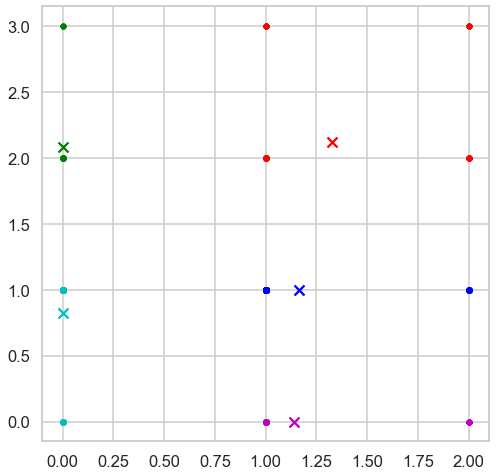

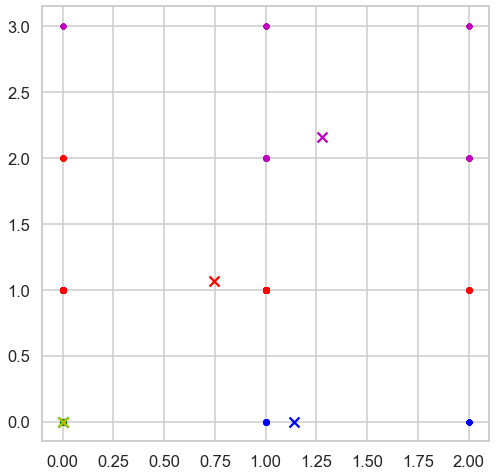

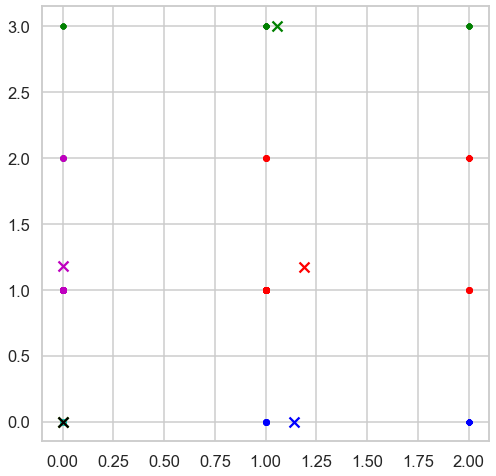

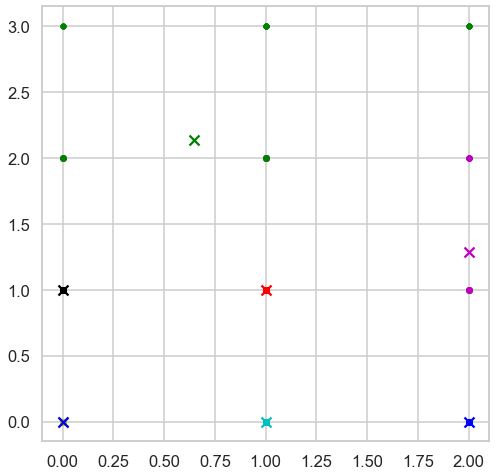

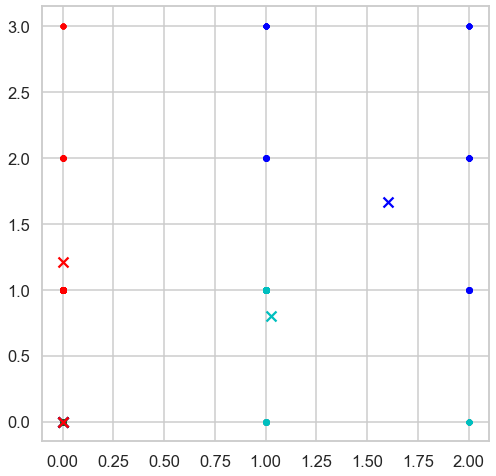

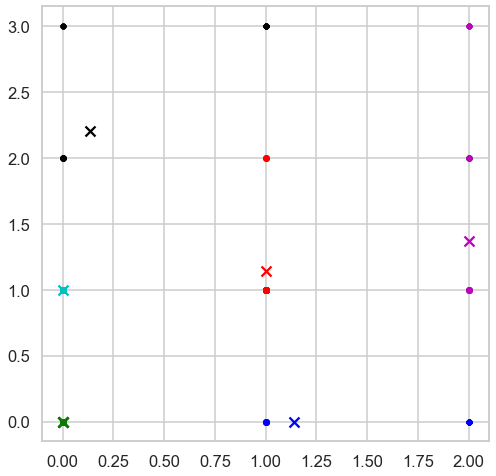

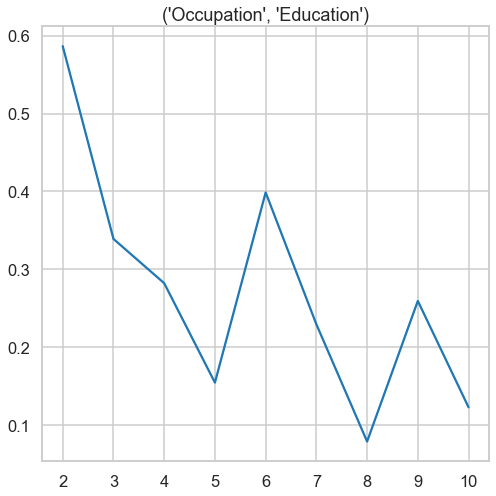

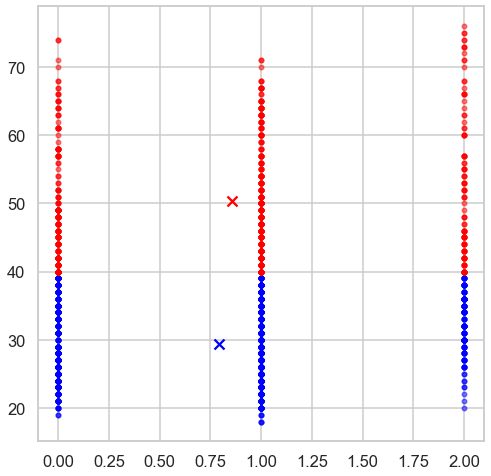

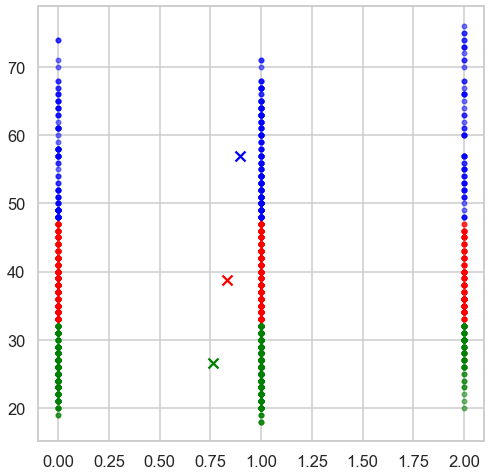

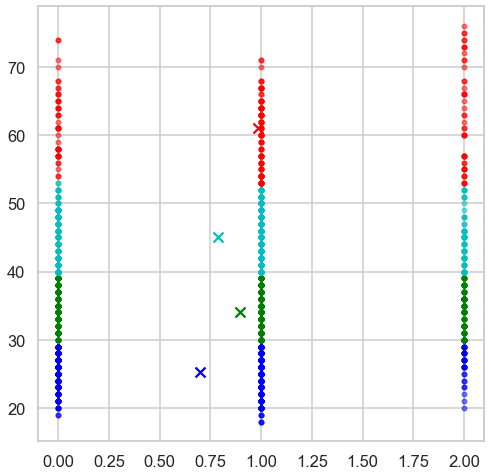

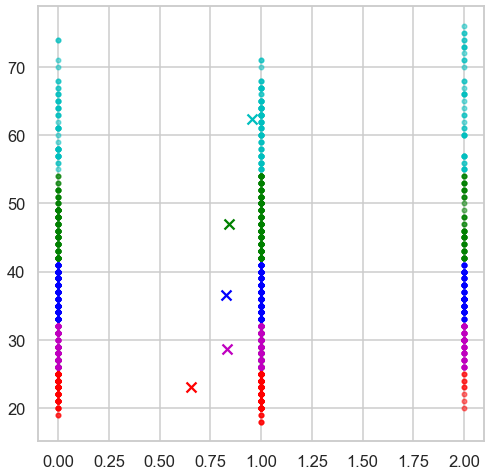

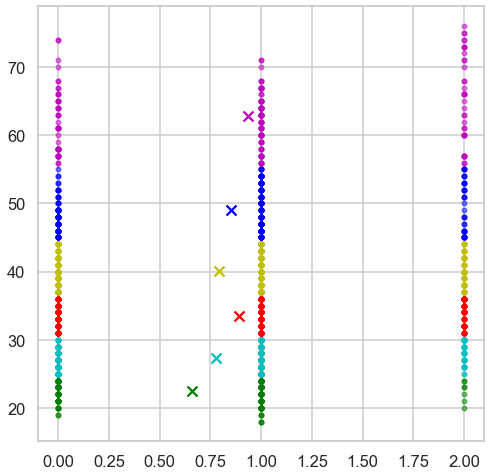

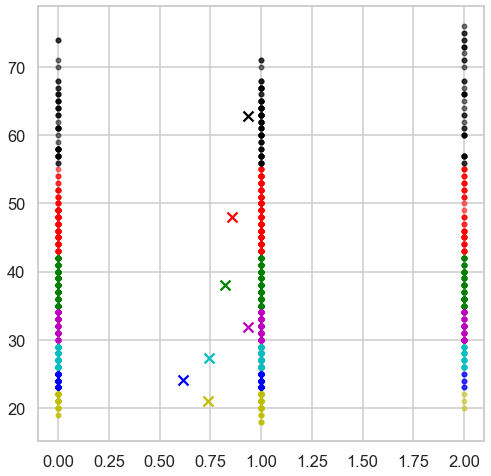

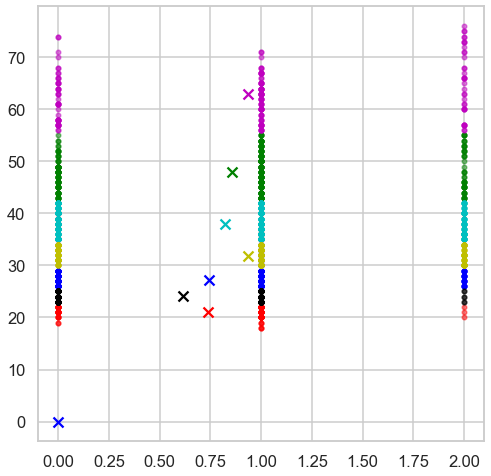

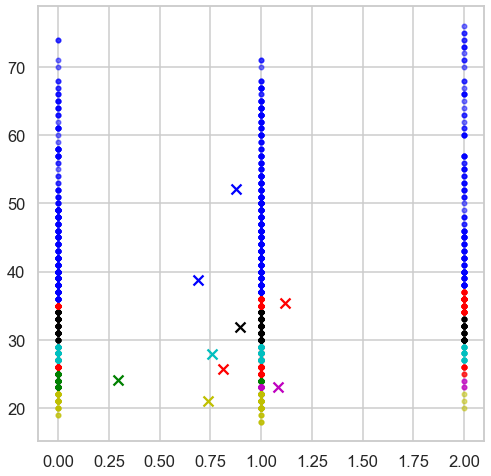

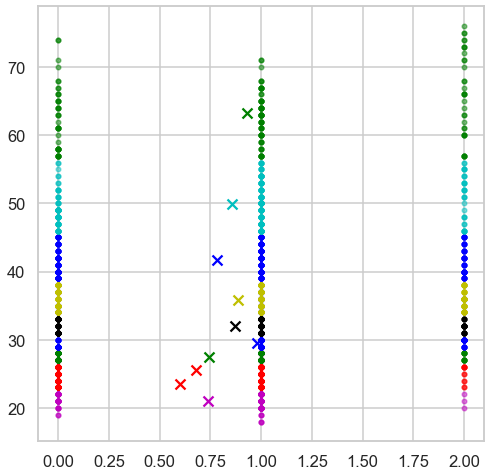

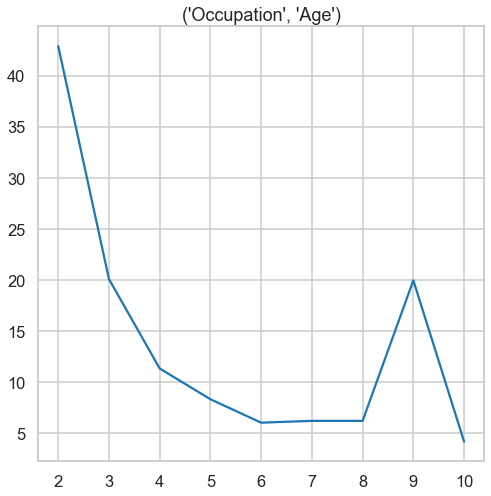

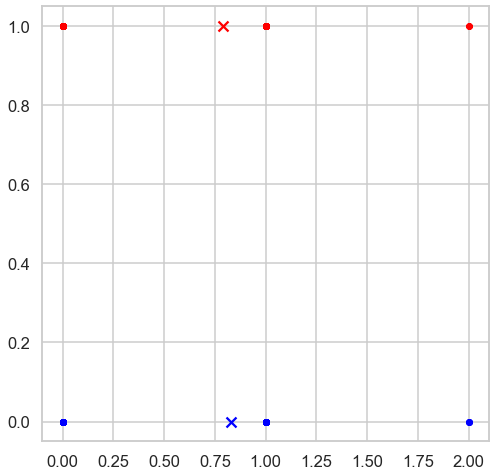

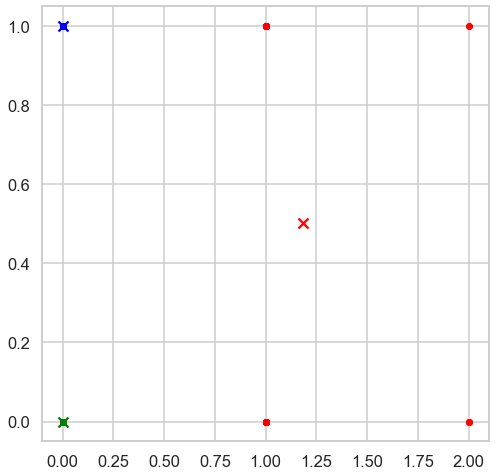

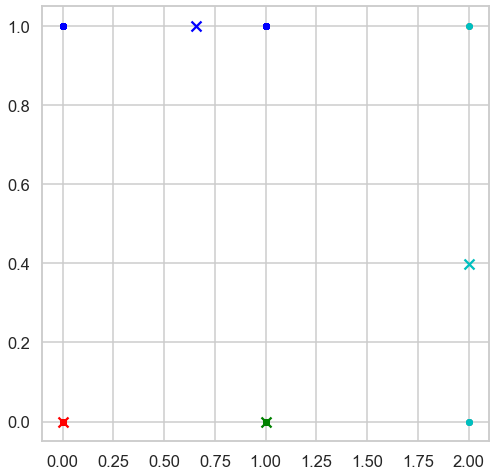

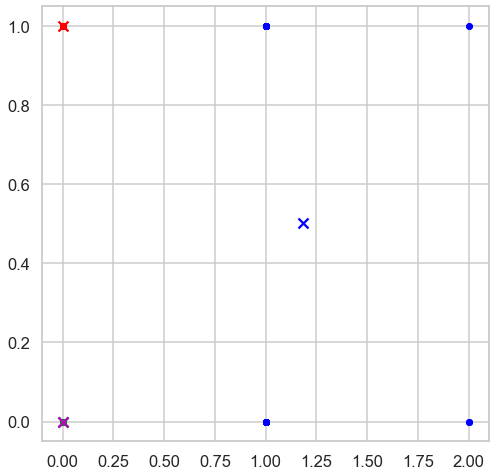

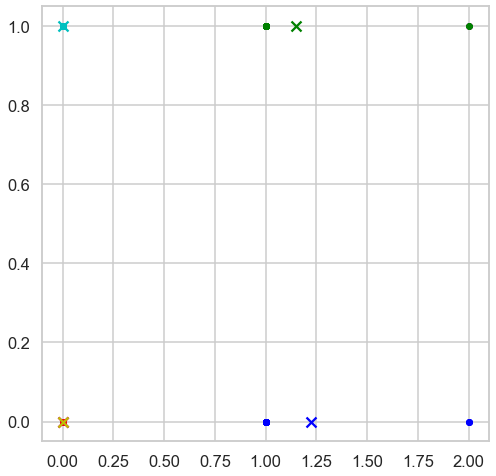

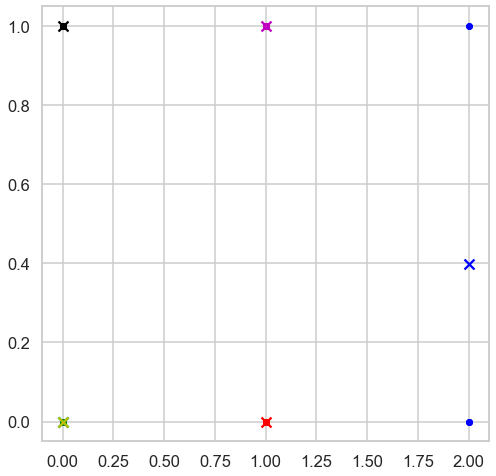

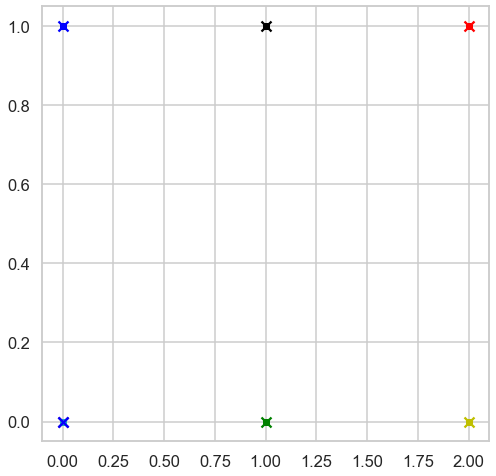

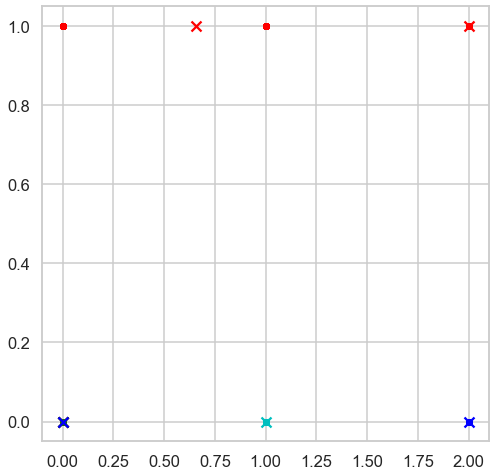

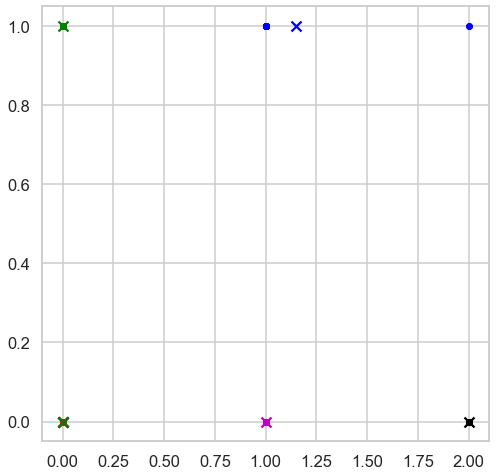

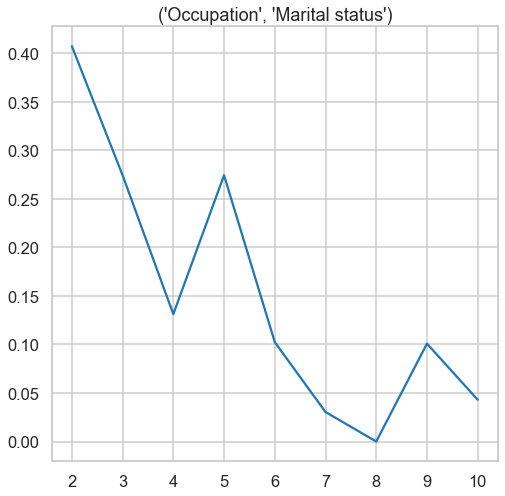

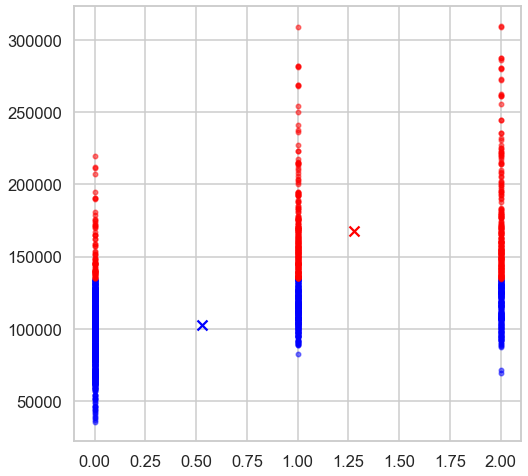

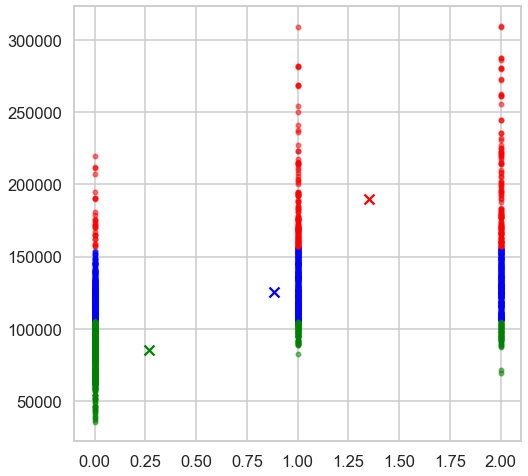

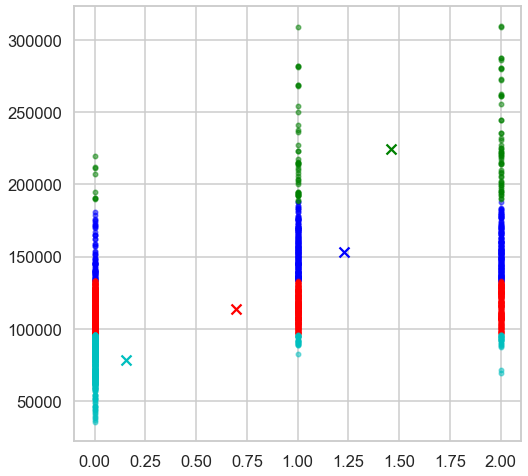

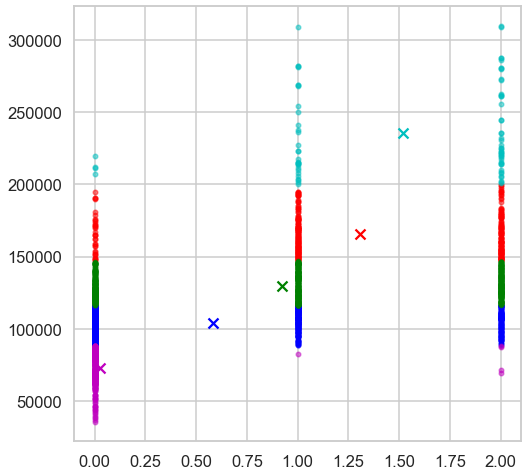

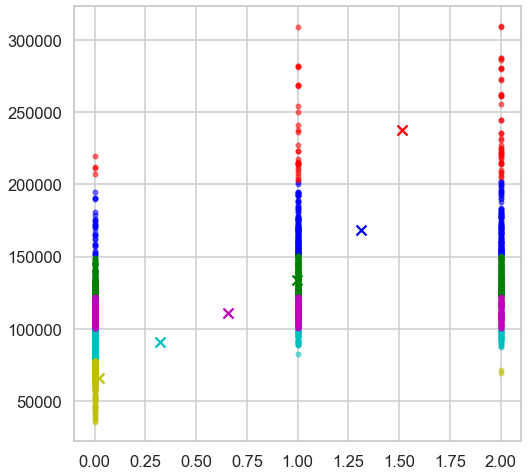

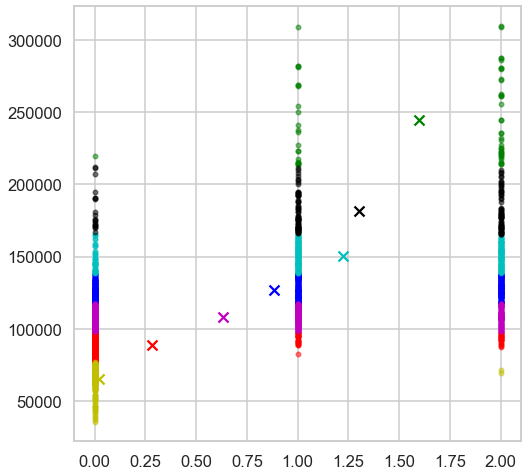

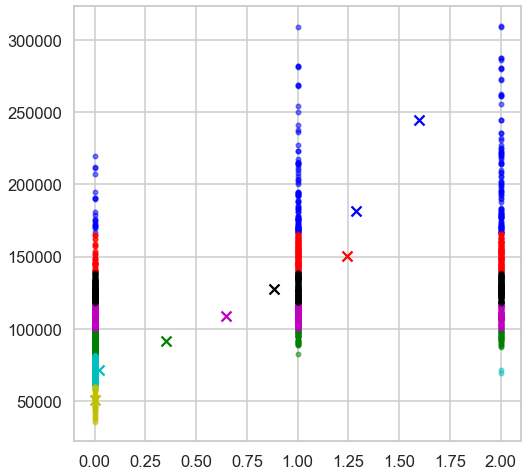

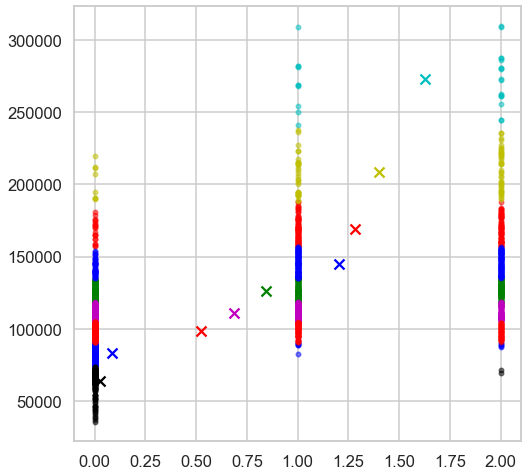

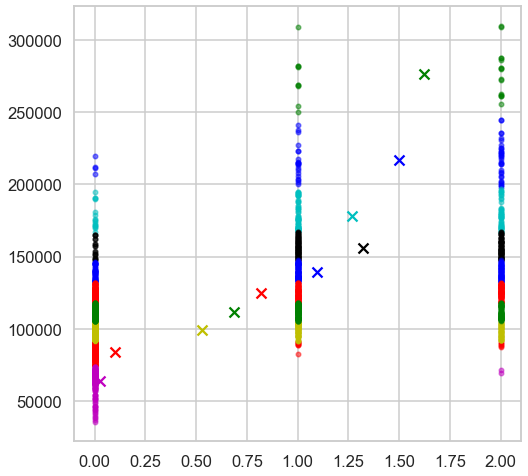

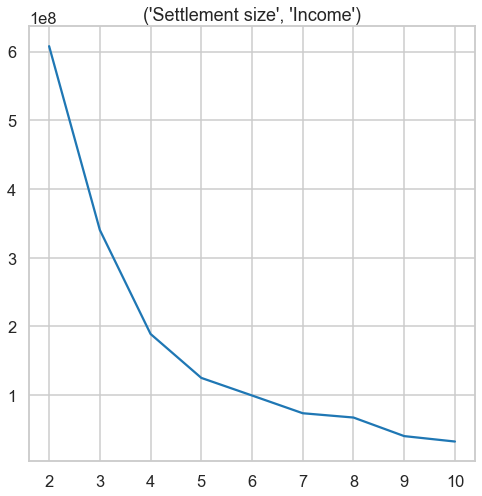

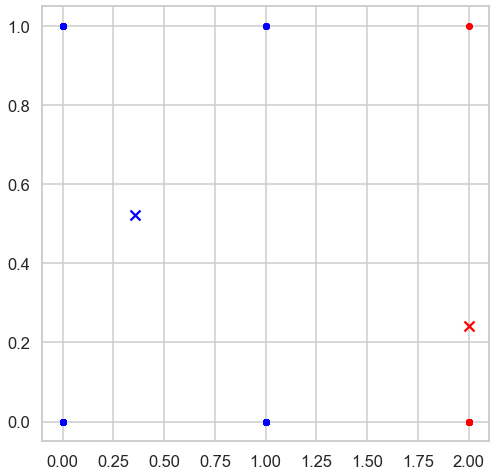

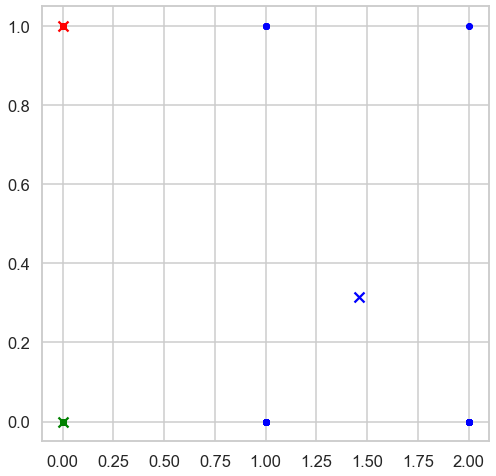

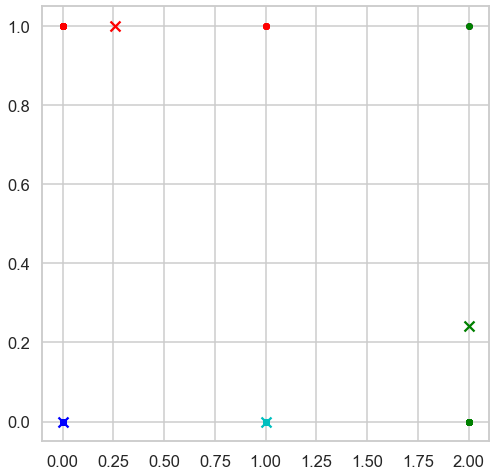

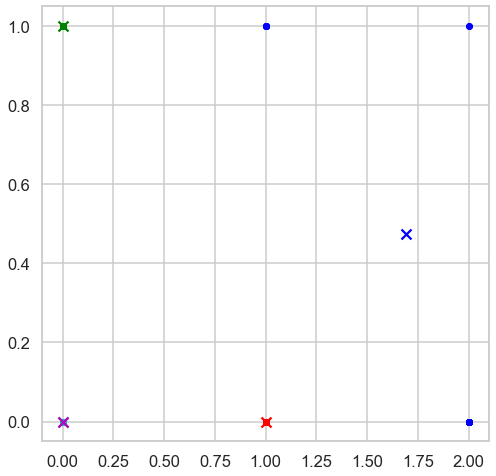

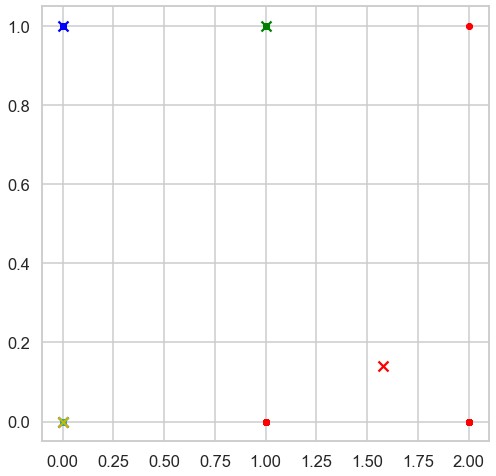

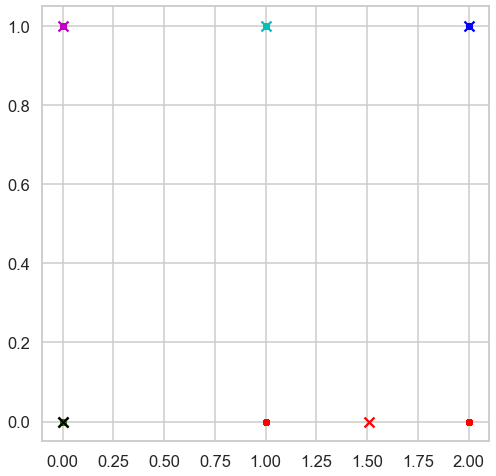

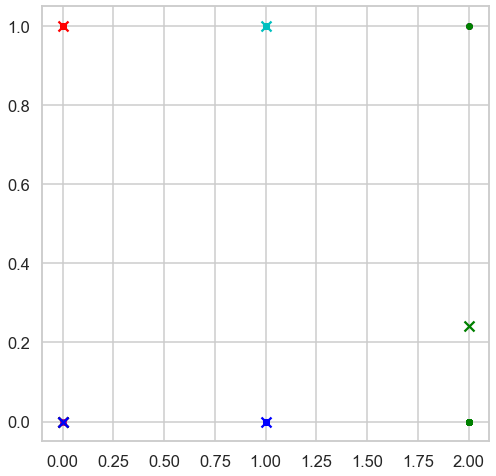

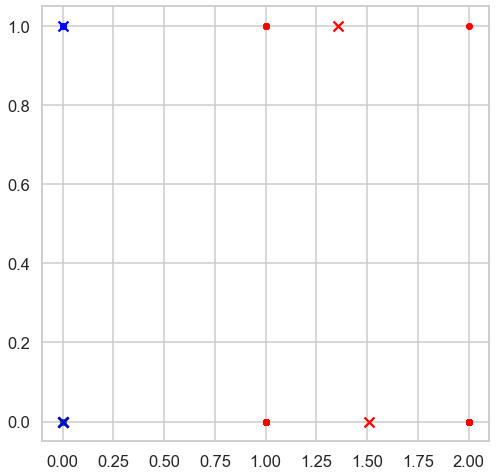

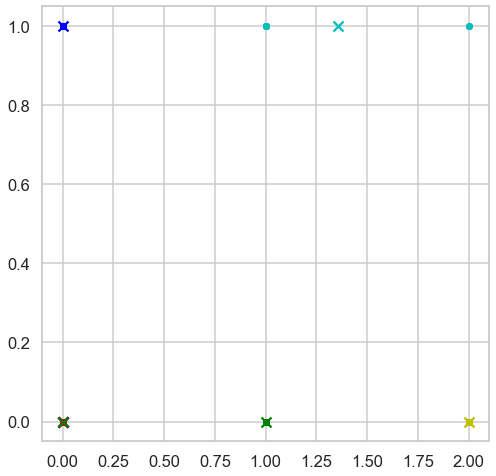

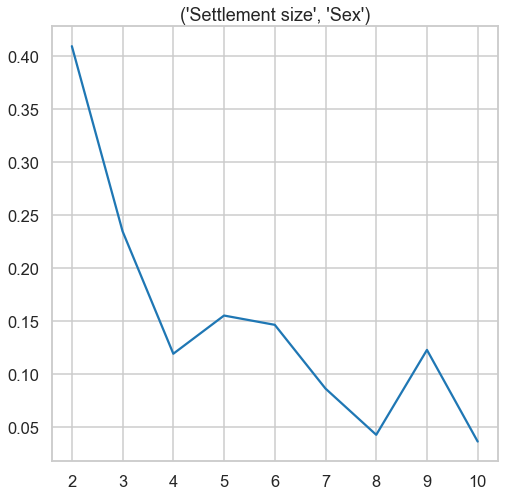

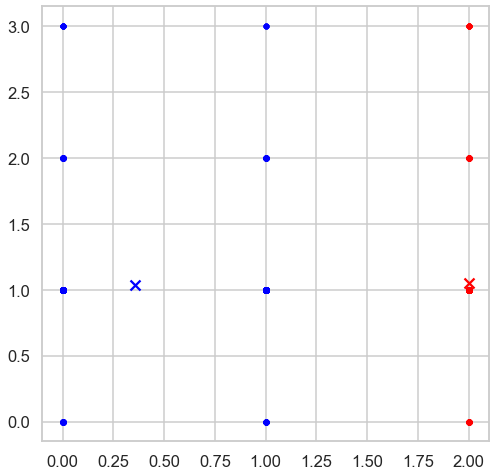

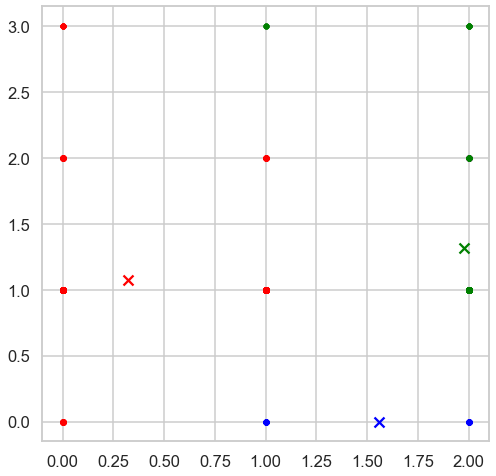

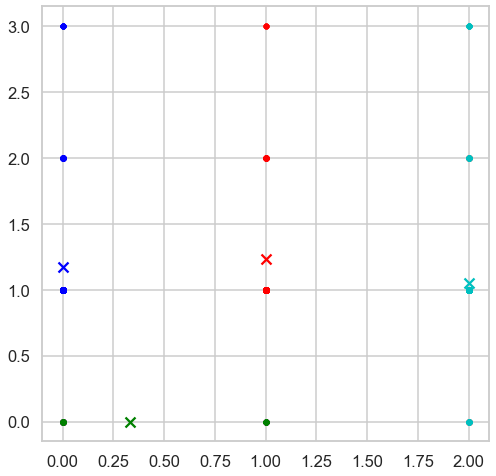

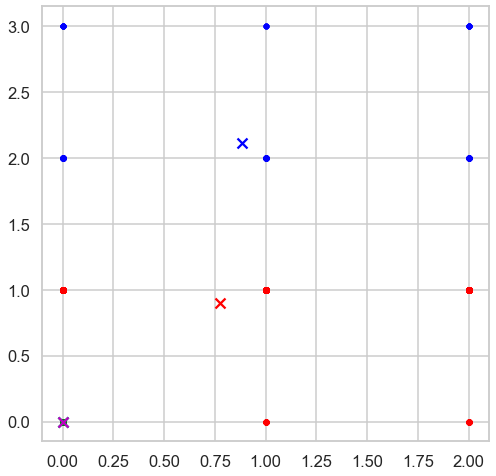

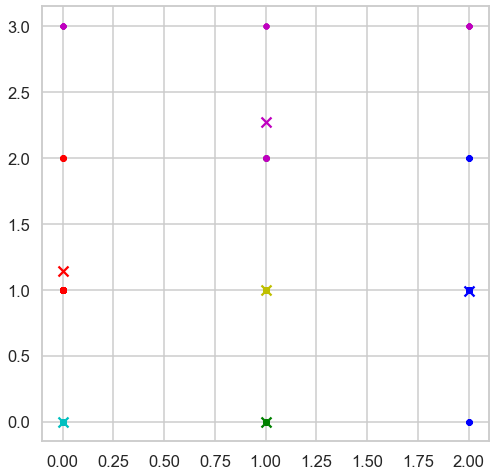

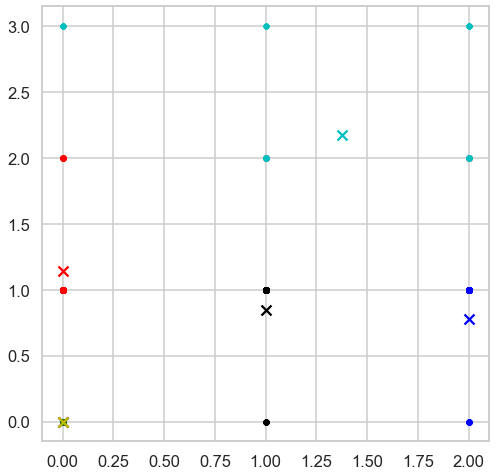

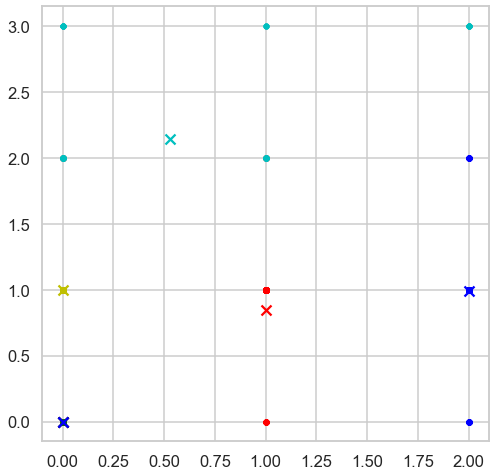

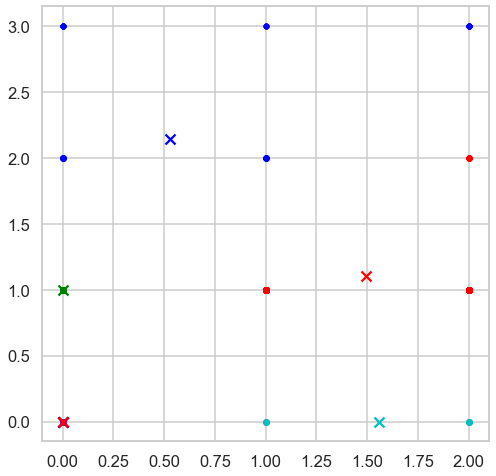

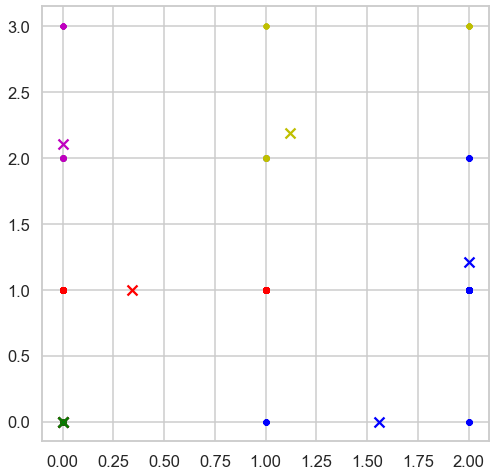

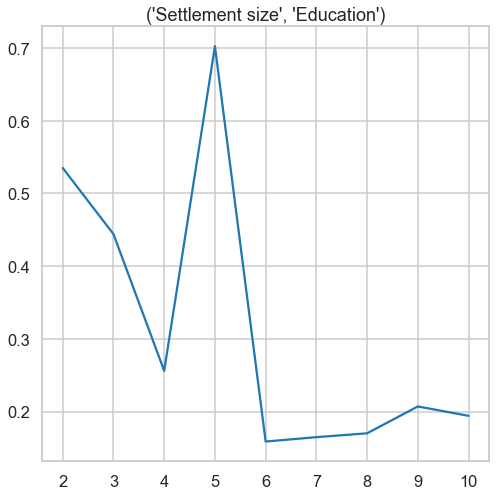

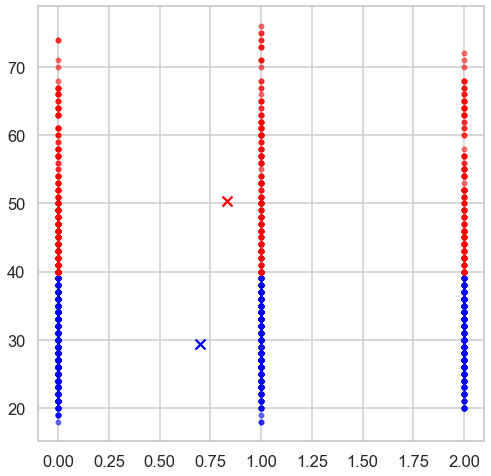

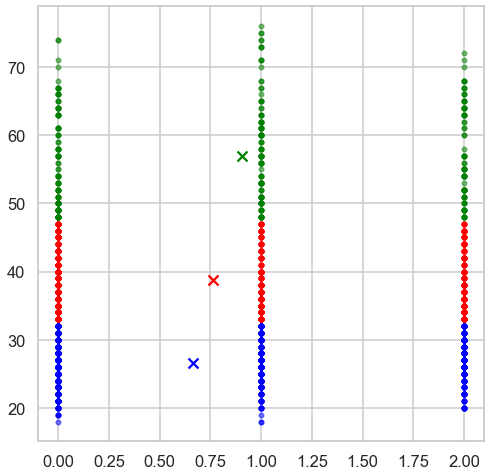

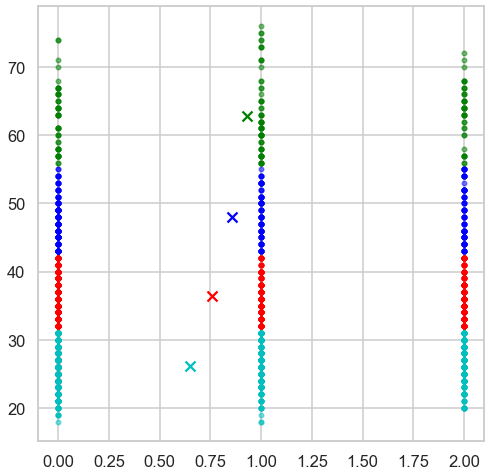

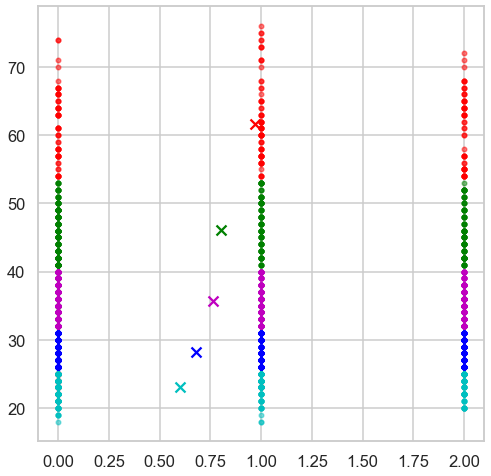

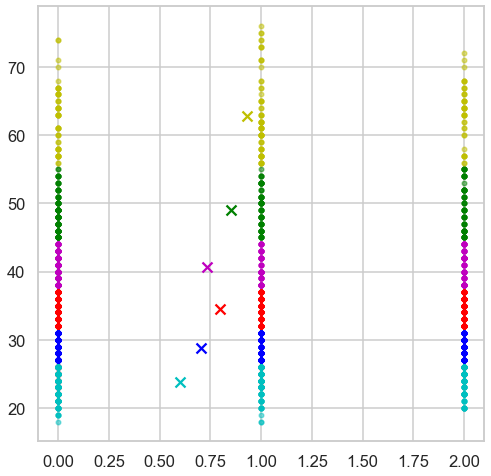

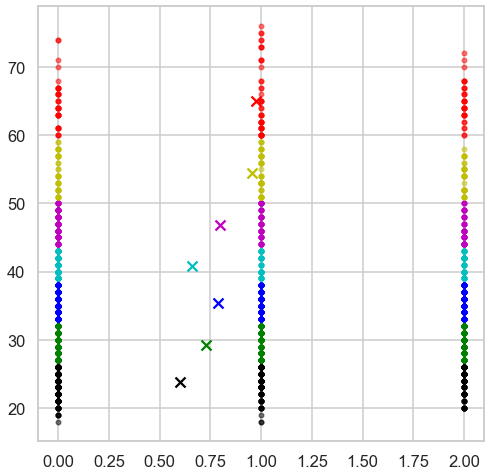

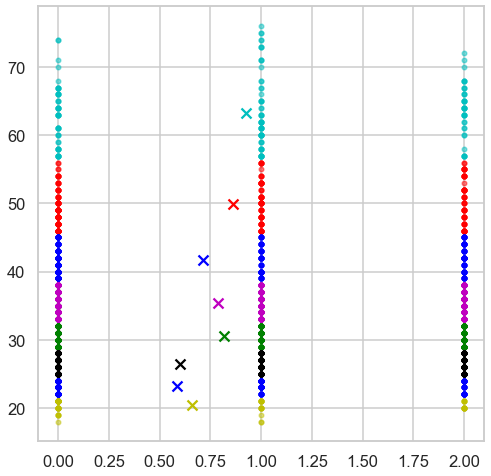

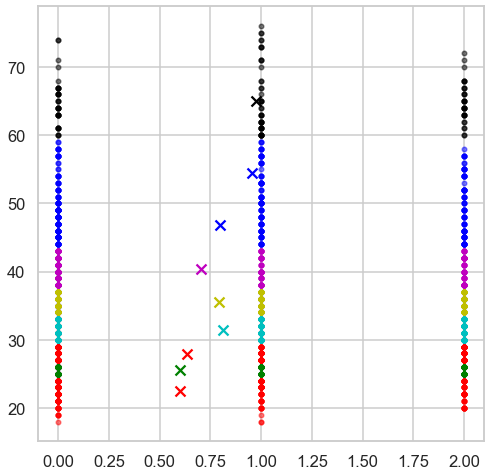

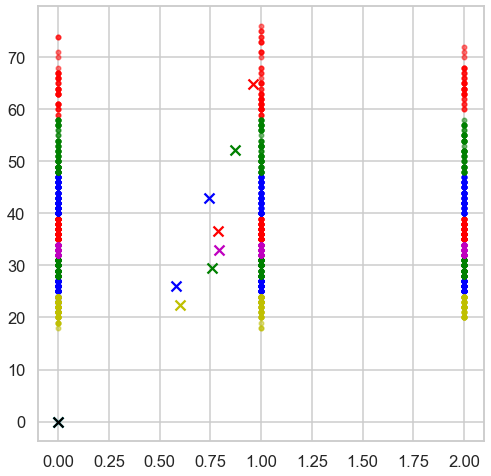

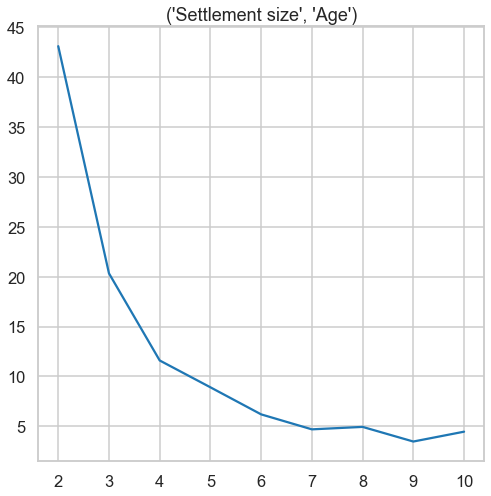

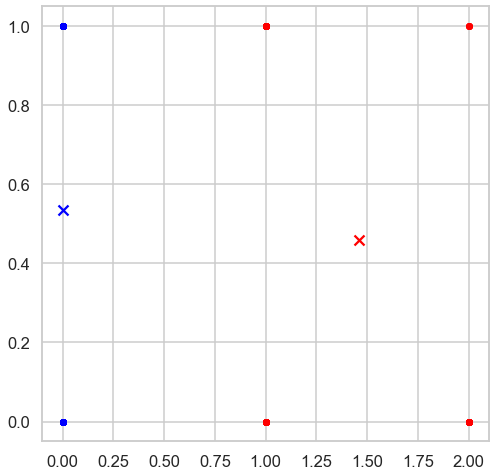

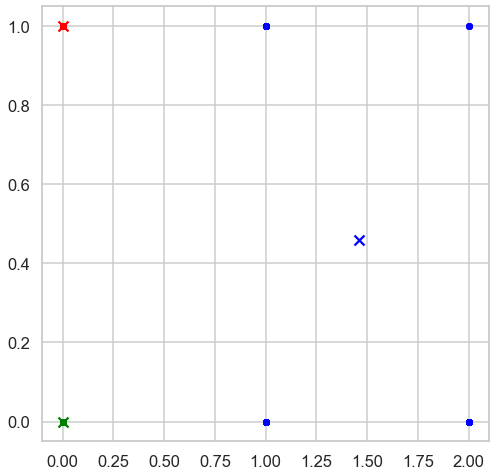

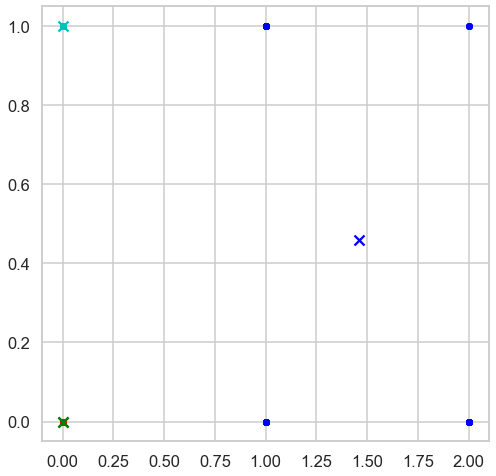

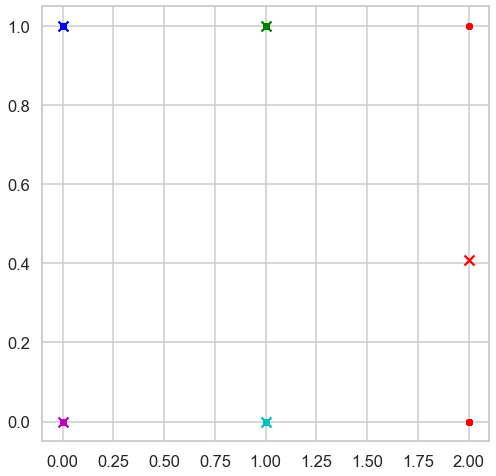

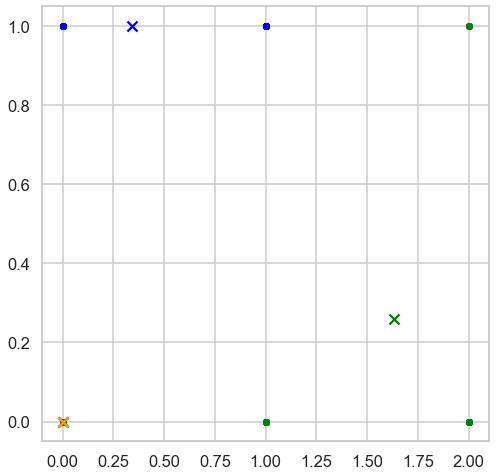

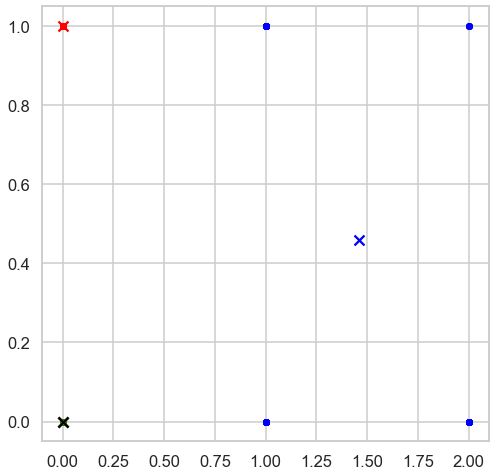

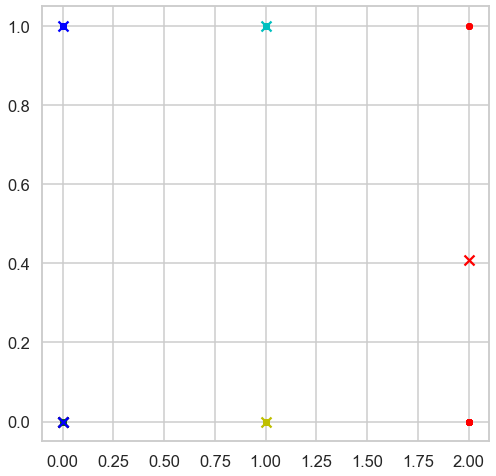

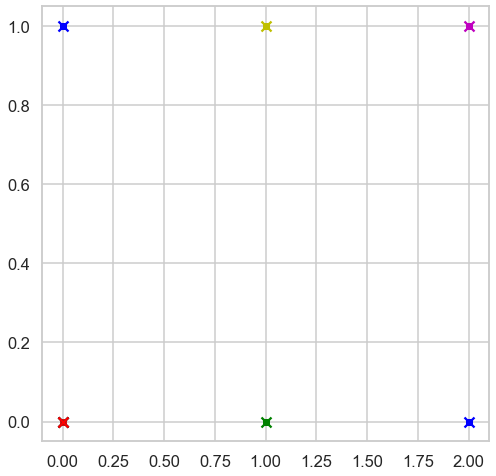

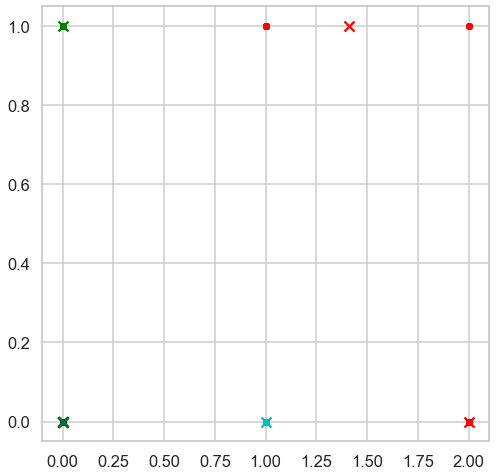

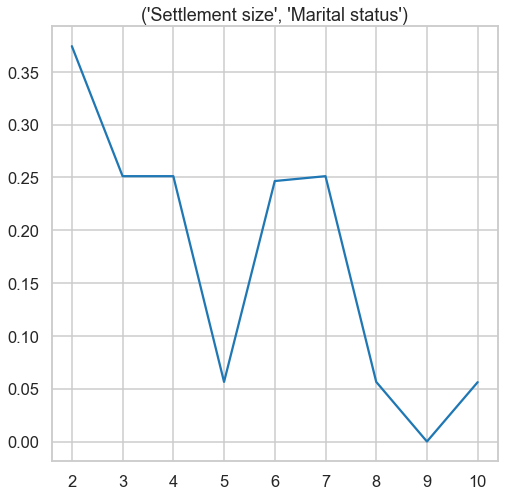

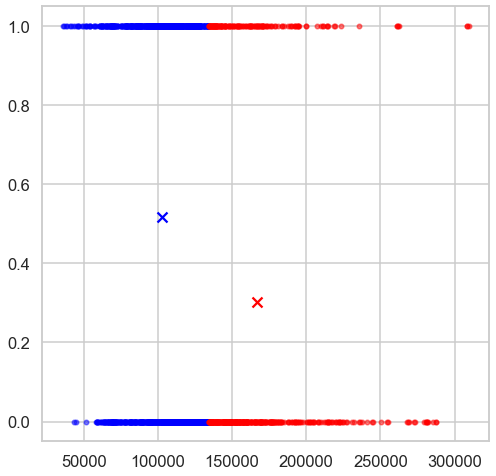

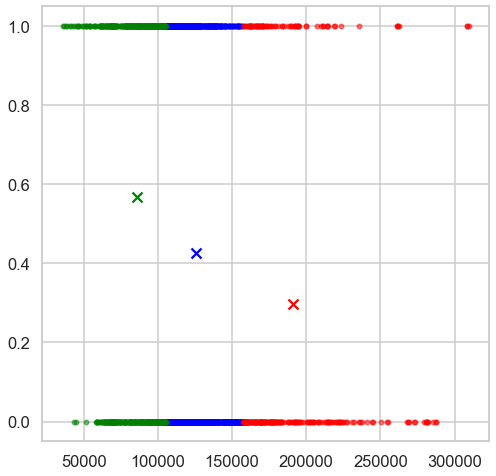

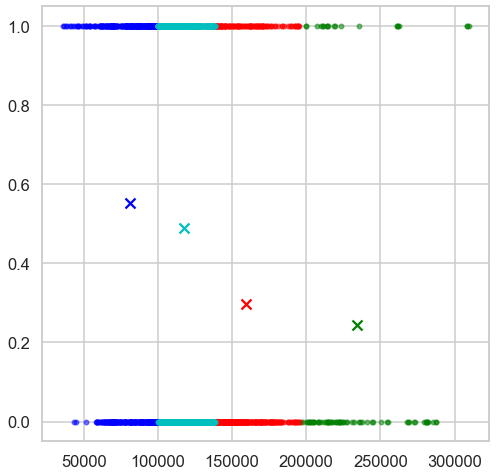

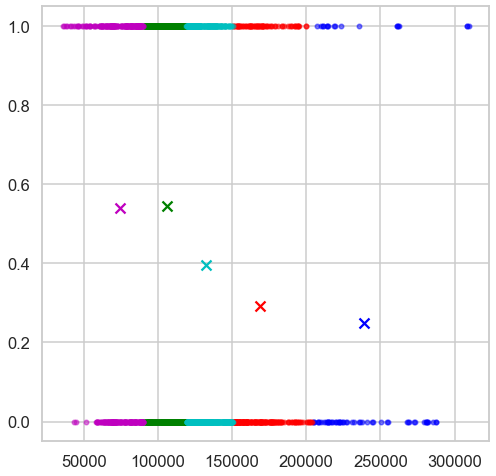

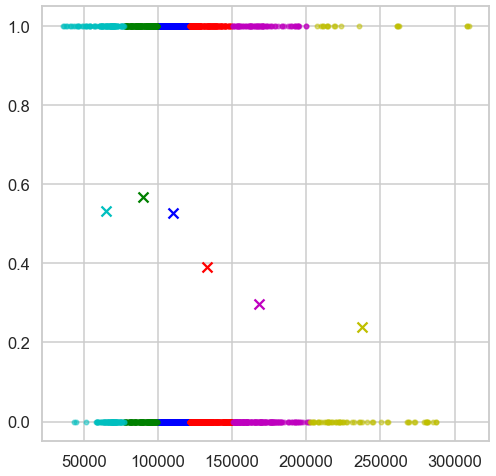

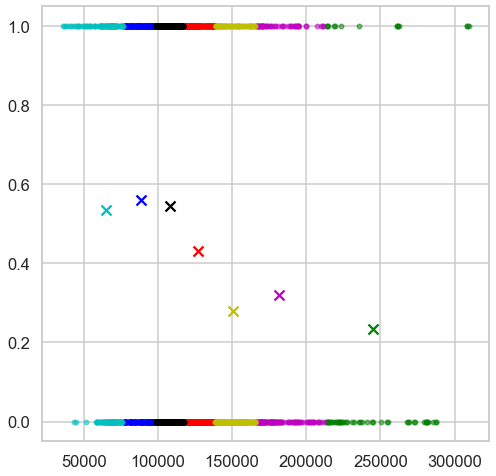

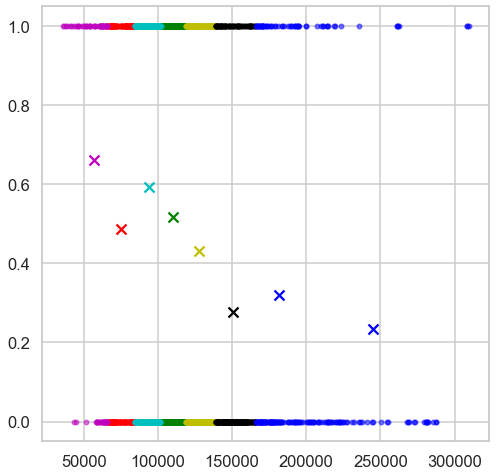

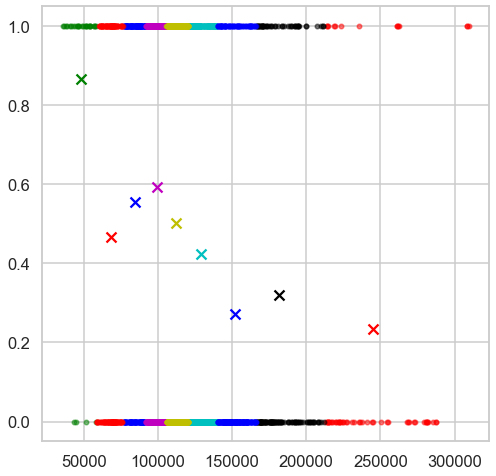

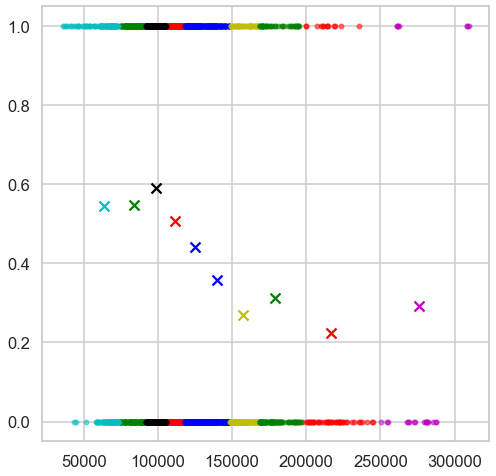

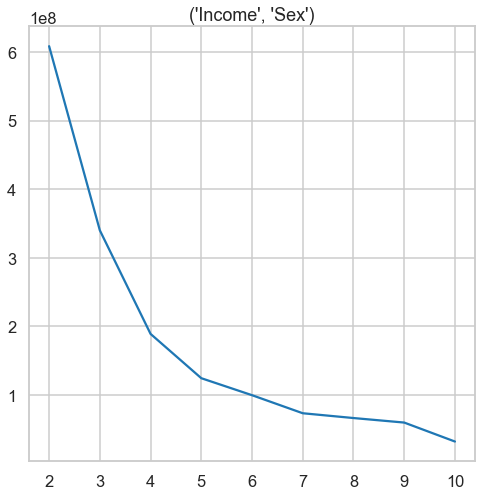

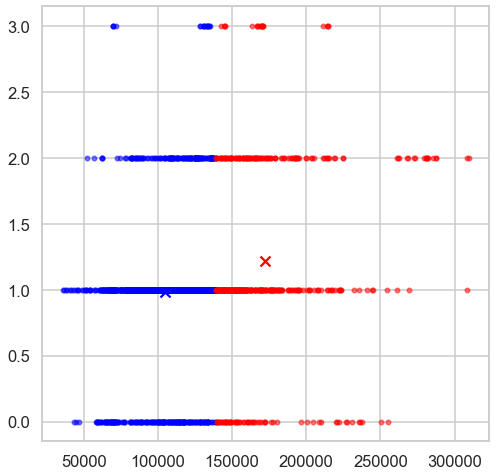

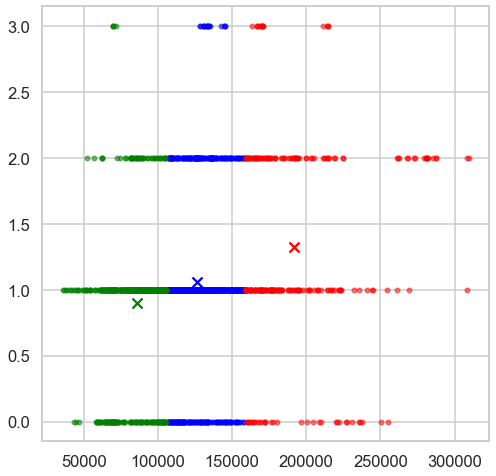

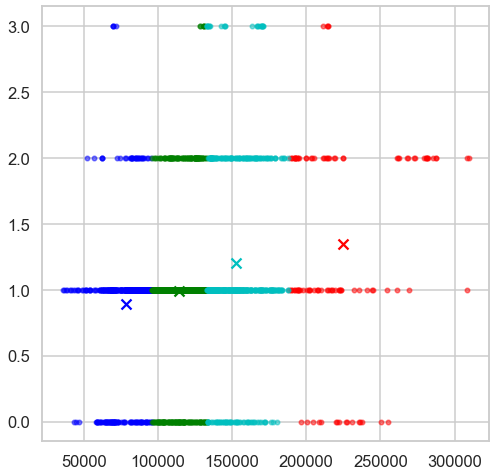

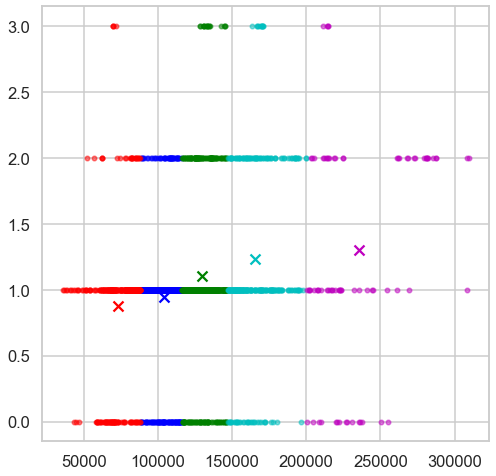

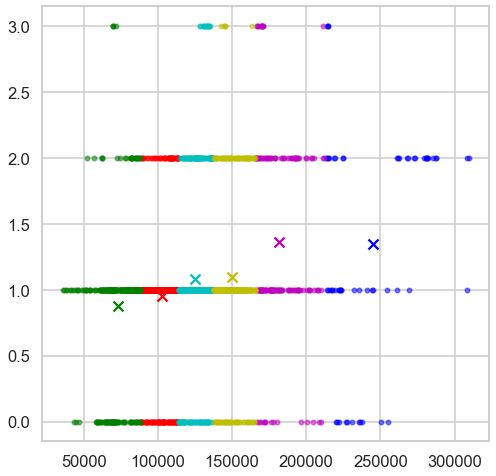

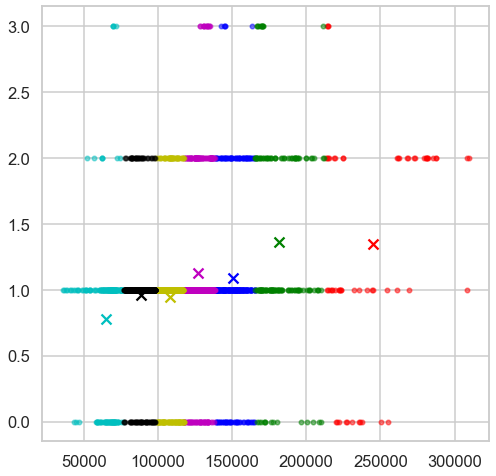

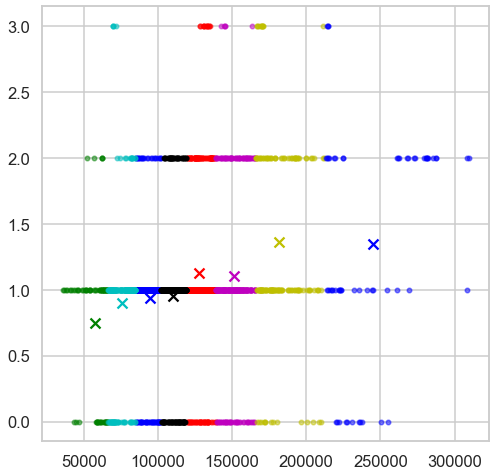

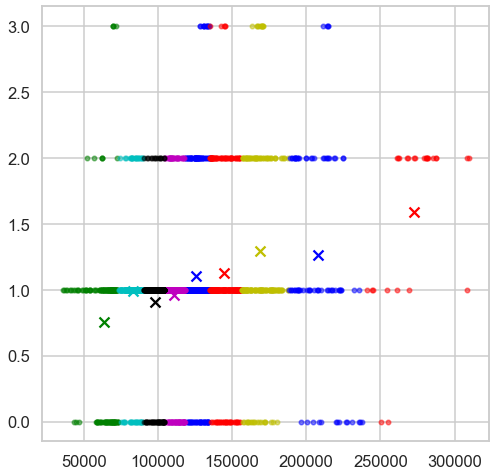

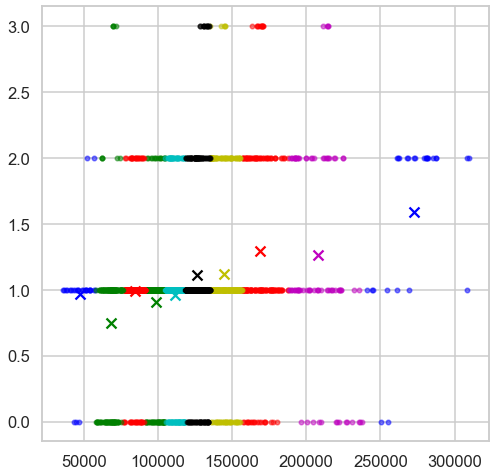

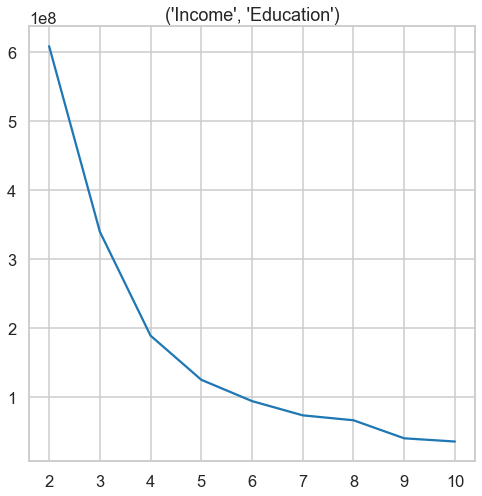

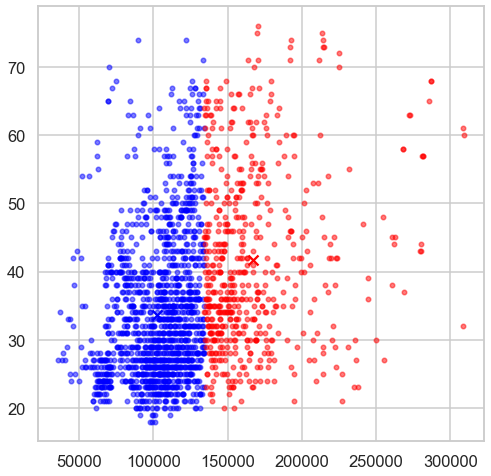

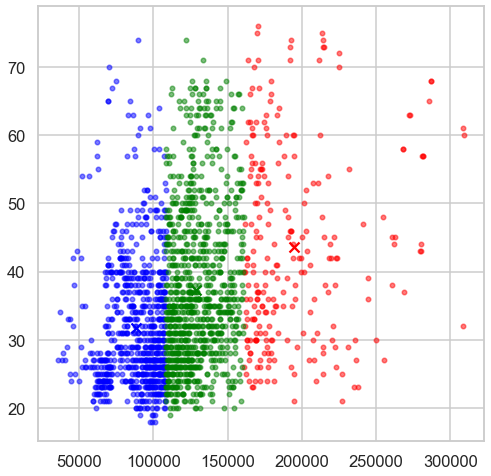

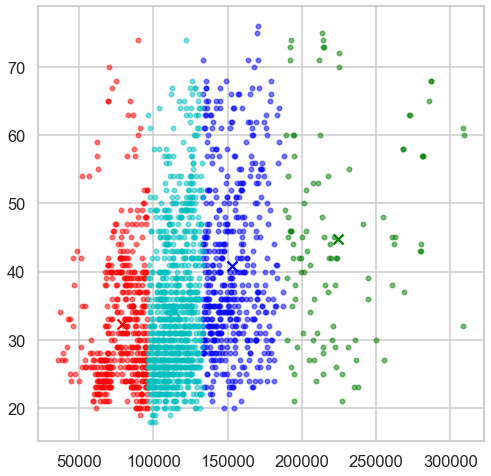

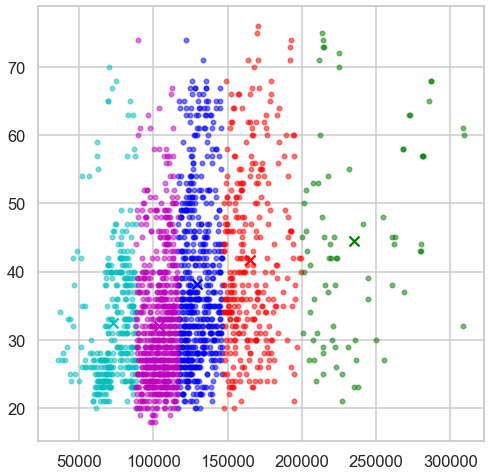

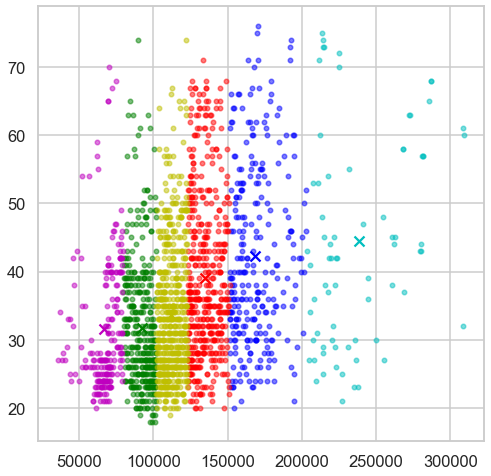

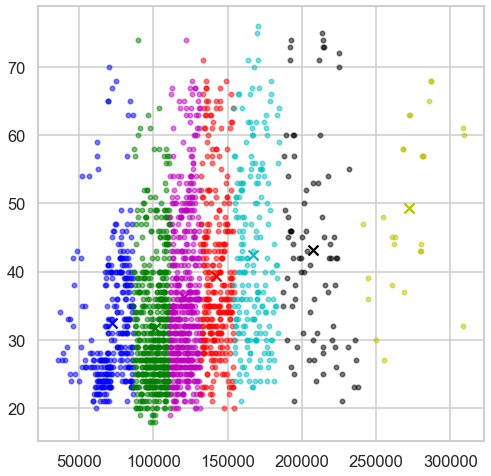

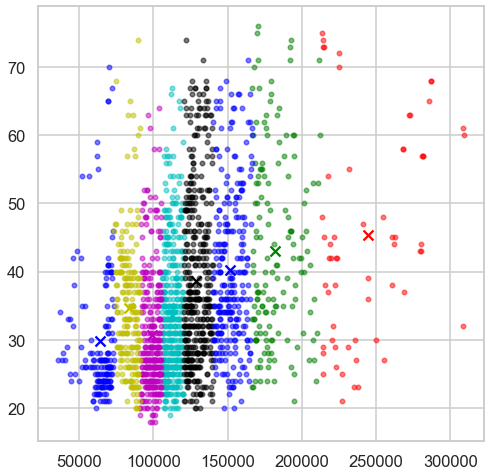

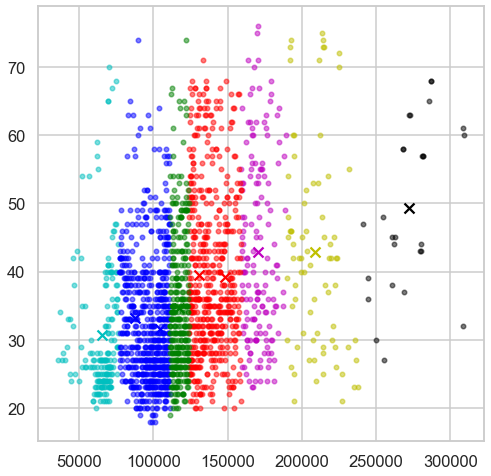

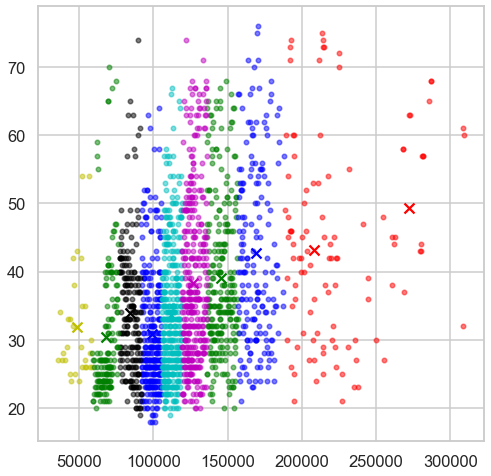

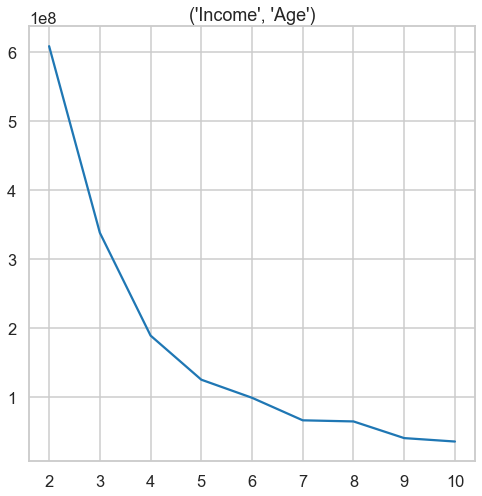

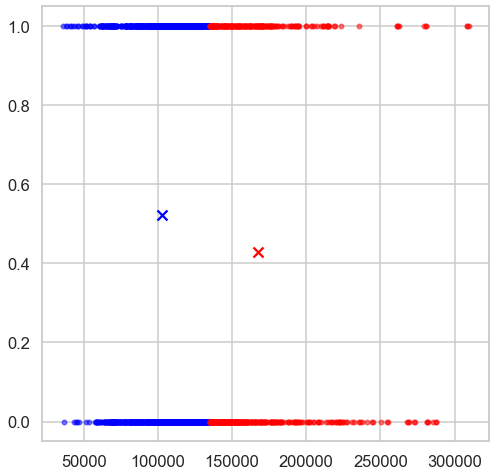

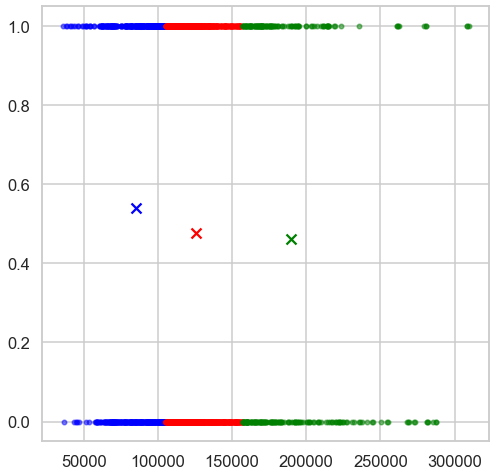

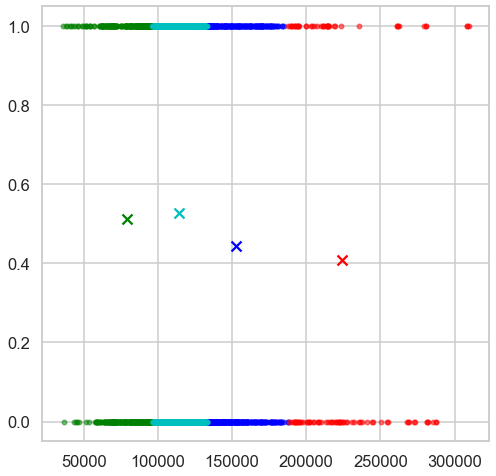

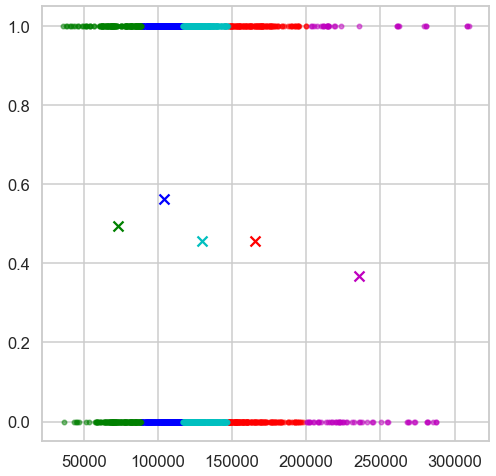

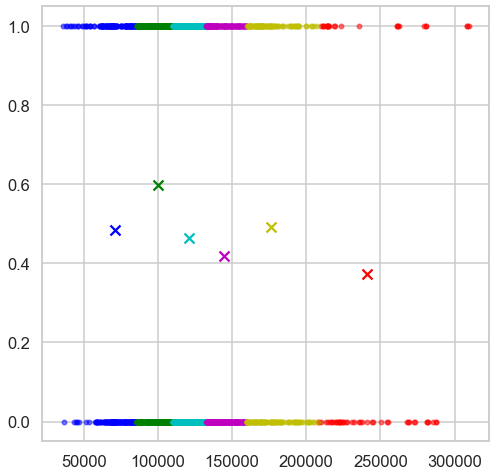

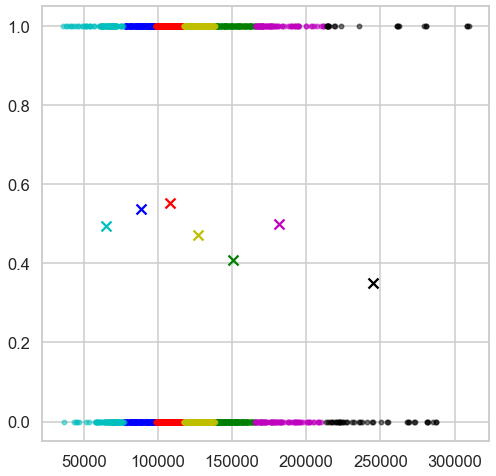

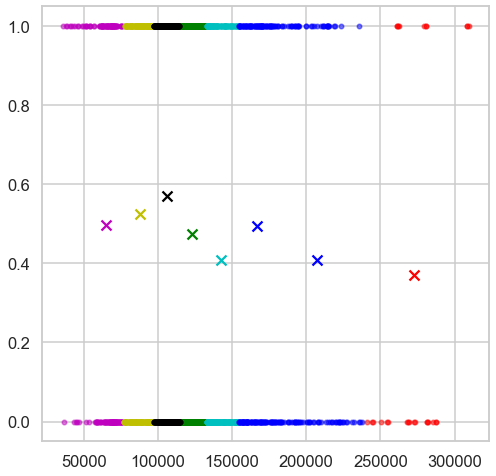

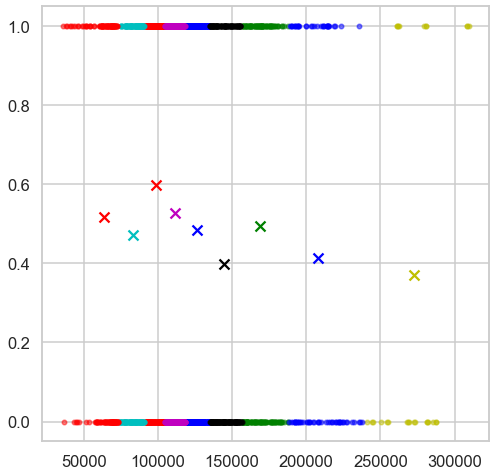

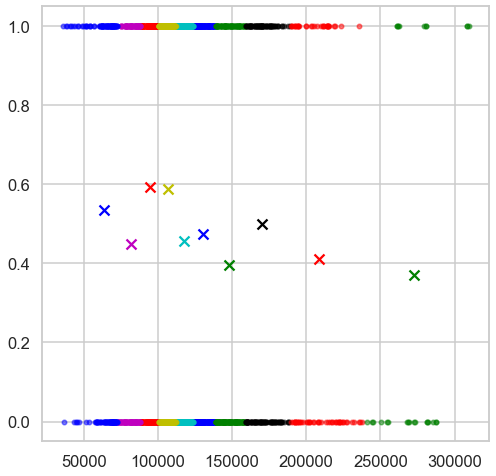

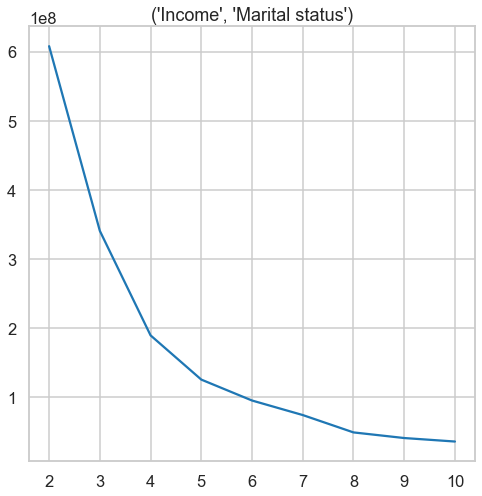

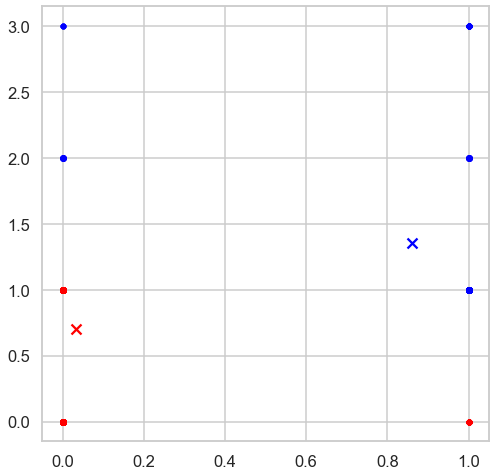

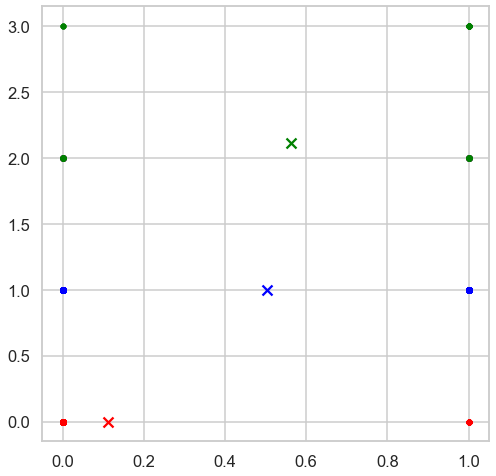

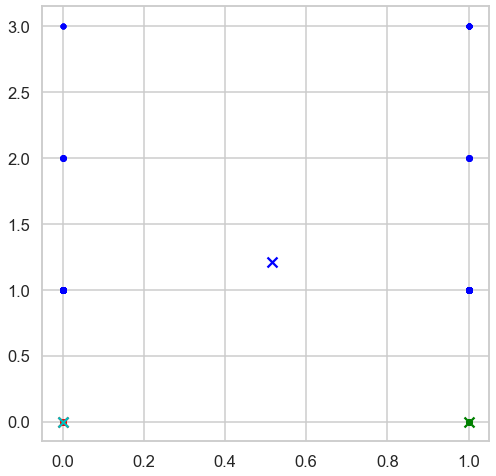

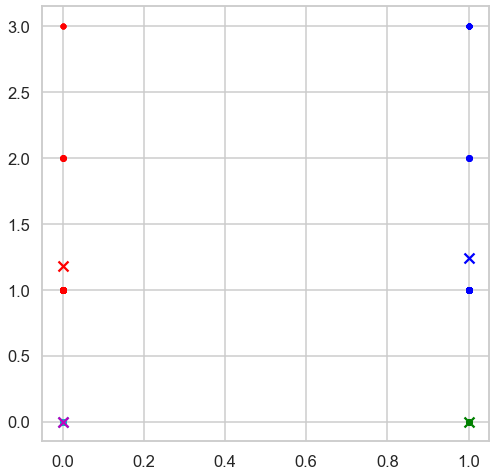

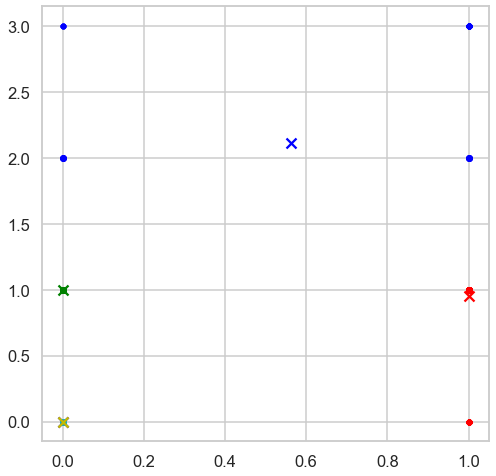

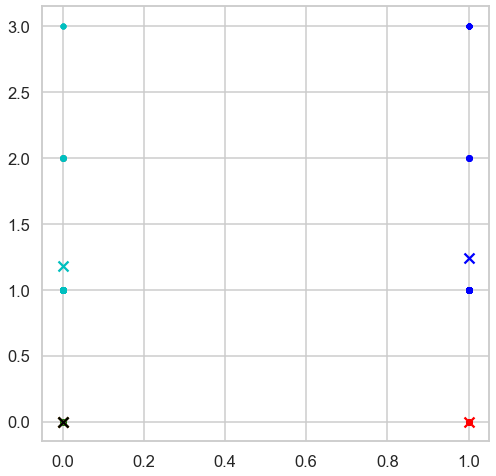

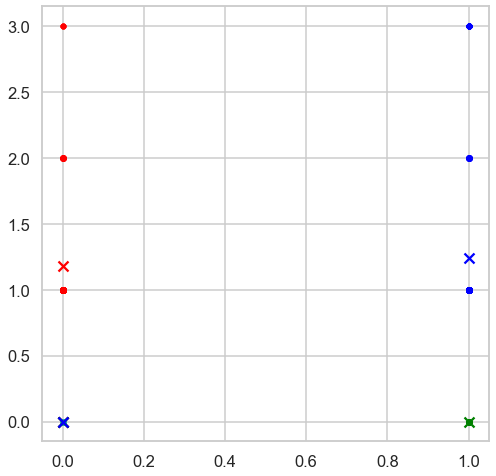

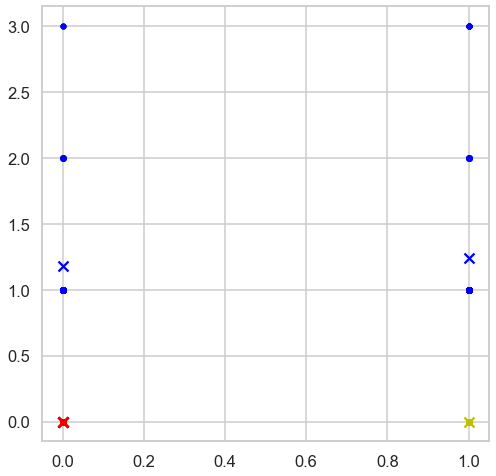

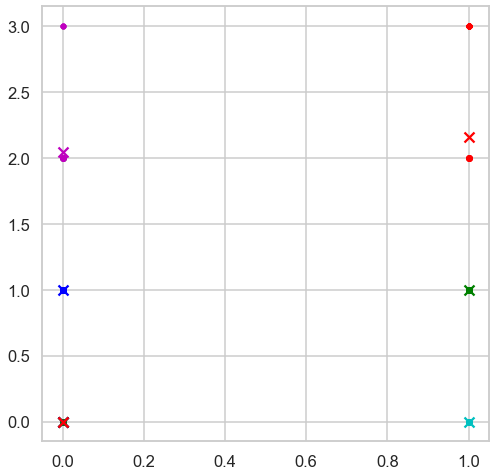

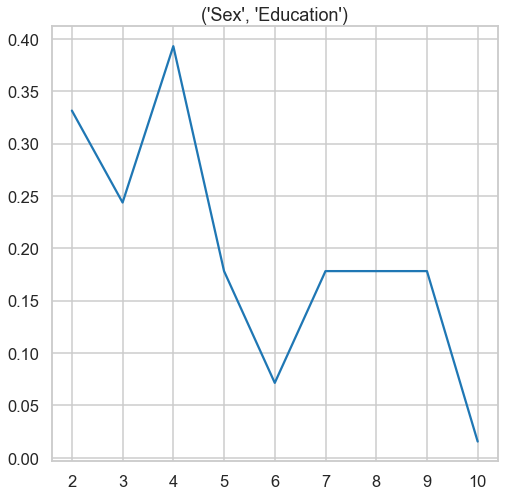

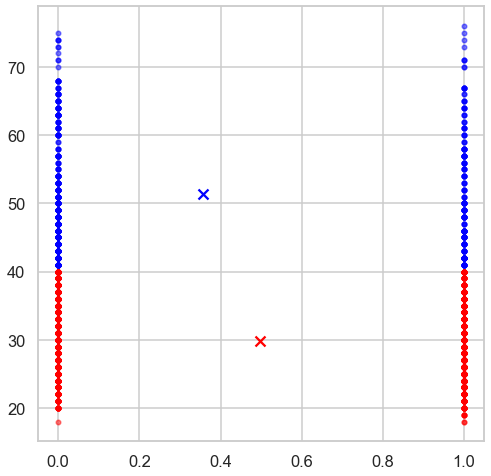

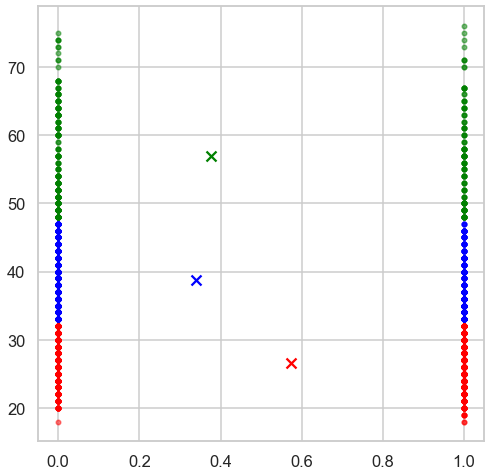

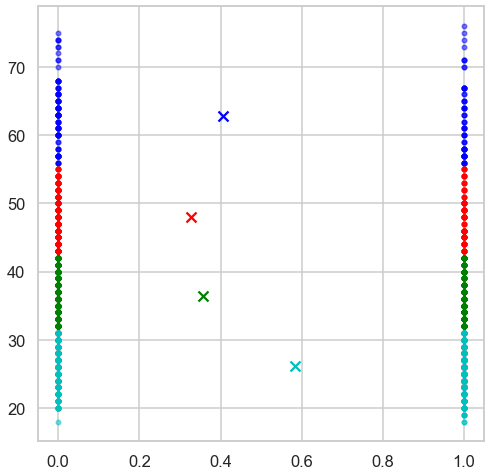

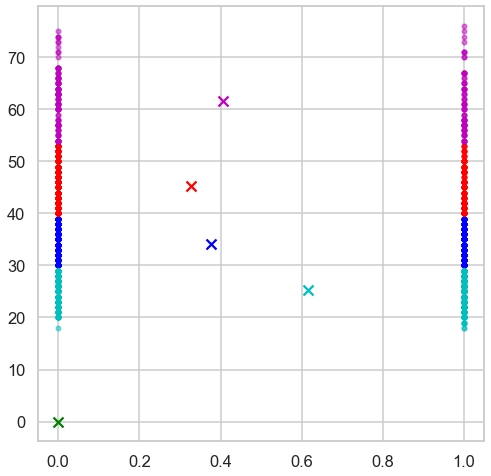

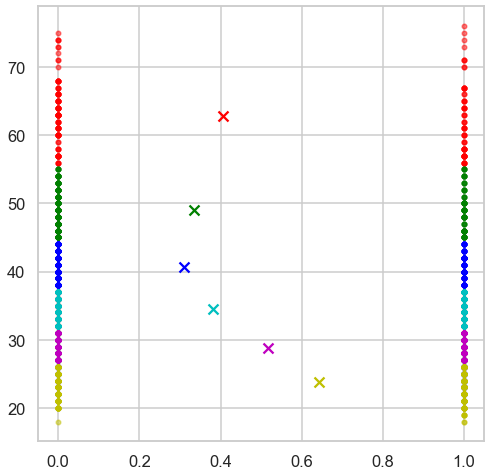

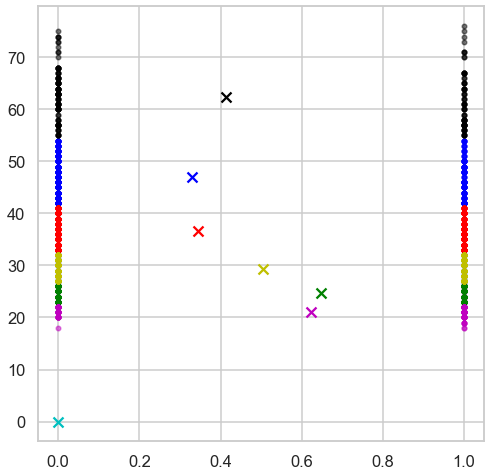

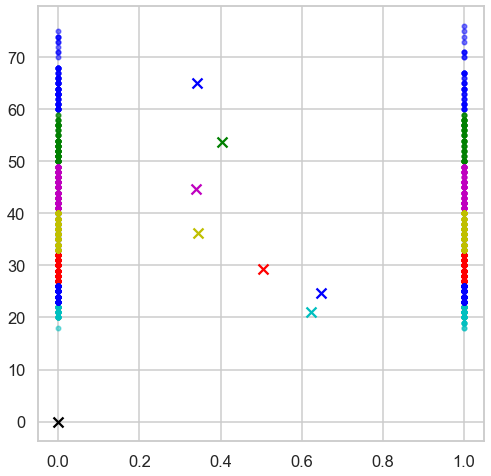

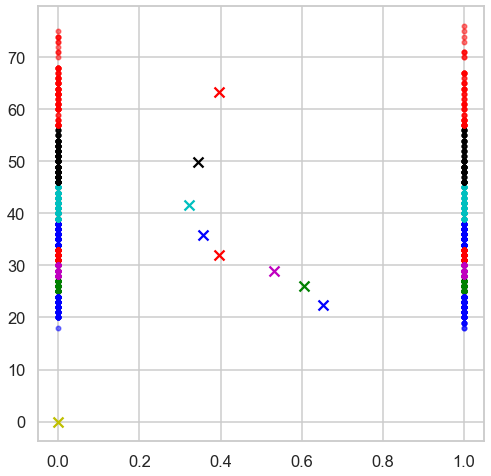

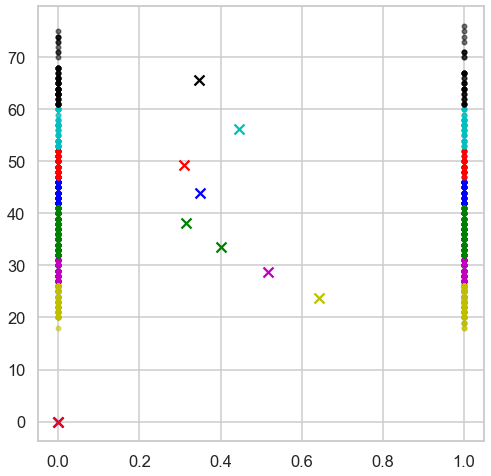

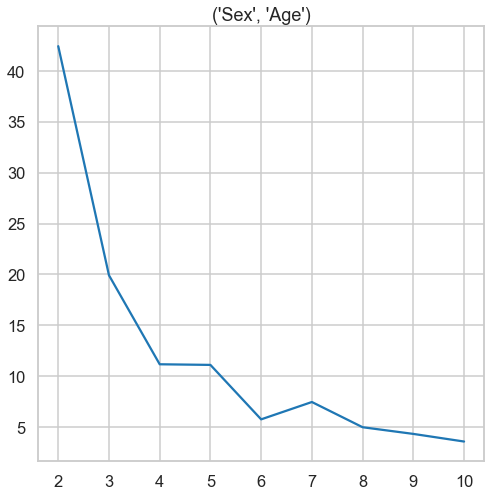

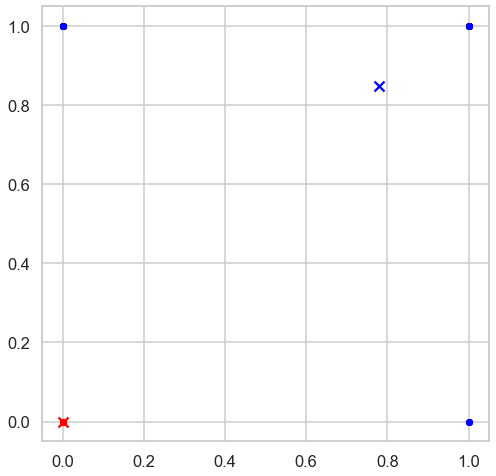

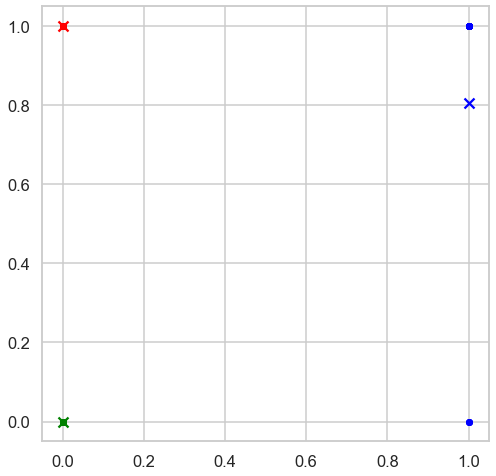

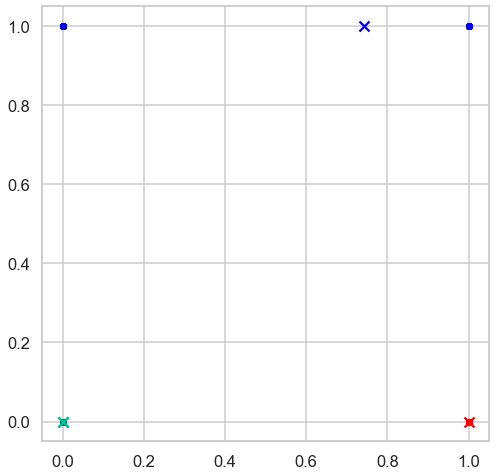

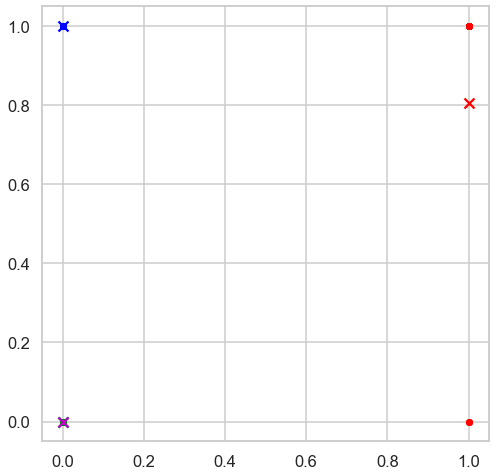

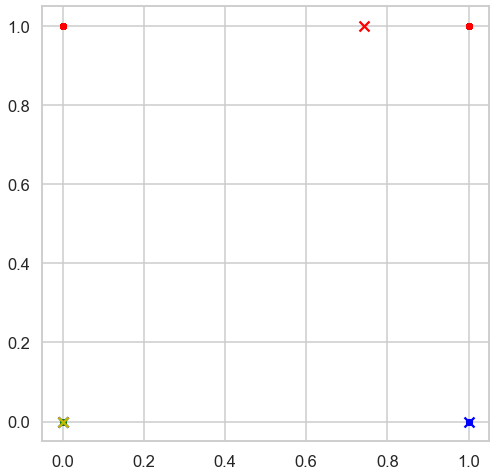

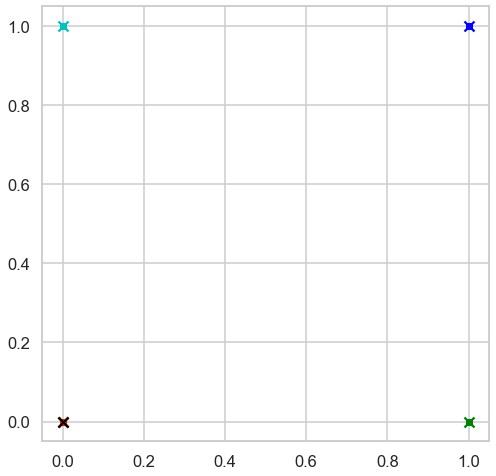

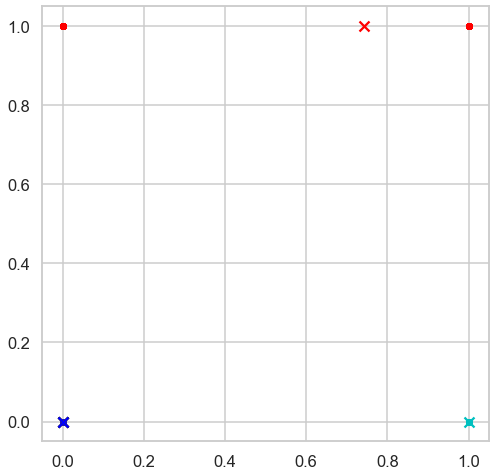

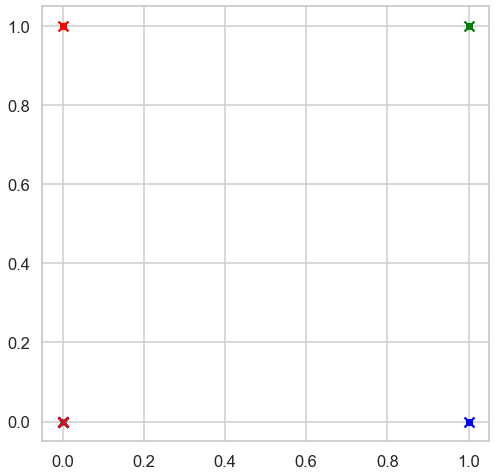

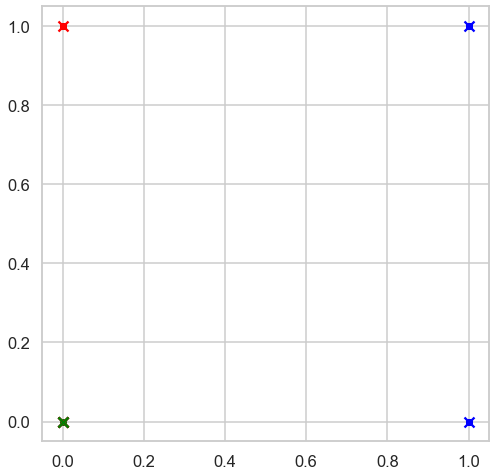

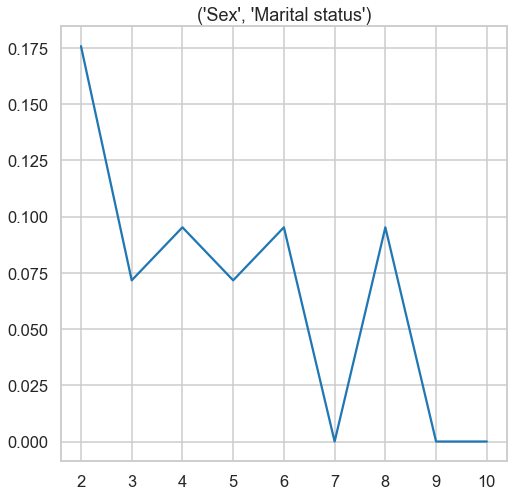

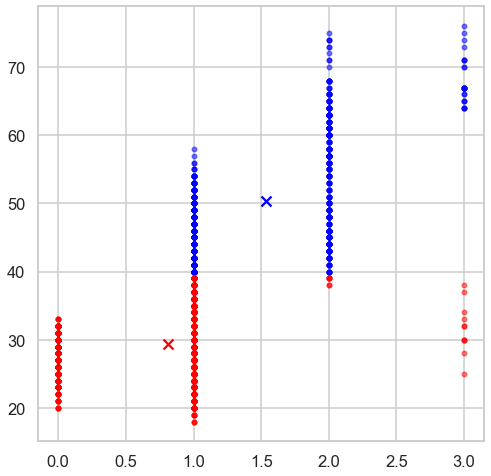

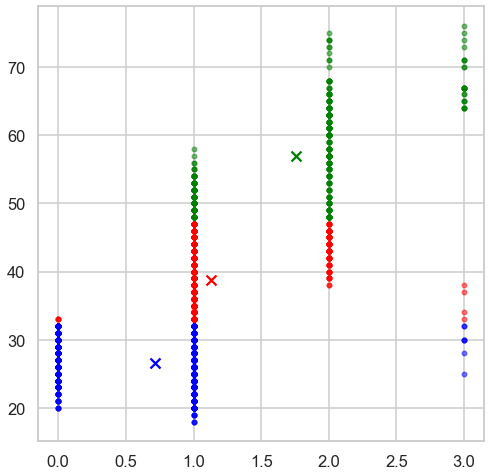

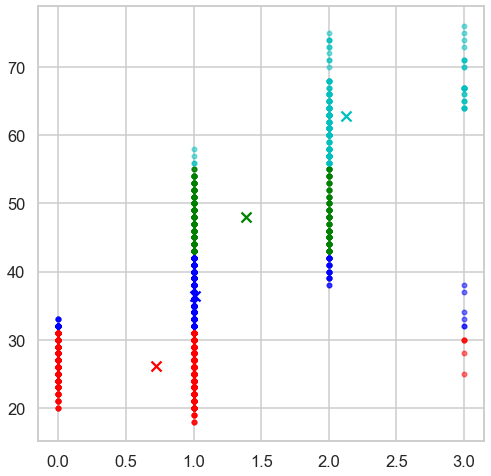

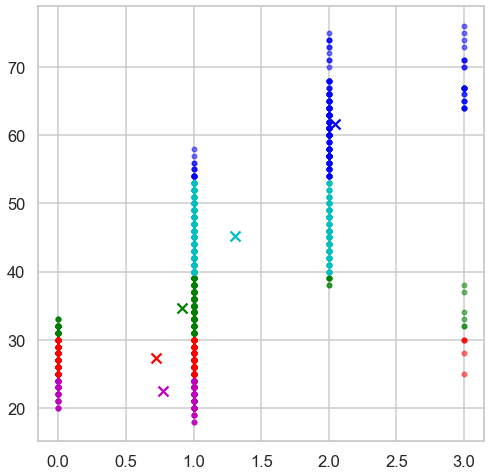

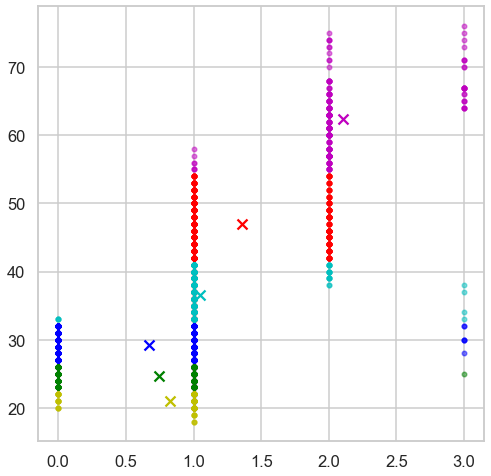

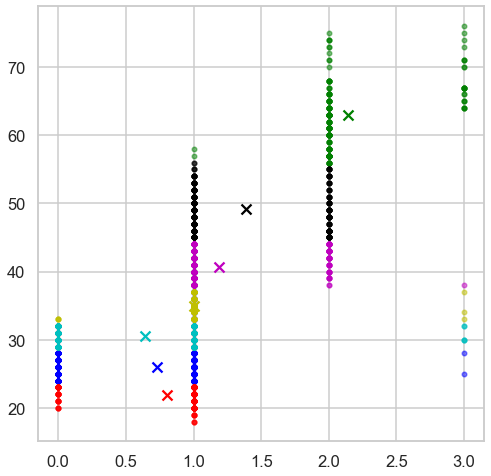

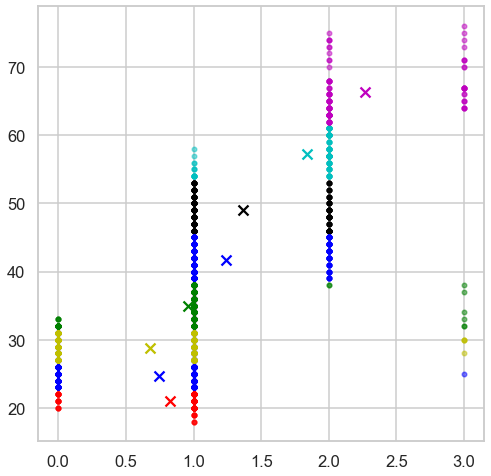

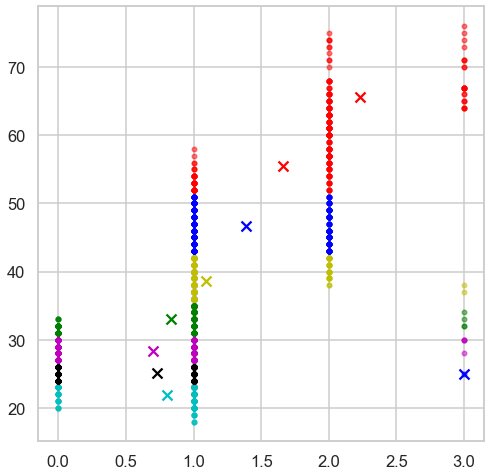

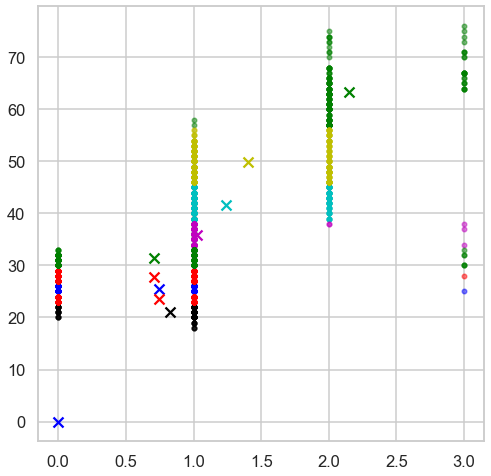

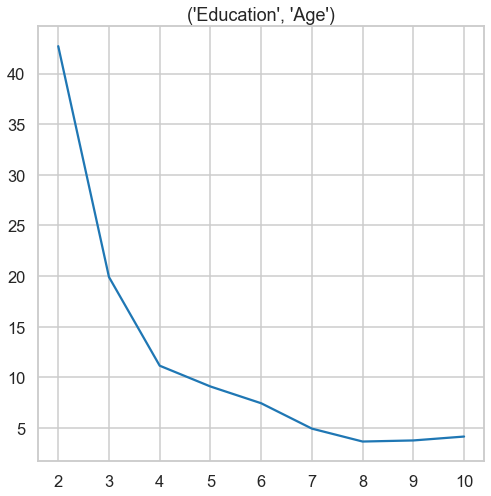

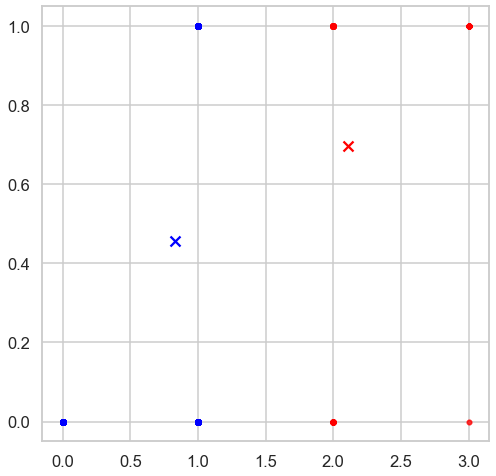

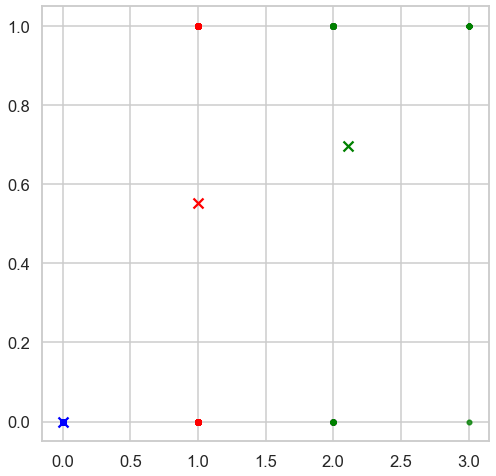

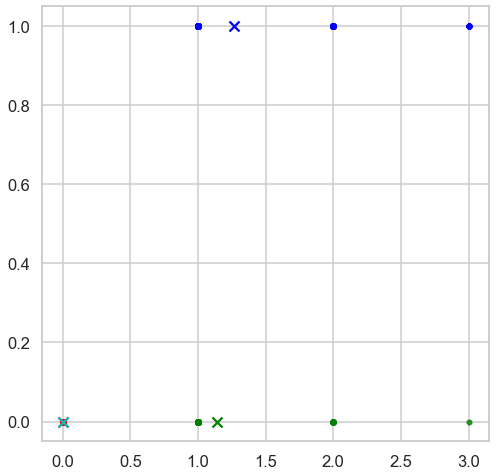

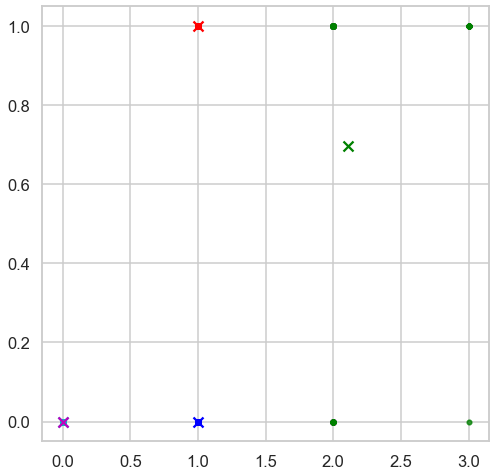

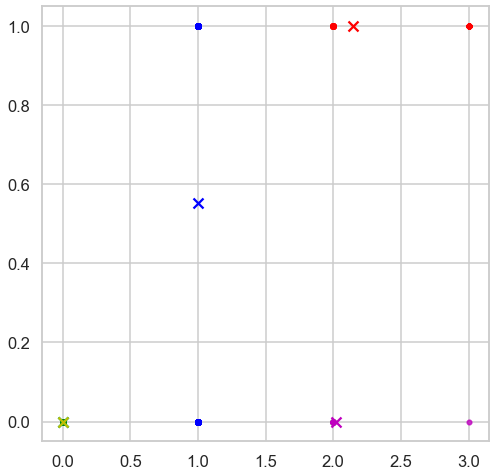

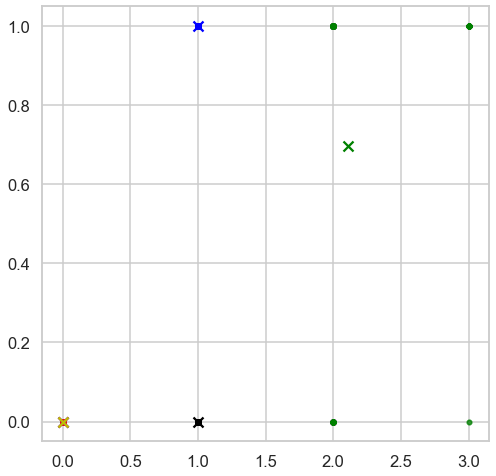

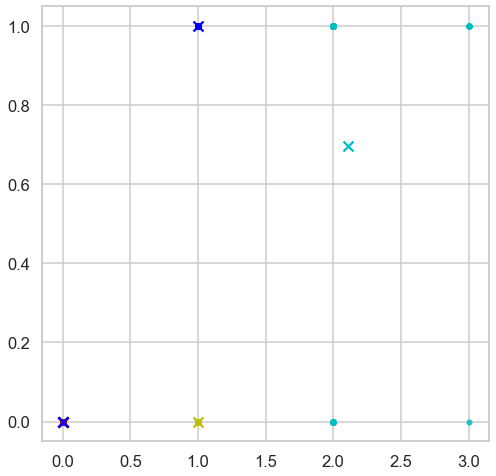

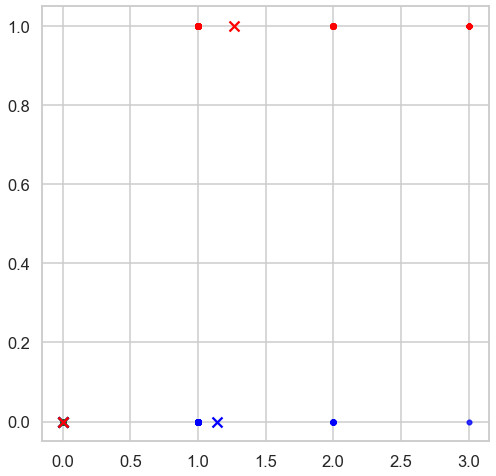

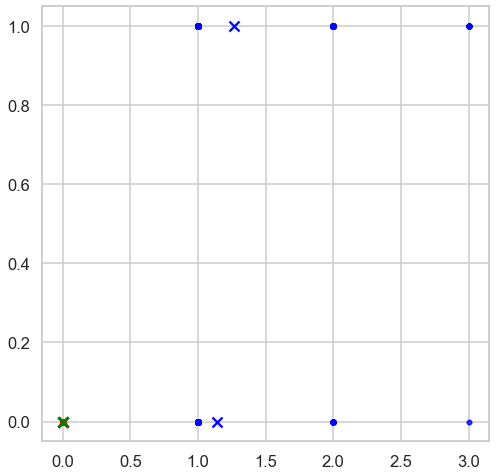

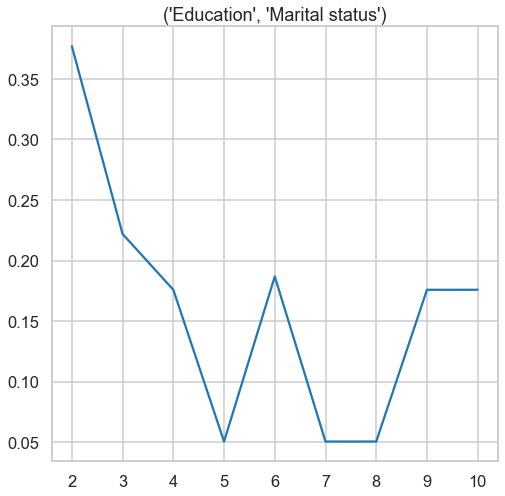

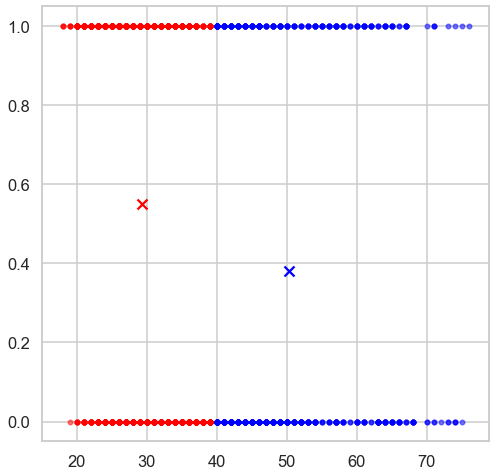

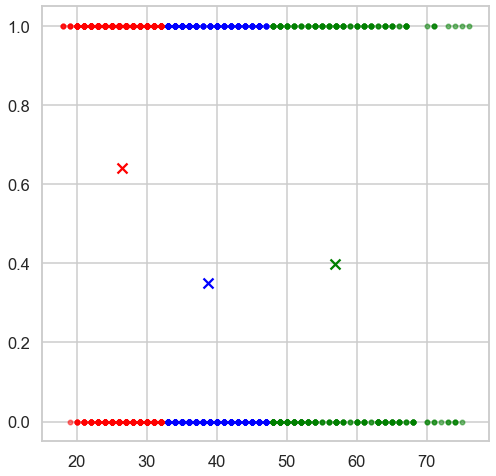

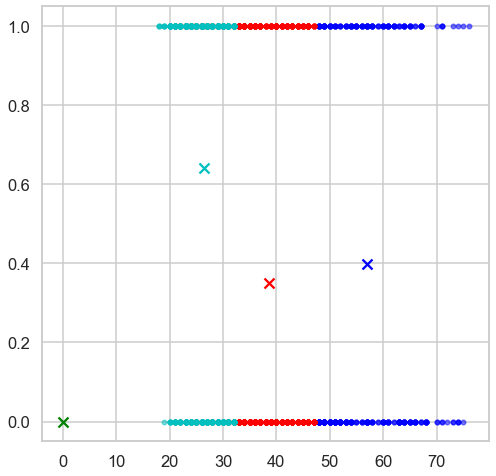

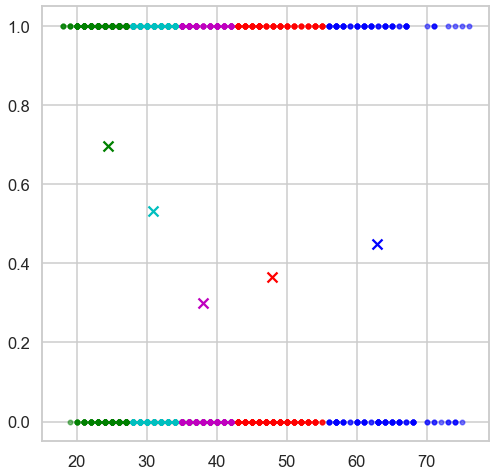

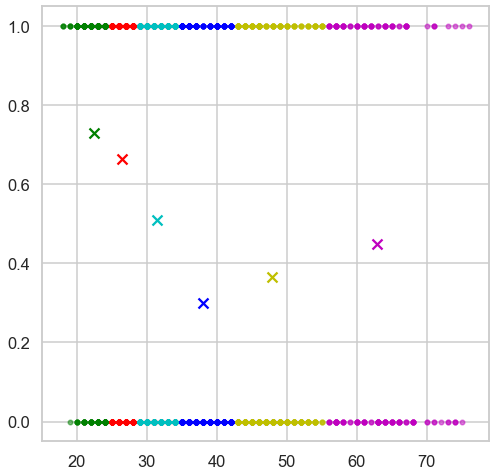

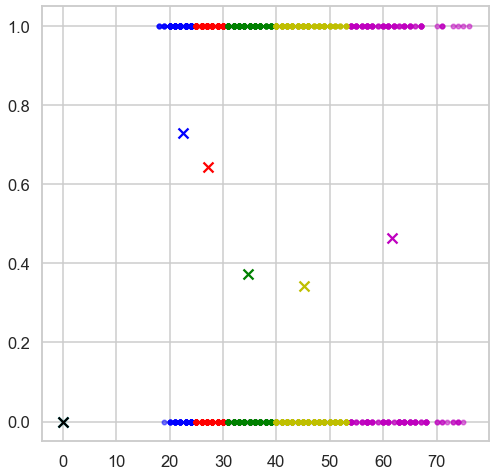

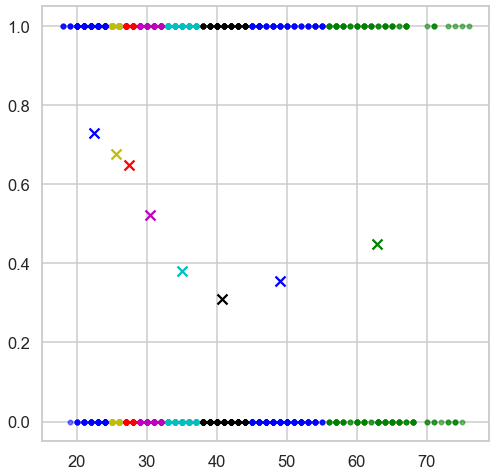

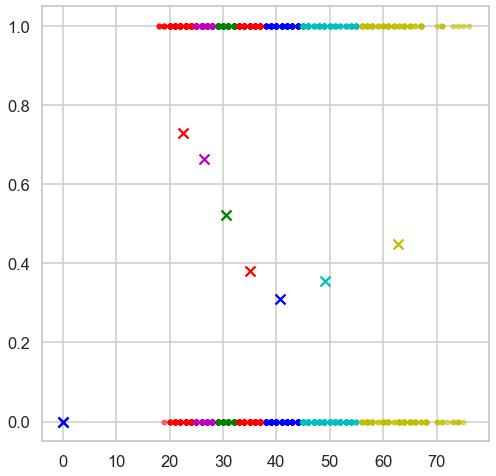

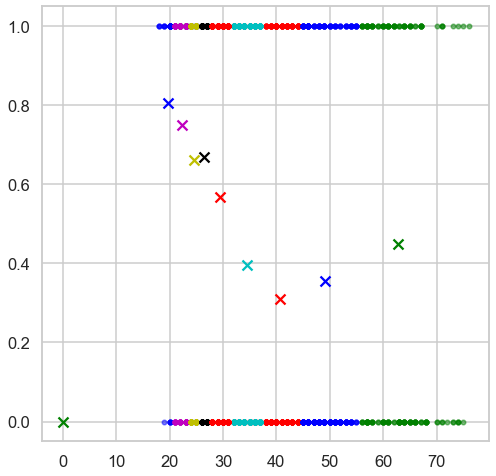

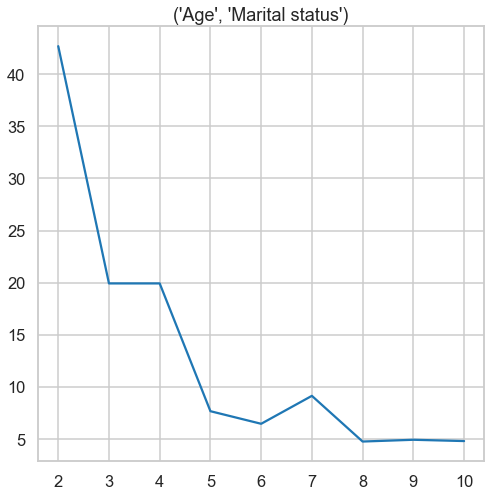

In [34]:
# now we need to loop over all the combination and
# find Kmean
for i in range(0,len(list_combinations)):
    sub_data = data[[list_combinations[i][0], list_combinations[i][1]]]
    metric_list=[]
    for num_clusters in range(2, 11):
        (Cluster_Centroids, output, dist_func) = GUC_Kmean(np.array(sub_data), num_clusters, 'Ecluidian')
        metric_list.append(dist_func)
        plt.figure() 
        My_display_cluster(np.array(sub_data), output, num_clusters)
#     print(metric_list)
    plt.figure() 
    plt.plot(range(2, 11),metric_list)
    plt.title(list_combinations[i])

========== ABDELMAKSOUD ==========

# Start of assig # 2

### First for data from csv file

In [18]:
# lets change the kmeans method in order to return
# the initial random centroids

def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    # write code for intial cluster heads here
    # write your your loop
    Cluster_Centroids = Data_points[
        np.random.choice([i for i in range(Data_points.shape[0])], Number_of_Clusters, replace=False)]
    old_mean = 1
    new_mean = .1
    rand_Cent = Cluster_Centroids
    while new_mean / old_mean < 0.999 or new_mean / old_mean > 1:
        Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        clusters_min_num = np.argmin(Cluster_Distance, axis=1) # to return the index of the minimum value
        new_clusters = np.zeros((Number_of_Clusters, Data_points.shape[1])) # matrix for the new clusters
        npoints = np.zeros((Number_of_Clusters, 1)) # to count points
        # The enumerate() function assigns an index to each item
        for index, p in enumerate(clusters_min_num):
            npoints[p] = npoints[p] + 1 # calculate number of points in each cluster
            new_clusters[p] = new_clusters[p] + Data_points[index] # sum all distances for each cluster
        # get the mean
        new_clusters = new_clusters / (npoints + pow(10, -11)) # get the new cluster centroids
        diff = 0
        for index, p in enumerate(clusters_min_num):
            diff = diff + np.sum(np.square(new_clusters[p] - Data_points[index])) # sum diff to find distortion function
        old_mean = new_mean # swap the means
        new_mean = np.sqrt(diff) / len(Data_points) # calculate the new mean
        Cluster_Centroids = new_clusters # assign the new cnetroids
        dist_func=diff/len(Data_points) # dist function
    output = {'cluster_centers_': Cluster_Centroids, 'labels_': clusters_min_num}
        

    return [Cluster_Centroids, output, dist_func, rand_Cent]

In [96]:
# loop for 30 times to get the best
# random centroids for k from 2 to 4 and
# part of the combination for reducing the time 
for i in range(0,len(list_combinations)-15):
    sub_data = data[[list_combinations[i][0], list_combinations[i][1]]]
    
    for num_clusters in range(2, 5):
        rand_Cent_list = []
        metric_list=[]
        for j in range(0, 30):
            (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(np.array(sub_data), num_clusters, 'Ecluidian')
            metric_list.append(dist_func) 
            rand_Cent_list.append(rand_Cent) # push the random centroids
        idx_min_dist_func_val=np.argmin(metric_list) # find the index of the min value
        print(f'idx of min distortion value {idx_min_dist_func_val}')
        print(f'best random centroid is {rand_Cent_list[idx_min_dist_func_val]} for k = {num_clusters} and combinations = {list_combinations[i]} ') # print the centroid
#         mini = min(metric_list)
#         maxi = max(metric_list)
#         plt.figure() 
#         plt.plot(range(0, 11),metric_list)
#         plt.vlines(idx_min_dist_func_val,mini,maxi,colors="red")
#         plt.title(list_combinations[i])

idx of min distortion value 0
best random centroid is [[1 2]
 [1 0]] for k = 2 and combinations = ('Occupation', 'Settlement size') 
idx of min distortion value 6
best random centroid is [[2 1]
 [1 2]
 [1 2]] for k = 3 and combinations = ('Occupation', 'Settlement size') 
idx of min distortion value 3
best random centroid is [[1 1]
 [1 2]
 [1 0]
 [0 0]] for k = 4 and combinations = ('Occupation', 'Settlement size') 
idx of min distortion value 20
best random centroid is [[1.         0.51353659]
 [1.         0.55392363]] for k = 2 and combinations = ('Occupation', 'Income') 
idx of min distortion value 6
best random centroid is [[ 2.          0.85647999]
 [ 0.          0.15891262]
 [ 0.         -0.07450073]] for k = 3 and combinations = ('Occupation', 'Income') 
idx of min distortion value 1
best random centroid is [[ 1.          0.26747754]
 [ 2.          0.70393972]
 [ 1.          0.72512312]
 [ 1.         -0.3239996 ]] for k = 4 and combinations = ('Occupation', 'Income') 
idx of min

In [21]:
# loop for 100 times to get the best
# random centroids for k=2
# And multiple combinations
for i in range(0,len(list_combinations)-15):
    sub_data = data[[list_combinations[i][0], list_combinations[i][1]]]
    
    for num_clusters in range(2, 3):
        rand_Cent_list = []
        metric_list=[]
        for j in range(0, 100):
            (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(np.array(sub_data), num_clusters, 'Ecluidian')
            metric_list.append(dist_func) 
            rand_Cent_list.append(rand_Cent) # push the random centroids
        idx_min_dist_func_val=np.argmin(metric_list) # find the index of the min value
        print(f'idx of min distortion value {idx_min_dist_func_val}')
        print(f'best random centroid is {rand_Cent_list[idx_min_dist_func_val]} for k = {num_clusters} and combinations = {list_combinations[i]} ') # print the centroid


idx of min distortion value 26
best random centroid is [[25  0]
 [57  1]] for k = 2 and combinations = ('Age', 'Marital status') 
idx of min distortion value 25
best random centroid is [[43  2]
 [39  1]] for k = 2 and combinations = ('Age', 'Education') 
idx of min distortion value 17
best random centroid is [[28  1]
 [52  0]] for k = 2 and combinations = ('Age', 'Occupation') 
idx of min distortion value 6
best random centroid is [[50  0]
 [32  1]] for k = 2 and combinations = ('Age', 'Settlement size') 
idx of min distortion value 22
best random centroid is [[24  0]
 [58  1]] for k = 2 and combinations = ('Age', 'Sex') 
idx of min distortion value 4
best random centroid is [[42.          1.17103863]
 [42.          1.94351506]] for k = 2 and combinations = ('Age', 'Income') 


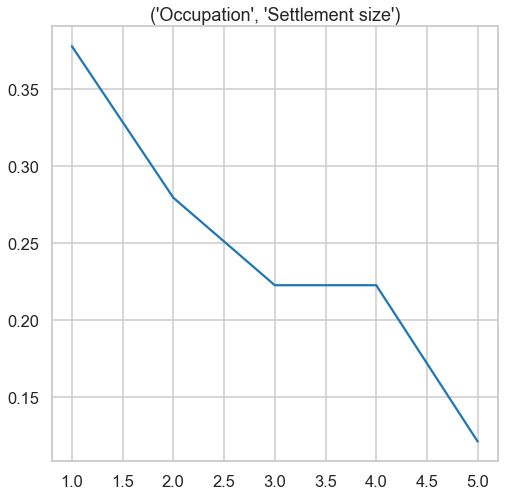

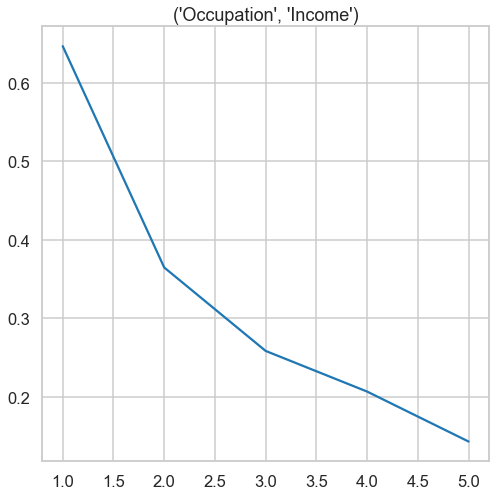

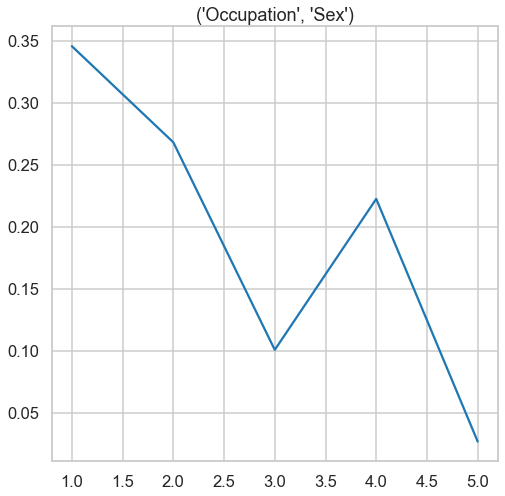

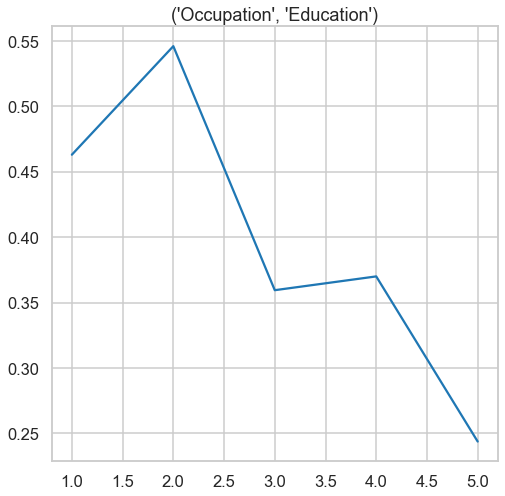

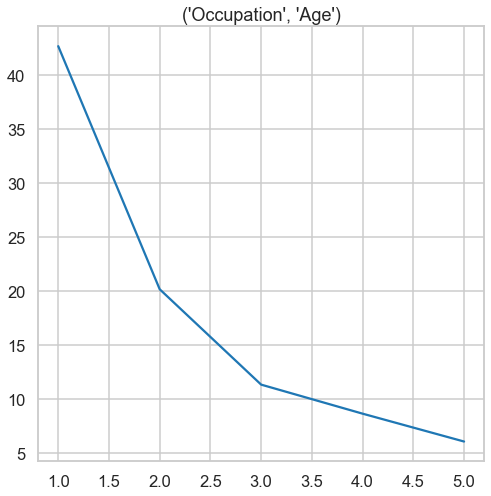

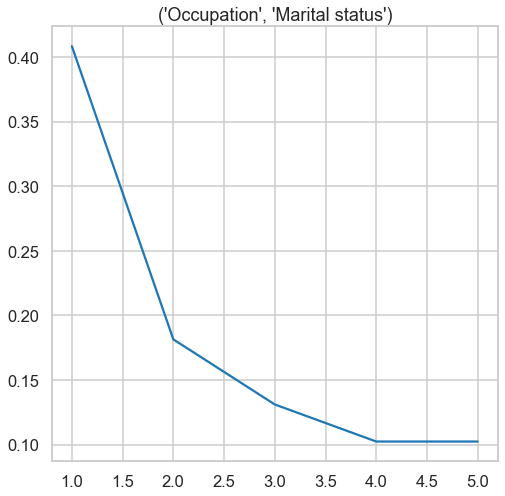

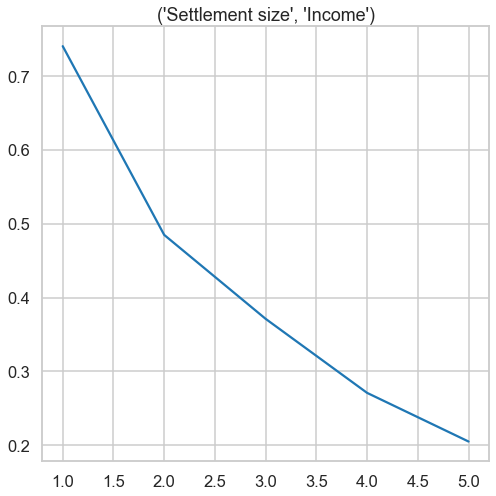

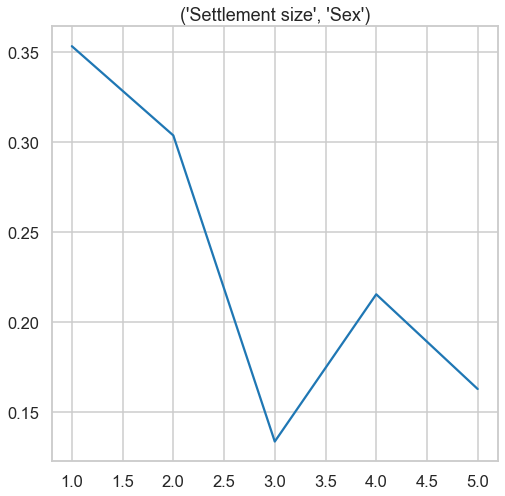

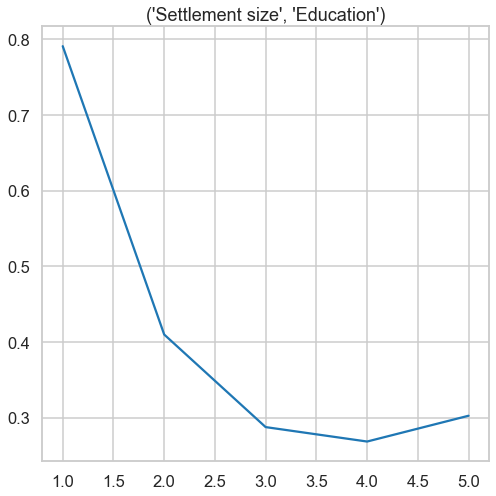

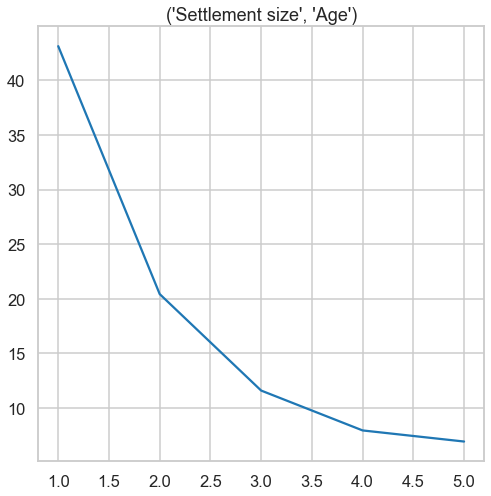

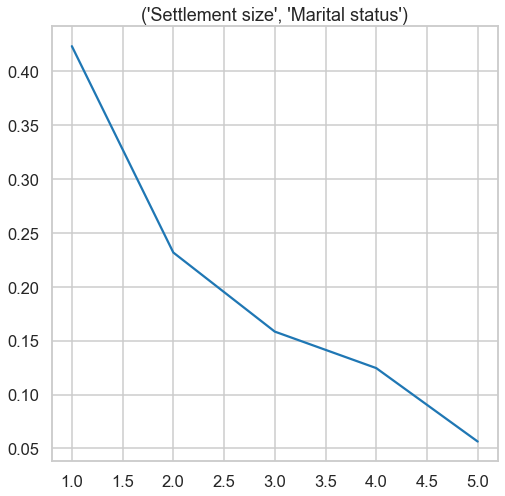

In [95]:
# this method without using the knee method
# by inspection (find the point of inflection that the function is stabled after it)
# for k from 2 to 7 and
# part of the combination for reducing the time 
for i in range(0,len(list_combinations)-10):
    sub_data = data[[list_combinations[i][0], list_combinations[i][1]]]
    metric_list=[]
    for num_clusters in range(2, 7):
        (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(np.array(sub_data), num_clusters, 'Ecluidian')
        metric_list.append(dist_func)
    plt.figure() 
    plt.plot(range(1, len(metric_list)+1),metric_list)
    plt.title(list_combinations[i])

kn.knee : 3
kn.knee : 2
kn.knee : 3
kn.knee : 3
kn.knee : 2
kn.knee : 3
kn.knee : 2
kn.knee : 3
kn.knee : 3
kn.knee : 2
kn.knee : 2


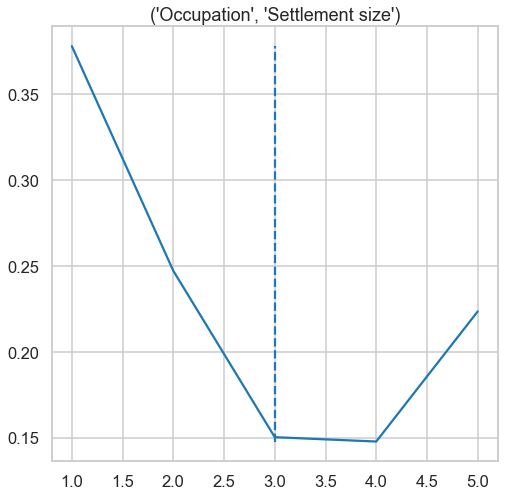

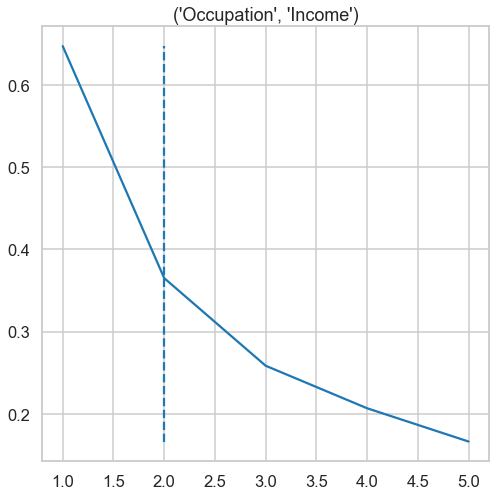

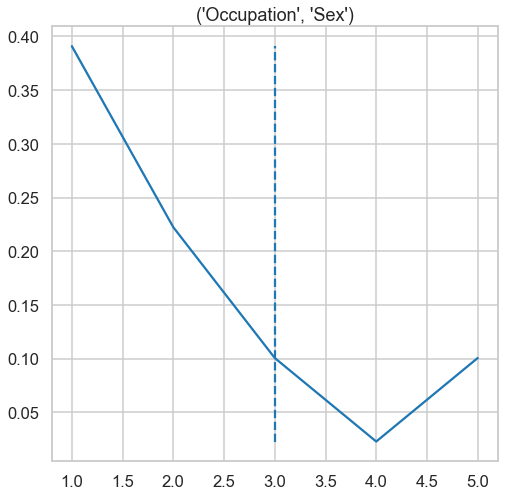

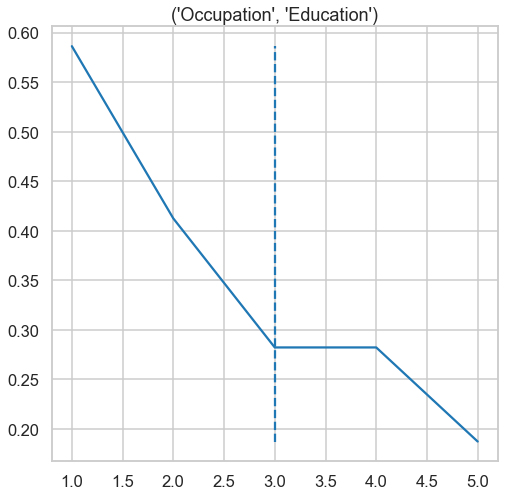

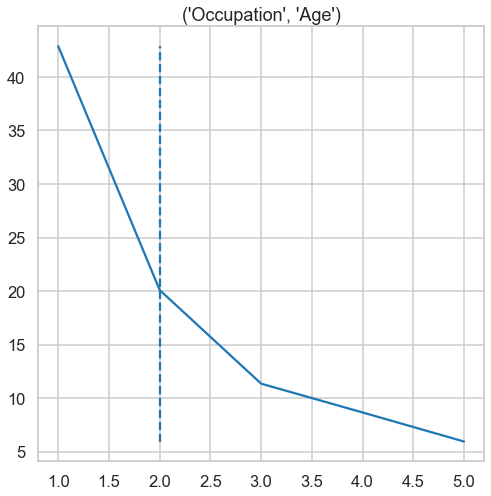

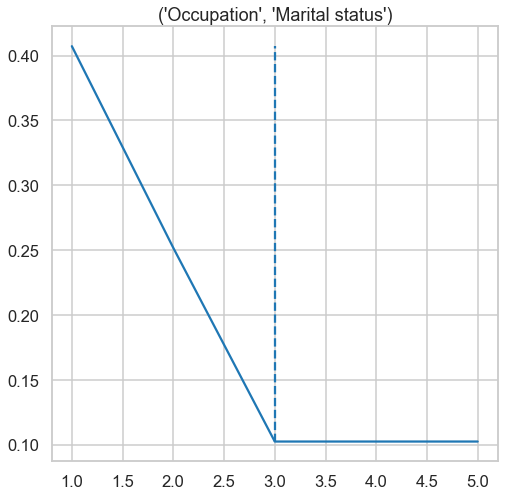

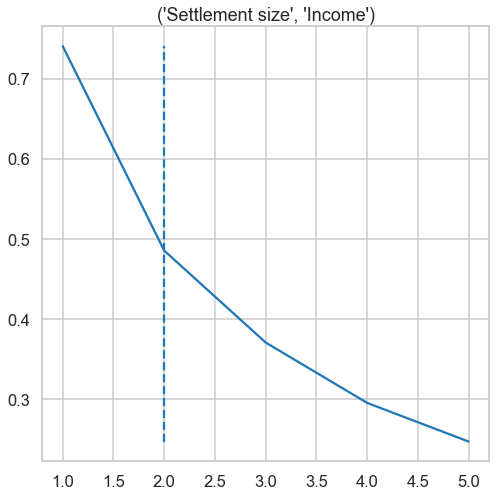

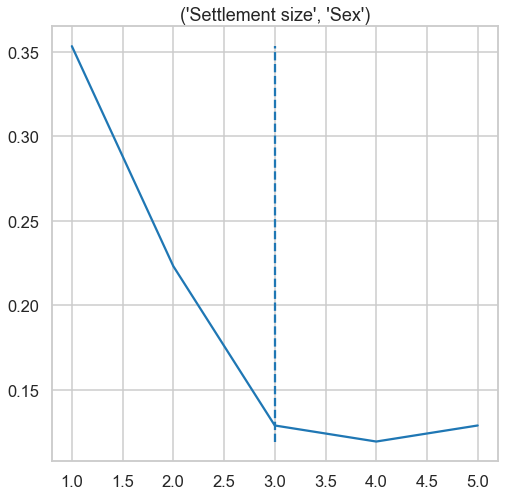

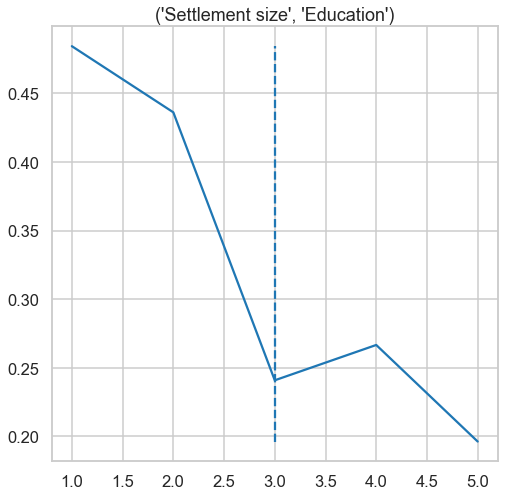

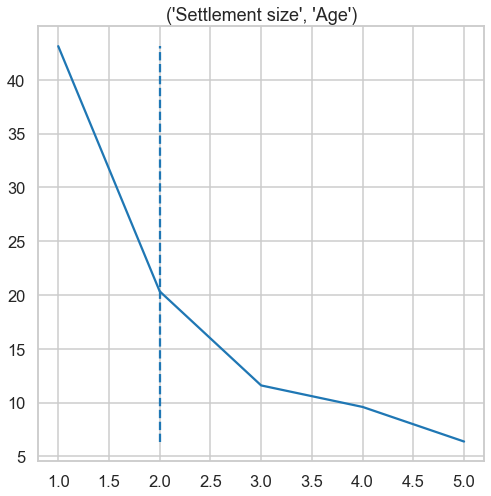

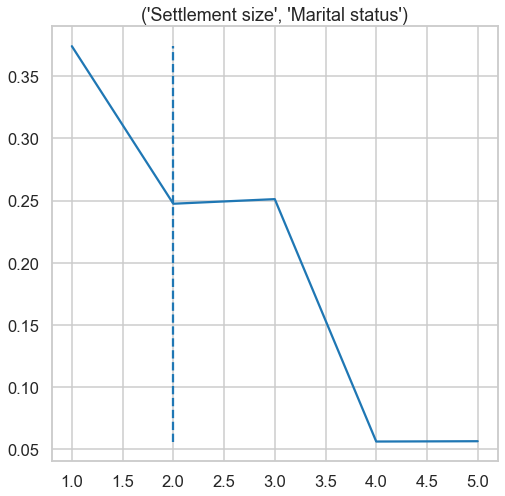

In [94]:
# using an implemented method for drawing elbow point
# called knee
# link https://github.com/arvkevi/kneed
# for k from 2 to 7 and
# part of the combination for reducing the time 
from elbow import KneeLocator
for i in range(0,len(list_combinations)-10):
    sub_data = data[[list_combinations[i][0], list_combinations[i][1]]]
    metric_list=[]
    for num_clusters in range(2, 7):
        (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(np.array(sub_data), num_clusters, 'Ecluidian')
        metric_list.append(dist_func)
    plt.figure() 
    plt.plot(range(1, len(metric_list)+1),metric_list)
    kn = KneeLocator(range(1, len(metric_list)+1), metric_list, curve='convex', direction='decreasing')
    mini = min(metric_list)
    maxi = max(metric_list)
    if str(type(kn.knee)) != "None":
        plt.vlines(kn.knee, np.round(mini, decimals=5), np.round(maxi, decimals=5), linestyles='dashed')
    else:
        print('No possible elbow')
    print(f'kn.knee : {kn.knee}')
    plt.title(list_combinations[i])

In [60]:
from elbow import KneeLocator

3


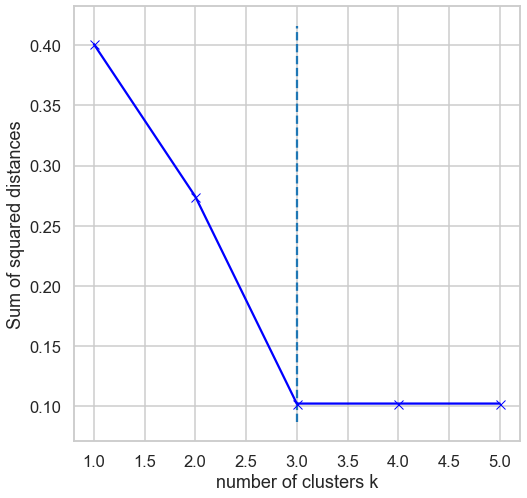

In [84]:
kn = KneeLocator(range(1, len(metric_list)+1), metric_list, curve='convex', direction='decreasing')
print(kn.knee)


import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(range(1, len(metric_list)+1), metric_list, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

### Second for data from examples (finding elbow)
#### Each example has two graphs one with the method and the other withoud

kn.knee : 5


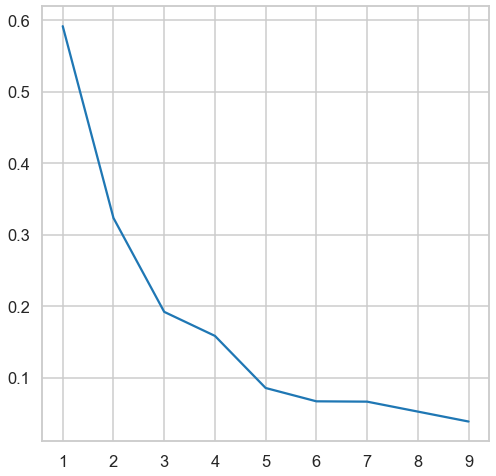

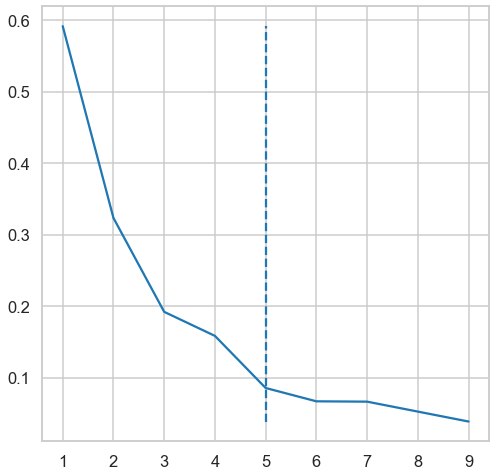

In [115]:
# Example 1
metric_list=[]
for num_clusters in range(2, 11):
    X=Example1()
    (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(X, num_clusters, 'Ecluidian')
    metric_list.append(dist_func)
plt.figure() 
plt.plot(range(1, len(metric_list)+1),metric_list)
plt.figure() 
plt.plot(range(1, len(metric_list)+1),metric_list)
kn = KneeLocator(range(1, len(metric_list)+1), metric_list, curve='convex', direction='decreasing')
mini = min(metric_list)
maxi = max(metric_list)
if str(type(kn.knee)) != "None":
        plt.vlines(kn.knee, np.round(mini, decimals=5), np.round(maxi, decimals=5), linestyles='dashed')
else:
        print('No possible elbow')
print(f'kn.knee : {kn.knee}')

kn.knee : 4


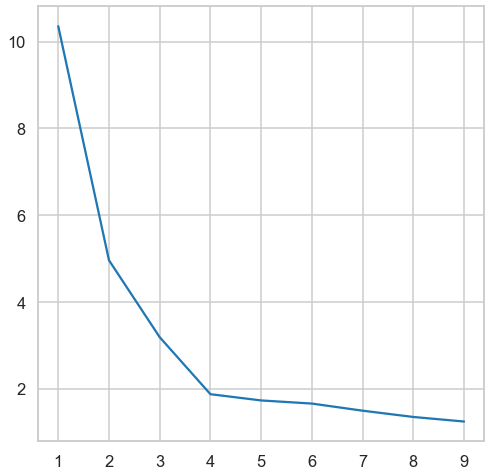

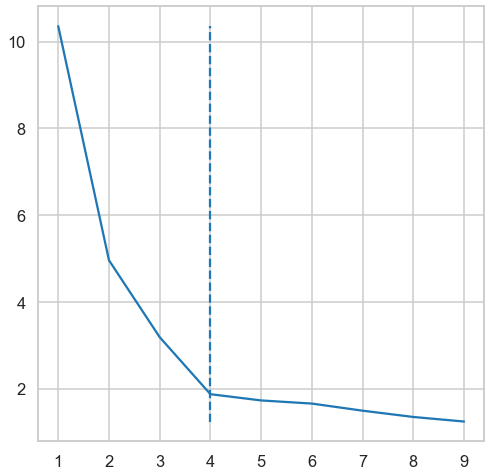

In [114]:
# Example 2
metric_list=[]
for num_clusters in range(2, 11):
    X=Example2()
    (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(X, num_clusters, 'Ecluidian')
    metric_list.append(dist_func)

plt.figure() 
plt.plot(range(1, len(metric_list)+1),metric_list)
plt.figure() 
plt.plot(range(1, len(metric_list)+1),metric_list)
kn = KneeLocator(range(1, len(metric_list)+1), metric_list, curve='convex', direction='decreasing')
mini = min(metric_list)
maxi = max(metric_list)
if str(type(kn.knee)) != "None":
        plt.vlines(kn.knee, np.round(mini, decimals=5), np.round(maxi, decimals=5), linestyles='dashed')
else:
        print('No possible elbow')
print(f'kn.knee : {kn.knee}')

kn.knee : 5


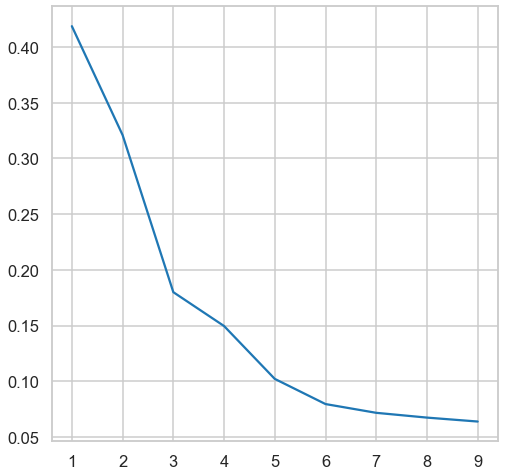

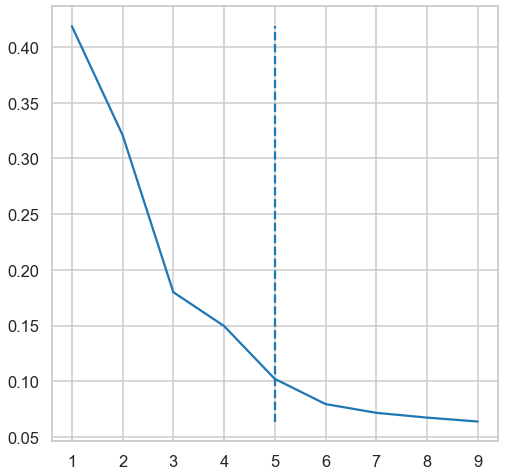

In [113]:
# Example 3
metric_list=[]
for num_clusters in range(2, 11):
    X=Example3()
    (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(X, num_clusters, 'Ecluidian')
    metric_list.append(dist_func)
plt.figure() 
plt.plot(range(1, len(metric_list)+1),metric_list)
plt.figure() 
plt.plot(range(1, len(metric_list)+1),metric_list)
kn = KneeLocator(range(1, len(metric_list)+1), metric_list, curve='convex', direction='decreasing')
mini = min(metric_list)
maxi = max(metric_list)
if str(type(kn.knee)) != "None":
        plt.vlines(kn.knee, np.round(mini, decimals=5), np.round(maxi, decimals=5), linestyles='dashed')
else:
        print('No possible elbow')
print(f'kn.knee : {kn.knee}')

### Second for data from examples (finding best random centroid)
####  loop for 50 times to get the best
#### random centroids for k from 2 to 10 and

In [120]:
# Example 1
for num_clusters in range(2, 11):
        rand_Cent_list = []
        metric_list=[]
        for j in range(0, 50):
            (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(Example1(), num_clusters, 'Ecluidian')
            metric_list.append(dist_func) 
            rand_Cent_list.append(rand_Cent) # push the random centroids
        idx_min_dist_func_val=np.argmin(metric_list) # find the index of the min value
        print(f'idx of min distortion value {idx_min_dist_func_val}')
        print(f'best random centroid is {rand_Cent_list[idx_min_dist_func_val]} for k = {num_clusters} ') # print the centroid
        print('')
        print('==================================================================================')


idx of min distortion value 37
best random centroid is [[-0.95105652  0.30901699]
 [-0.80901699 -0.58778525]] for k = 2 

idx of min distortion value 18
best random centroid is [[ 1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  1.22464680e-16]
 [ 3.09016994e-01 -9.51056516e-01]] for k = 3 

idx of min distortion value 20
best random centroid is [[ 0.95105652  0.30901699]
 [-0.30901699  0.95105652]
 [ 0.80901699 -0.58778525]
 [-0.30901699 -0.95105652]] for k = 4 

idx of min distortion value 0
best random centroid is [[ 0.95105652 -0.30901699]
 [ 0.30901699 -0.95105652]
 [-0.80901699  0.58778525]
 [ 0.80901699 -0.58778525]
 [-0.95105652  0.30901699]] for k = 5 

idx of min distortion value 24
best random centroid is [[ 0.30901699 -0.95105652]
 [-0.58778525  0.80901699]
 [ 0.95105652  0.30901699]
 [ 0.58778525  0.80901699]
 [-0.95105652 -0.30901699]
 [-0.58778525 -0.80901699]] for k = 6 

idx of min distortion value 25
best random centroid is [[-8.09016994e-01  5.87785252e-01]
 [-8.09

In [121]:
# Example 2
for num_clusters in range(2, 11):
        rand_Cent_list = []
        metric_list=[]
        for j in range(0, 50):
            (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(Example2(), num_clusters, 'Ecluidian')
            metric_list.append(dist_func) 
            rand_Cent_list.append(rand_Cent) # push the random centroids
        idx_min_dist_func_val=np.argmin(metric_list) # find the index of the min value
        print(f'idx of min distortion value {idx_min_dist_func_val}')
        print(f'best random centroid is {rand_Cent_list[idx_min_dist_func_val]} for k = {num_clusters} ') # print the centroid
        print('')
        print('==================================================================================')

idx of min distortion value 2
best random centroid is [[ 2.77903583  3.02688584]
 [ 0.70775194 -0.56246678]] for k = 2 

idx of min distortion value 11
best random centroid is [[-3.83921752 -3.30921238]
 [10.3924653   8.74995349]
 [ 3.19109907  3.04643655]] for k = 3 

idx of min distortion value 6
best random centroid is [[ 0.75698862 -0.92216532]
 [-1.11057585  1.75227044]
 [-3.11453985 -1.76218369]
 [ 8.38756263  9.36150353]] for k = 4 

idx of min distortion value 6
best random centroid is [[-2.4716445  -0.79689526]
 [ 2.75584336  3.96408717]
 [ 6.8481846   8.28084668]
 [ 2.16764443  3.47141556]
 [ 6.2005692   7.14863735]] for k = 5 

idx of min distortion value 28
best random centroid is [[ 8.02834327  7.62038184]
 [ 2.9835771   4.18839327]
 [-2.52676238 -3.07282891]
 [ 4.10818282  1.96009407]
 [ 6.22468473  6.93259083]
 [ 2.39863236  3.31978193]] for k = 6 

idx of min distortion value 28
best random centroid is [[ 7.85627379  9.10855971]
 [ 2.56550377  2.69082788]
 [-3.47103831 

In [122]:
# Example 3
for num_clusters in range(2, 11):
        rand_Cent_list = []
        metric_list=[]
        for j in range(0, 50):
            (Cluster_Centroids, output, dist_func, rand_Cent) = GUC_Kmean(Example3(), num_clusters, 'Ecluidian')
            metric_list.append(dist_func) 
            rand_Cent_list.append(rand_Cent) # push the random centroids
        idx_min_dist_func_val=np.argmin(metric_list) # find the index of the min value
        print(f'idx of min distortion value {idx_min_dist_func_val}')
        print(f'best random centroid is {rand_Cent_list[idx_min_dist_func_val]} for k = {num_clusters} ') # print the centroid
        print('')
        print('==================================================================================')

idx of min distortion value 31
best random centroid is [[ 0.06103472  1.02520471]
 [ 0.40780162 -0.08537154]] for k = 2 

idx of min distortion value 16
best random centroid is [[ 0.07459288  0.16736344]
 [ 0.49401205 -0.54428725]
 [ 0.90535216 -0.64079925]] for k = 3 

idx of min distortion value 14
best random centroid is [[ 1.29984682 -0.59147874]
 [-1.00197414  0.1429228 ]
 [-0.03200373  1.04865422]
 [ 0.29471203 -0.31458032]] for k = 4 

idx of min distortion value 42
best random centroid is [[ 0.00126371  0.64453906]
 [ 0.89971104 -0.58564389]
 [ 1.19977304 -0.65640265]
 [ 0.32080013  1.05023299]
 [ 0.85696562  0.52120716]] for k = 5 

idx of min distortion value 0
best random centroid is [[ 0.47147185  0.86643322]
 [ 0.30995808  0.83459109]
 [ 0.2792687   0.99752326]
 [ 1.00295367  0.41548108]
 [-0.88624973  0.31836821]
 [ 0.98043924  0.35456251]] for k = 6 

idx of min distortion value 35
best random centroid is [[ 0.32927635  1.07983738]
 [ 0.63906256 -0.49748202]
 [-0.5174175

# ====================> ABDELMAKSOUD <=====================
